In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [229]:
### 13.76 
EW_mAngstrom = 24 
EW_Angstrom = EW_mAngstrom / 1000  # Convert to Ångstroms
wavelength_OVI_1032 = 1031.926  
oscillator_strength_OVI_1032 = 0.133  
N_OVI = (1.13 * 10**20 * EW_Angstrom) / (oscillator_strength_OVI_1032 * wavelength_OVI_1032**2)

N_OVI
np.log10(N_OVI)

13.282140934420639

In [198]:
np.log10(1.99e+13)

13.298853076409706

### Filtering of the sightlines

In [52]:
import pandas as pd
import os
import glob

# Define base directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results'
updated_base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated'

# Create the Results_Updated directory if it does not exist
if not os.path.exists(updated_base_dir):
    os.makedirs(updated_base_dir)

# Step 1: Loop through each Group_XXX directory and process the 'Grp_XXX_fitting_results.txt' file
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))

for folder in group_folders:
    # Extract group ID from the folder name (e.g., 'Group_001' -> '001')
    group_id = folder.split('_')[-1]

    # Create corresponding subdirectory in Results_Updated
    updated_folder = os.path.join(updated_base_dir, f'Group_{group_id}')
    if not os.path.exists(updated_folder):
        os.makedirs(updated_folder)

    # Construct the absolute file path for reading and writing
    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    updated_file_path = os.path.join(updated_folder, f'Grp_{group_id}_fitting_results.txt')
    rejected_file_path = os.path.join(updated_folder, f'rejected_Grp_{group_id}_fitting_results.txt')

    # Step 2: Read the fitting results file, keeping 'NaN' as is and using '|' as separator
    if os.path.exists(file_path):
        # Read the data while preserving the 'NaN' markers and separator
        df = pd.read_csv(file_path, sep='|', skipinitialspace=True, keep_default_na=False, na_values=['nan'])
        df.columns = df.columns.str.strip()  # Remove whitespace from column names

        # Step 3: Remove unnecessary 'Unnamed' columns if they exist
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drop columns named 'Unnamed:*'

        # Convert relevant columns to numeric, coercing errors to NaN
        numeric_columns = ['EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
        for col in numeric_columns:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

        # Step 4: Filter rows to keep only those where either 'EW(mA) >= 24' or 'dN <= 2'
        filtered_df = df[(df['EW(mA)'] >= 24) | (df['dN'] <= 2) | df['EW(mA)'].isna() | df['dN'].isna()]

        # Rows to be rejected
        rejected_df = df[~((df['EW(mA)'] >= 24) | (df['dN'] <= 2) | df['EW(mA)'].isna() | df['dN'].isna())]

        # Step 5: Save the filtered rows in the corresponding subdirectory of Results_Updated
        with open(updated_file_path, 'w') as f:
            # Write header with '|' at both ends and formatted alignment
            header = '|' + '|'.join(f'{col.strip():^20}' for col in filtered_df.columns) + '|'
            f.write(header + '\n')

            # Write data rows with proper alignment and spacing
            for _, row in filtered_df.iterrows():
                row_str = '|' + '|'.join(f'{str(item):^20}' for item in row.values) + '|'
                f.write(row_str + '\n')

        # Step 6: Save the rejected rows in a separate file
        with open(rejected_file_path, 'w') as f:
            # Write header with '|' at both ends and formatted alignment
            header = '|' + '|'.join(f'{col.strip():^20}' for col in rejected_df.columns) + '|'
            f.write(header + '\n')

            # Write data rows with proper alignment and spacing
            for _, row in rejected_df.iterrows():
                row_str = '|' + '|'.join(f'{str(item):^20}' for item in row.values) + '|'
                f.write(row_str + '\n')

        print(f"Processed Group {group_id}: Filtered file saved to {updated_file_path}, Rejected file saved to {rejected_file_path}")
    else:
        print(f"File not found: {file_path}")

Processed Group 223: Filtered file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_223/Grp_223_fitting_results.txt, Rejected file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_223/rejected_Grp_223_fitting_results.txt
Processed Group 426: Filtered file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_426/Grp_426_fitting_results.txt, Rejected file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_426/rejected_Grp_426_fitting_results.txt
Processed Group 248: Filtered file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_248/Grp_248_fitting_results.txt, Rejected file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_248/rejected_Grp_248_fitting_results.txt
Processed Group 241

### Filtering of the sightlines into, completely satisfying, investigate and reject categories

In [53]:
import pandas as pd
import os
import glob

# Define base directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results'
updated_base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated'

# Create the Results_Updated directory if it does not exist
if not os.path.exists(updated_base_dir):
    os.makedirs(updated_base_dir)

# Step 1: Loop through each Group_XXX directory and process the 'Grp_XXX_fitting_results.txt' file
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))

for folder in group_folders:
    # Extract group ID from the folder name (e.g., 'Group_001' -> '001')
    group_id = folder.split('_')[-1]

    # Create corresponding subdirectory in Results_Updated
    updated_folder = os.path.join(updated_base_dir, f'Group_{group_id}')
    if not os.path.exists(updated_folder):
        os.makedirs(updated_folder)

    # Construct the absolute file path for reading and writing
    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    updated_file_path = os.path.join(updated_folder, f'Grp_{group_id}_fitting_results.txt')
    rejected_file_path = os.path.join(updated_folder, f'rejected_Grp_{group_id}_fitting_results.txt')
    investigate_file_path = os.path.join(updated_folder, f'investigate_Grp_{group_id}_fitting_results.txt')

    # Step 2: Read the fitting results file, keeping 'NaN' as is and using '|' as separator
    if os.path.exists(file_path):
        # Read the data while preserving the 'NaN' markers and separator
        df = pd.read_csv(file_path, sep='|', skipinitialspace=True, keep_default_na=False, na_values=['nan'])
        df.columns = df.columns.str.strip()  # Remove whitespace from column names

        # Step 3: Remove unnecessary 'Unnamed' columns if they exist
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drop columns named 'Unnamed:*'

        # Convert relevant columns to numeric, coercing errors to NaN
        numeric_columns = ['EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
        for col in numeric_columns:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

        # Step 4: Filter rows to keep only those where either 'EW(mA) >= 24' or 'dN <= 2'
        filtered_df = df[(df['EW(mA)'] >= 24) | (df['dN'] <= 2) | df['EW(mA)'].isna() | df['dN'].isna()]

        # Rows to be rejected
        rejected_df = df[~((df['EW(mA)'] >= 24) | (df['dN'] <= 2) | df['EW(mA)'].isna() | df['dN'].isna())]

        # Step 5: Save the filtered rows in the corresponding subdirectory of Results_Updated
        with open(updated_file_path, 'w') as f:
            # Write header with '|' at both ends and formatted alignment
            header = '|' + '|'.join(f'{col.strip():^20}' for col in filtered_df.columns) + '|'
            f.write(header + '\n')

            # Write data rows with proper alignment and spacing
            for _, row in filtered_df.iterrows():
                row_str = '|' + '|'.join(f'{str(item):^20}' for item in row.values) + '|'
                f.write(row_str + '\n')

        # Step 6: Save the rejected rows in a separate file
        with open(rejected_file_path, 'w') as f:
            # Write header with '|' at both ends and formatted alignment
            header = '|' + '|'.join(f'{col.strip():^20}' for col in rejected_df.columns) + '|'
            f.write(header + '\n')

            # Write data rows with proper alignment and spacing
            for _, row in rejected_df.iterrows():
                row_str = '|' + '|'.join(f'{str(item):^20}' for item in row.values) + '|'
                f.write(row_str + '\n')

        # Step 7: Filter rows that meet the criteria for investigation: 'dN > 2' and 'EW(mA) > 30'
        investigate_df = df[(df['dN'] > 2) & (df['EW(mA)'] > 30)]

        # Step 8: Save the investigation rows in a separate file
        with open(investigate_file_path, 'w') as f:
            # Write header with '|' at both ends and formatted alignment
            header = '|' + '|'.join(f'{col.strip():^20}' for col in investigate_df.columns) + '|'
            f.write(header + '\n')

            # Write data rows with proper alignment and spacing
            for _, row in investigate_df.iterrows():
                row_str = '|' + '|'.join(f'{str(item):^20}' for item in row.values) + '|'
                f.write(row_str + '\n')

        print(f"Processed Group {group_id}: Filtered file saved to {updated_file_path}, Rejected file saved to {rejected_file_path}, Investigate file saved to {investigate_file_path}")
    else:
        print(f"File not found: {file_path}")

Processed Group 223: Filtered file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_223/Grp_223_fitting_results.txt, Rejected file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_223/rejected_Grp_223_fitting_results.txt, Investigate file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_223/investigate_Grp_223_fitting_results.txt
Processed Group 426: Filtered file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_426/Grp_426_fitting_results.txt, Rejected file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_426/rejected_Grp_426_fitting_results.txt, Investigate file saved to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Updated/Group_426/investigate_Grp_426_fitting_results.txt
Processed Group 24

### Filtering Criteria for Absorbers

The absorbers in each `Grp_XXX_fitting_results.txt` file are filtered based on the following criteria:

| Case | EW(mA) Condition       | dN Condition       | Output File                            |
|------|-------------------------|--------------------|----------------------------------------|
| 1    | `EW(mA) > 24`          | `dN <= 2`         | `Grp_XXX_fitting_results.txt`          |
| 2    | `EW(mA) <= 24`         | `dN > 2`          | `rejected_Grp_XXX_fitting_results.txt` |
| 3    | `EW(mA) > 24`          | `dN > 2`          | `investigate_Grp_XXX_fitting_results.txt` |
| 4    | `EW(mA) <= 24`         | `dN <= 2`         | `rejected_Grp_XXX_fitting_results.txt` |

### Notes

- **Case 1**: Save all absorbers that meet the `EW(mA) > 24` and `dN <= 2` conditions to `Grp_XXX_fitting_results.txt`.
- **Cases 2 and 4**: Save absorbers that fall under either `EW(mA) <= 24 and dN > 2` or `EW(mA) <= 24 and dN <= 2` conditions to `rejected_Grp_XXX_fitting_results.txt`.
- **Case 3**: Save absorbers with `EW(mA) > 24 and dN > 2` to `investigate_Grp_XXX_fitting_results.txt`.

Each output file retains the original format, with data separated by `|`.

In [227]:
import pandas as pd
import os
import glob
from astropy.table import Table

# Define base directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results'
updated_base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Filtered'

# Create the Results_Filtered directory if it does not exist
if not os.path.exists(updated_base_dir):
    os.makedirs(updated_base_dir)
    print(f"Created directory: {updated_base_dir}")

# Step 1: Loop through each Group_XXX directory and process the 'Grp_XXX_fitting_results.txt' file
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))

for folder in group_folders:
    # Extract group ID from the folder name (e.g., 'Group_001' -> '001')
    group_id = folder.split('_')[-1]

    # Create corresponding subdirectory in Results_Filtered
    updated_folder = os.path.join(updated_base_dir, f'Group_{group_id}')
    if not os.path.exists(updated_folder):
        os.makedirs(updated_folder)
        print(f"Created subdirectory for Group {group_id}: {updated_folder}")

    # Construct the absolute file path for reading and writing
    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    updated_file_path = os.path.join(updated_folder, f'Grp_{group_id}_fitting_results.txt')
    rejected_file_path = os.path.join(updated_folder, f'rejected_Grp_{group_id}_fitting_results.txt')
    investigate_file_path = os.path.join(updated_folder, f'investigate_Grp_{group_id}_fitting_results.txt')

    # Step 2: Read the fitting results file, keeping 'NaN' as is and using '|' as separator
    if os.path.exists(file_path):
        print(f"Processing file: {file_path}")
        
        # Read the data while preserving 'NaN' markers and separator
        df = pd.read_csv(file_path, sep='|', skipinitialspace=True, keep_default_na=False, na_values=['nan'])
        df.columns = df.columns.str.strip()  # Remove whitespace from column names

        # Step 3: Remove unnecessary 'Unnamed' columns if they exist
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drop columns named 'Unnamed:*'
        print("Removed unnecessary 'Unnamed' columns, if any.")

        # Convert relevant columns to numeric, coercing errors to NaN
        numeric_columns = ['EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
        for col in numeric_columns:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
        print("Converted relevant columns to numeric format, handling non-numeric entries as NaN.")

        # Step 4: Apply filtering cases
        print("Applying filtering criteria...")

        # Case 1: EW(mA) > 24 and dN <= 2
        case_1 = (df['EW(mA)'] > 24) & (df['dN'] <= 2)
        df_case_1 = df[case_1]
        
        # Case 2: EW(mA) <= 24 and dN > 2
        case_2 = (df['EW(mA)'] <= 24) & (df['dN'] > 2)
        df_case_2 = df[case_2]
        
        # Case 3: EW(mA) > 24 and dN > 2
        case_3 = (df['EW(mA)'] > 24) & (df['dN'] > 2)
        df_case_3 = df[case_3]
        
        # Case 4: EW(mA) <= 24 and dN <= 2
        case_4 = (df['EW(mA)'] <= 24) & (df['dN'] <= 2)
        df_case_4 = df[case_4]

        # Step 5: Identify non-detection rows that do not satisfy any criteria
        non_detection = ~(case_1 | case_2 | case_3 | case_4)
        df_non_detection = df[non_detection]
        print(f"Found {len(df_non_detection)} non-detection absorbers.")

        # Add non-detections to Case 1 absorbers
        combined_df_case_1 = pd.concat([df_case_1, df_non_detection])

        # Replace NaN values with 'nan' to match the original format
        combined_df_case_1 = combined_df_case_1.fillna('nan')
        df_case_2 = df_case_2.fillna('nan')
        df_case_3 = df_case_3.fillna('nan')
        df_case_4 = df_case_4.fillna('nan')

        # Step 6: Save filtered data based on cases using astropy's Table and fixed-width formatting
        if not combined_df_case_1.empty:
            case_1_table = Table.from_pandas(combined_df_case_1)
            case_1_table.write(updated_file_path, format='ascii.fixed_width', delimiter='|', overwrite=True)
            print(f"Saved Case 1 absorbers and non-detections to {updated_file_path} with fixed-width formatting.")

        if not df_case_2.empty or not df_case_4.empty:
            rejected_df = pd.concat([df_case_2, df_case_4])
            rejected_table = Table.from_pandas(rejected_df)
            rejected_table.write(rejected_file_path, format='ascii.fixed_width', delimiter='|', overwrite=True)
            print(f"Saved Cases 2 and 4 absorbers to {rejected_file_path} with fixed-width formatting.")

        if not df_case_3.empty:
            investigate_table = Table.from_pandas(df_case_3)
            investigate_table.write(investigate_file_path, format='ascii.fixed_width', delimiter='|', overwrite=True)
            print(f"Saved Case 3 absorbers to {investigate_file_path} with fixed-width formatting.")

        print(f"Completed processing for Group {group_id}\n")
    else:
        print(f"File not found: {file_path}")

Processing file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results/Group_223/Grp_223_fitting_results.txt
Removed unnecessary 'Unnamed' columns, if any.
Converted relevant columns to numeric format, handling non-numeric entries as NaN.
Applying filtering criteria...
Found 9822 non-detection absorbers.
Saved Case 1 absorbers and non-detections to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Filtered/Group_223/Grp_223_fitting_results.txt with fixed-width formatting.
Saved Cases 2 and 4 absorbers to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Filtered/Group_223/rejected_Grp_223_fitting_results.txt with fixed-width formatting.
Saved Case 3 absorbers to /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Filtered/Group_223/investigate_Grp_223_fitting_results.txt with fixed-width formatting.
Completed processing for Group 223

Processing file: /Users/wavefunction/ASU Dr

In [225]:
import os
from astropy.table import Table

# Define the directory for Group 177
group_id = '177'
updated_folder = f'/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Filtered/Group_{group_id}'

# Define file paths
files = {
    "Case 1 (Filtered)": os.path.join(updated_folder, f'Grp_{group_id}_fitting_results.txt'),
    "Cases 2 & 4 (Rejected)": os.path.join(updated_folder, f'rejected_Grp_{group_id}_fitting_results.txt'),
    "Case 3 (Investigate)": os.path.join(updated_folder, f'investigate_Grp_{group_id}_fitting_results.txt')
}

# Count absorbers in each file
for description, file_path in files.items():
    if os.path.exists(file_path):
        table = Table.read(file_path, format='ascii.fixed_width', delimiter='|')
        num_absorbers = len(table)
        print(f"Total number of absorbers in {description}: {num_absorbers}")
    else:
        print(f"File not found: {file_path}")

Total number of absorbers in Case 1 (Filtered): 9993
Total number of absorbers in Cases 2 & 4 (Rejected): 54
Total number of absorbers in Case 3 (Investigate): 7


### Combining the absorbers with the same sightlines and their errorbars. 


### Plotting

Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_223/Grp_223_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_426/Grp_426_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_248/Grp_248_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_241/Grp_241_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_279/Grp_279_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_225/Grp_225_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_480/Grp_480_fitting_results.txt
Checking file: /User

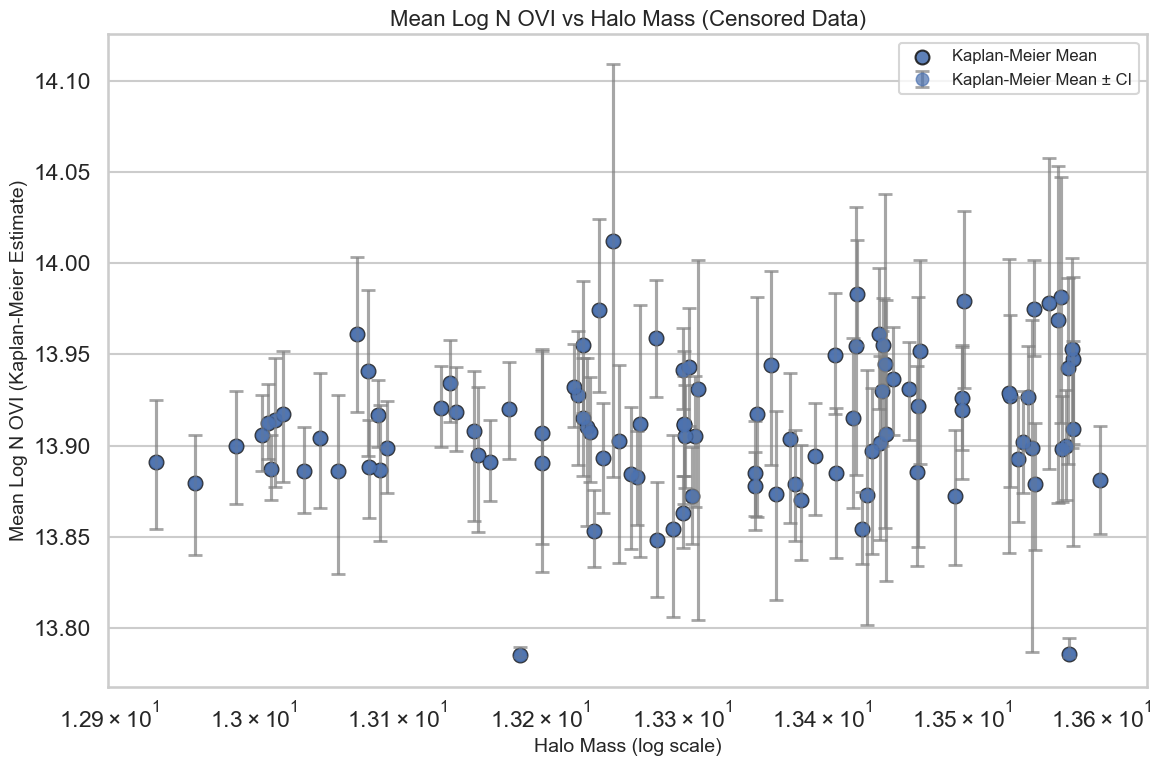

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from lifelines import KaplanMeierFitter

# Set Seaborn style for better aesthetics
sns.set(style='whitegrid', context='talk')

# Define the base directory for updated results
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated'

# Read the group information from 'Grp_info.txt'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove any whitespace from column names

# Convert numerical columns to float
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')

# Initialize lists to store halo masses, Kaplan-Meier means, and error bars
halo_masses = []
km_means = []
lower_errors = []
upper_errors = []

# Loop through each Group_XXX directory and process the updated 'Grp_XXX_fitting_results.txt' file
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))

for folder in group_folders:
    # Extract group ID from the folder name (e.g., 'Group_001' -> '001')
    group_id = folder.split('_')[-1]

    # Construct the absolute file path
    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    print(f"Checking file: {file_path}")  # Debugging print

    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip to the next folder if file not found

    # Read the fitting results file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  # Remove whitespace from column names

    # Convert relevant columns to numeric, coercing errors to NaN
    numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Identify detections and non-detections based on 'dEW(mA)' column
    detected_data = df[df['dEW(mA)'].isna()]['N'].dropna()  # Detected values
    detected_errors = df[df['dEW(mA)'].isna()]['dN'].dropna()  # Errors for detected values
    censored_data = df[df['dEW(mA)'].notna()]['N'].dropna()  # Non-detections (upper limits)

    if not detected_data.empty or not censored_data.empty:
        # Combine detected and censored data for Kaplan-Meier
        observations = np.concatenate([detected_data, censored_data])
        event_observed = np.concatenate([np.ones(len(detected_data)), np.zeros(len(censored_data))])  # 1 if detected, 0 if censored

        # Initialize Kaplan-Meier Fitter
        kmf = KaplanMeierFitter()

        # Fit the data to the Kaplan-Meier estimator
        kmf.fit(observations, event_observed)

        # Calculate the mean of the censored data using the Kaplan-Meier estimator
        # Integrate the survival function to find the mean
        survival_function = kmf.survival_function_
        mean_censored = np.trapz(survival_function['KM_estimate'], survival_function.index)
        km_means.append(mean_censored)

        # Calculate confidence intervals for the Kaplan-Meier estimator
        ci = kmf.confidence_interval_survival_function_
        lower_bound = np.trapz(ci.iloc[:, 1], survival_function.index)
        upper_bound = np.trapz(ci.iloc[:, 0], survival_function.index)
        lower_error = abs(mean_censored - lower_bound)  # Absolute lower bound error
        upper_error = abs(upper_bound - mean_censored)  # Absolute upper bound error
        lower_errors.append(lower_error)
        upper_errors.append(upper_error)

        # Get halo mass for the group
        halo_mass = grp_info_df.loc[grp_info_df['Grp_ID'] == float(group_id), 'Halo_mass'].values[0]
        halo_masses.append(halo_mass)

# Step 7: Plot the data with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(halo_masses, km_means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='gray', capsize=5, capthick=2, alpha=0.7, label='Kaplan-Meier Mean ± CI')
plt.scatter(halo_masses, km_means, alpha=0.9, color='b', edgecolor='k', s=100, label='Kaplan-Meier Mean')

# Additional plot formatting
plt.xlabel('Halo Mass (log scale)', fontsize=14)
plt.ylabel('Mean Log N OVI (Kaplan-Meier Estimate)', fontsize=14)
plt.title('Mean Log N OVI vs Halo Mass (Censored Data)', fontsize=16)
plt.xscale('log')  
plt.grid(True)
plt.legend(loc='best', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered/Group_223/Grp_223_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered/Group_426/Grp_426_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered/Group_248/Grp_248_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered/Group_241/Grp_241_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered/Group_279/Grp_279_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered/Group_225/Grp_225_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered/Group_480/Grp_480_fitting_results.txt
Checking file

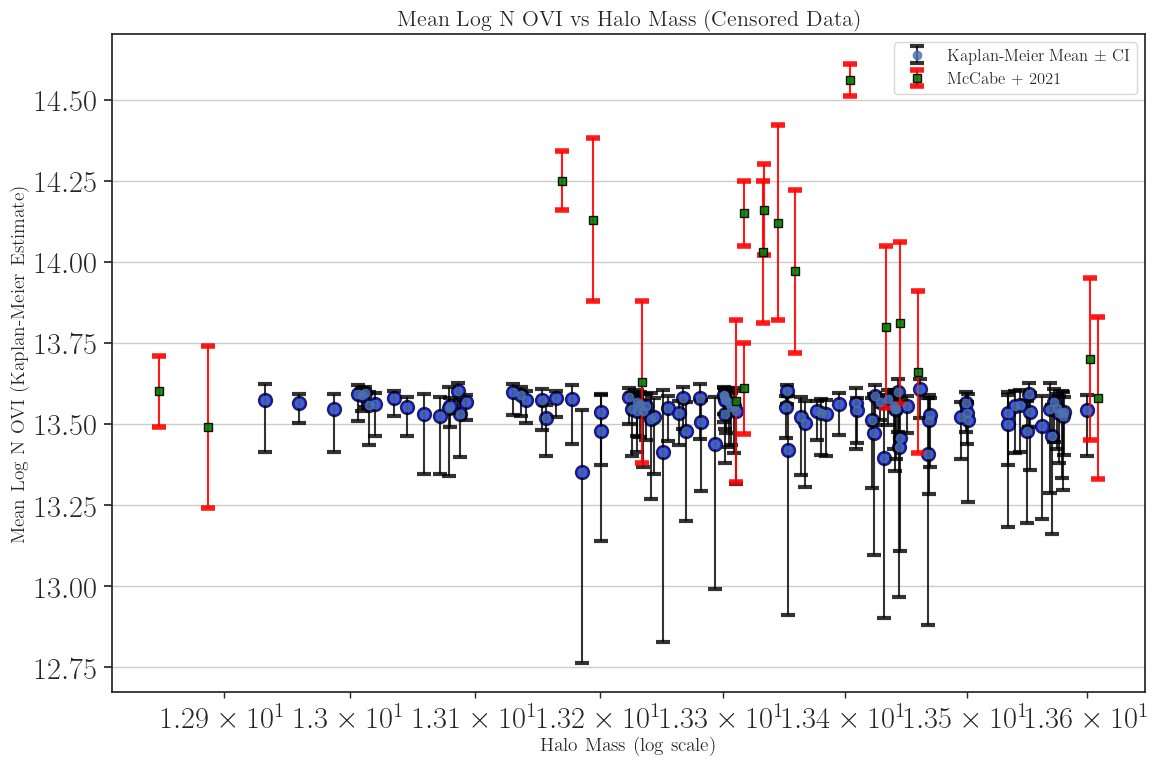

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from lifelines import KaplanMeierFitter

# Set Seaborn style for better aesthetics
# sns.set(style='whitegrid', context='talk')

# Define the base directory for updated results
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered'

# Read the group information from 'Grp_info.txt'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove any whitespace from column names

# Convert numerical columns to float
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')

# Initialize lists to store halo masses, Kaplan-Meier means, and error bars
halo_masses = []
km_means = []
lower_errors = []
upper_errors = []

# Loop through each Group_XXX directory and process the updated 'Grp_XXX_fitting_results.txt' file
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))

for folder in group_folders:
    # Extract group ID from the folder name (e.g., 'Group_001' -> '001')
    group_id = folder.split('_')[-1]

    # Skip groups 109 and 124
    if group_id in ['109', '124']:
        continue

    # Construct the absolute file path
    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    print(f"Checking file: {file_path}")  # Debugging print

    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip to the next folder if file not found

    # Read the fitting results file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  # Remove whitespace from column names

    # Convert relevant columns to numeric, coercing errors to NaN
    numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Identify detections and non-detections based on 'dEW(mA)' column
    detected_data = df[df['dEW(mA)'].isna()]['N'].dropna()  # Detected values
    detected_errors = df[df['dEW(mA)'].isna()]['dN'].dropna()  # Errors for detected values
    censored_data = df[df['dEW(mA)'].notna()]['N'].dropna()  # Non-detections (upper limits)

    if not detected_data.empty or not censored_data.empty:
        # Combine detected and censored data for Kaplan-Meier
        observations = np.concatenate([detected_data, censored_data])
        event_observed = np.concatenate([np.ones(len(detected_data)), np.zeros(len(censored_data))]) 

        # Initialize Kaplan-Meier Fitter
        kmf = KaplanMeierFitter()

        
        kmf.fit_left_censoring(observations, event_observed)

        # Calculate the mean of the censored data using the Kaplan-Meier estimator
        # Integrate the survival function to find the mean
        survival_function = kmf.survival_function_
        mean_censored = np.trapz(survival_function['KM_estimate'], survival_function.index)
        km_means.append(mean_censored)

        
        ci = kmf.confidence_interval_survival_function_
        lower_bound = np.trapz(ci.iloc[:, 1], survival_function.index)
        upper_bound = np.trapz(ci.iloc[:, 0], survival_function.index)
        lower_error = abs(mean_censored - lower_bound)  
        upper_error = abs(upper_bound - mean_censored) 
        lower_errors.append(lower_error)
        upper_errors.append(upper_error)

        # Get halo mass for the group
        halo_mass = grp_info_df.loc[grp_info_df['Grp_ID'] == float(group_id), 'Halo_mass'].values[0]
        halo_masses.append(halo_mass)

# Step 7: Plot the data with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(halo_masses, km_means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='black', capsize=5, capthick=3, alpha=0.8, label='Kaplan-Meier Mean ± CI')
plt.scatter(halo_masses, km_means, alpha=0.9, color='blue', edgecolor='k', s=100)

# Additional plot formatting
plt.xlabel('Halo Mass (log scale)', fontsize=14)
plt.ylabel('Mean Log N OVI (Kaplan-Meier Estimate)', fontsize=14)
plt.title('Mean Log N OVI vs Halo Mass (Censored Data)', fontsize=16)
plt.xscale('log')  
plt.grid(True)

# Read observational data from 'full_sample.txt' and 'Plotting_data_subset.txt'
full_sample_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Sample_full.txt'
plotting_data_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Plotting_data_subset.txt'

# Load full_sample.txt and Plotting_data_subset.txt
full_sample_df = pd.read_csv(full_sample_path, sep='\s+', comment='#', engine='python')
plotting_data_df = pd.read_csv(plotting_data_path, sep='\s+', comment='#', engine='python')

# Debugging: Print column names to check for any discrepancies
print("Columns in full_sample_df:", full_sample_df.columns)
print("Columns in plotting_data_df:", plotting_data_df.columns)

# Ensure there are no extra spaces in column names
full_sample_df.columns = full_sample_df.columns.str.strip()
plotting_data_df.columns = plotting_data_df.columns.str.strip()

# Check the correct column names exist before merging
if 'Group' in full_sample_df.columns and 'Group' in plotting_data_df.columns:
    # Merge datasets on 'Group' column
    merged_df = pd.merge(full_sample_df, plotting_data_df, on='Group')
else:
    raise KeyError("The 'Group' column is missing in one of the dataframes.")

# Convert Mass column to log scale
merged_df['log_Mass'] = np.log10(merged_df['Mass'])

# Plot observational data with updated styling
plt.errorbar(merged_df['log_Mass'], merged_df['N_OVI'], 
             yerr=[merged_df['N_OVI_err_low'], merged_df['N_OVI_err_high']],
             fmt='s', markerfacecolor='green', markeredgecolor='black', 
             ecolor='red', capsize=5, capthick=4, alpha=0.9, label='McCabe + 2021')

# # Set tick formatting for x and y axes
# plt.xticks(np.arange(min(halo_masses), max(halo_masses) + 0.5, 0.5))
# plt.yticks(np.arange(min(km_means) - 0.5, max(km_means) + 0.5, 0.5))

# Show the plot

plt.legend(loc='best', fontsize=12)

plt.tight_layout()

plt.show()

100%|██████████| 104/104 [00:18<00:00,  5.63it/s]


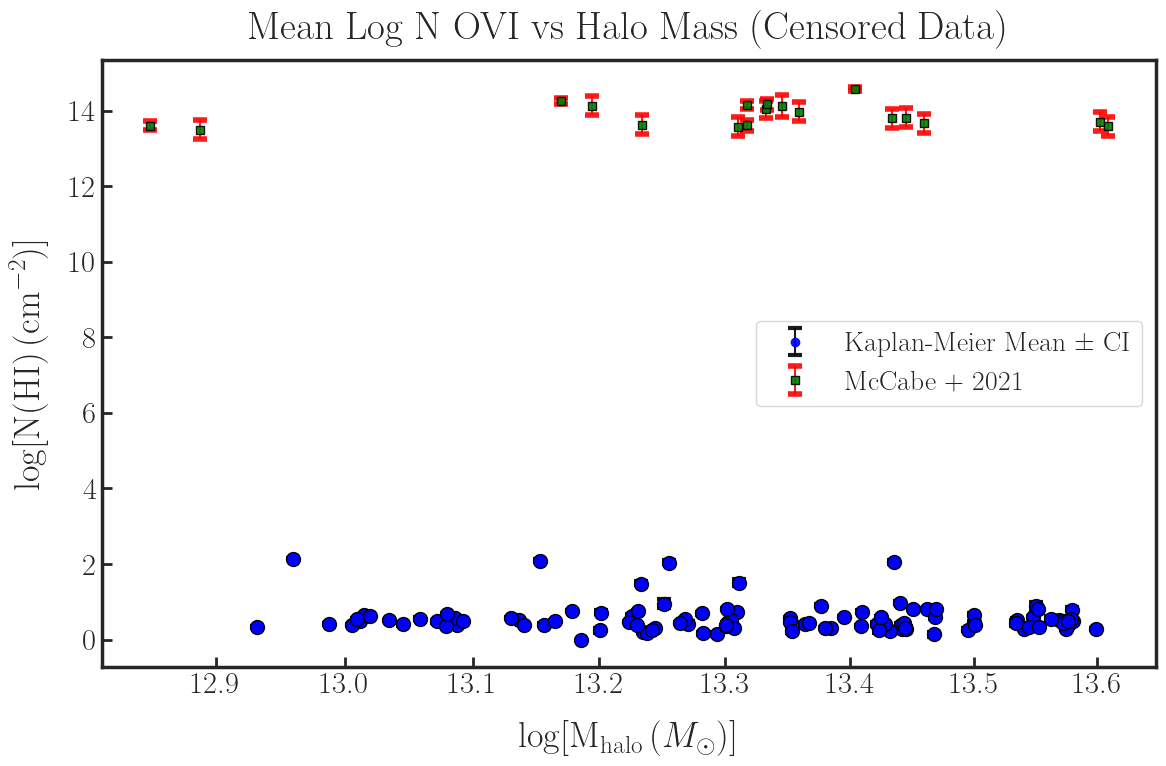

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from lifelines import KaplanMeierFitter
from tqdm import tqdm

# Set Seaborn and Matplotlib configurations for publication quality
sns.set(style="ticks", font_scale=1.5, rc={"text.usetex": True})
plt.rc('font', family='Times New Roman')
plt.rcParams.update({
    'axes.labelsize': 26,
    'axes.titlesize': 22,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 26,
    'figure.titlesize': 22
})

# Define base directory and file paths
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

km_curve_dir = os.path.join(base_dir, 'KM_curves')
os.makedirs(km_curve_dir, exist_ok=True)

# Load group information
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')

# Initialize lists to store halo masses, means, and errors
halo_masses, km_means, lower_errors, upper_errors = [], [], [], []

# Loop through each group's results
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in tqdm(group_folders):
    group_id = folder.split('_')[-1]
    # if group_id in ['109', '124']:  # Skip specified groups
    #     continue

    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    if not os.path.exists(file_path):
        continue

    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()
    numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    detected_data = df[df['dEW(mA)'].isna()]['N'].dropna()
    censored_data = df[df['dEW(mA)'].notna()]['N'].dropna()

    if not detected_data.empty or not censored_data.empty:
        observations = np.concatenate([detected_data, censored_data])
        event_observed = np.concatenate([np.ones(len(detected_data)), np.zeros(len(censored_data))]) 

        kmf = KaplanMeierFitter()
        kmf.fit(observations, event_observed)

        fig, ax = plt.subplots()
        kmf.plot_survival_function(ax=ax)
        ax.set_xlabel('Column Density')
        ax.set_ylabel('Survival Probability')
        ax.set_title(f'Kaplan-Meier Survival Curve for Group {group_id}')
        plt.tight_layout()
        plt.savefig(os.path.join(km_curve_dir, f'KM_curve_Group_{group_id}.png'))
        plt.close(fig)


        cumulative_density = kmf.cumulative_density_
        mean_censored = np.trapz(cumulative_density['KM_estimate'], cumulative_density.index)
        km_means.append(mean_censored)

        ci = kmf.confidence_interval_cumulative_density_
        lower_bound = np.trapz(ci.iloc[:, 1], cumulative_density.index)
        upper_bound = np.trapz(ci.iloc[:, 0], cumulative_density.index)
        lower_errors.append(abs(mean_censored - lower_bound))
        upper_errors.append(abs(upper_bound - mean_censored))

        halo_mass = grp_info_df.loc[grp_info_df['Grp_ID'] == float(group_id), 'Halo_mass'].values[0]
        halo_masses.append(halo_mass)

# Plot with publication-quality styling
fig, ax = plt.subplots(figsize=(12, 8))
ax.errorbar(halo_masses, km_means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='black', capsize=5, 
            capthick=3, alpha=0.9, color='blue', label='Kaplan-Meier Mean ± CI')
ax.scatter(halo_masses, km_means, color='blue', s=100, edgecolor='black', zorder=3)

# Set axis labels with LaTeX styling
ax.set_xlabel(r'$\log[\mathrm{M_{halo}} \, (M_\odot)]$', fontsize=26, labelpad=15)
ax.set_ylabel(r'$\log[\mathrm{N(HI)} \, (\mathrm{cm^{-2}})]$', fontsize=26, labelpad=15)
ax.set_title('Mean Log N OVI vs Halo Mass (Censored Data)', fontsize=28, pad=15)

# Set x-axis ticks at specific intervals with a log scale
ax.set_xscale('log')
ax.set_xticks(np.arange(12.9, 13.7, 0.1))
ax.set_xticklabels([f"{tick:.1f}" for tick in np.arange(12.9, 13.7, 0.1)], fontsize=22)

# Customize tick parameters
ax.tick_params(axis='both', which='major', direction='in', width=2, length=7)

# Customize spine widths for aesthetic consistency
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

# Overlay observational data
full_sample_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Sample_full.txt'
plotting_data_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Plotting_data_subset.txt'
full_sample_df = pd.read_csv(full_sample_path, sep='\s+', comment='#', engine='python')
plotting_data_df = pd.read_csv(plotting_data_path, sep='\s+', comment='#', engine='python')
full_sample_df.columns = full_sample_df.columns.str.strip()
plotting_data_df.columns = plotting_data_df.columns.str.strip()

if 'Group' in full_sample_df.columns and 'Group' in plotting_data_df.columns:
    merged_df = pd.merge(full_sample_df, plotting_data_df, on='Group')
    merged_df['log_Mass'] = np.log10(merged_df['Mass'])
    ax.errorbar(merged_df['log_Mass'], merged_df['N_OVI'], 
                yerr=[merged_df['N_OVI_err_low'], merged_df['N_OVI_err_high']],
                fmt='s', markerfacecolor='green', markeredgecolor='black', 
                ecolor='red', capsize=5, capthick=4, alpha=0.9, label='McCabe + 2021')

# Legend and layout adjustments
ax.legend(loc='best', fontsize=20, frameon=True)
plt.tight_layout()
plt.savefig('mean_log_N_OVI_vs_halo_mass.png', dpi=400)
plt.show()


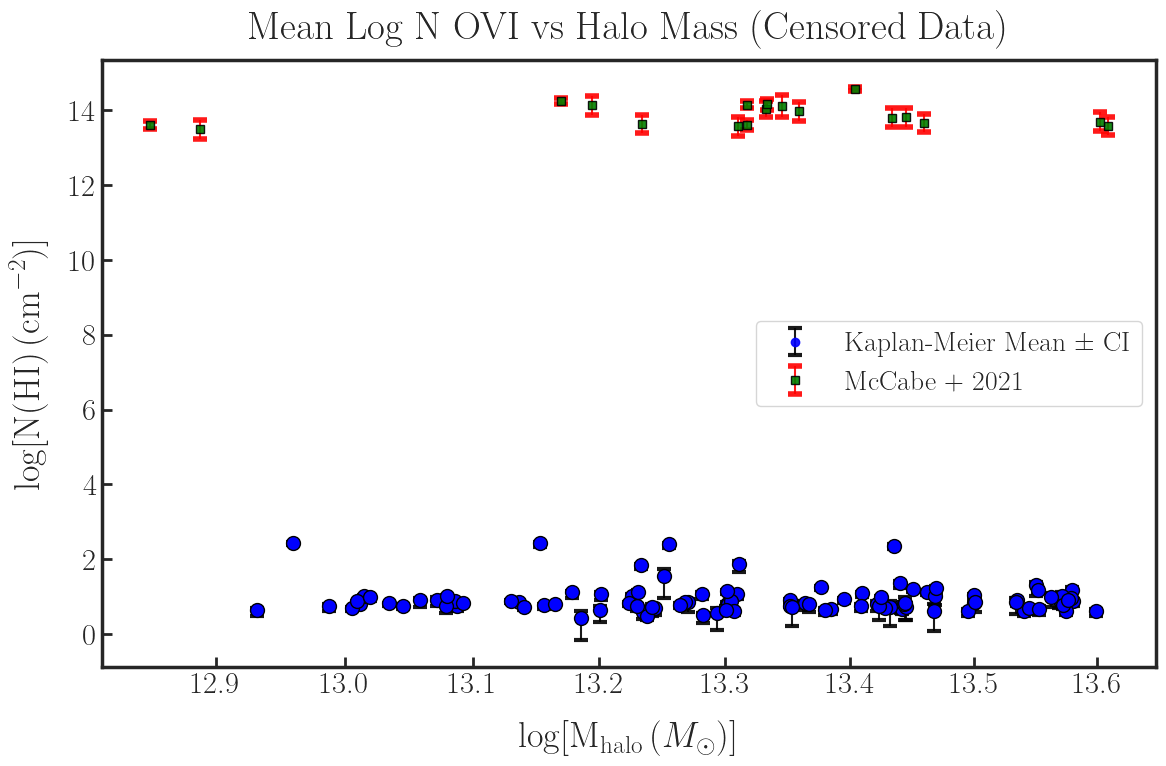

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from lifelines import KaplanMeierFitter

# Set Seaborn and Matplotlib configurations for publication quality
sns.set(style="ticks", font_scale=1.5, rc={"text.usetex": True})
plt.rc('font', family='Times New Roman')
plt.rcParams.update({
    'axes.labelsize': 26,
    'axes.titlesize': 22,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 26,
    'figure.titlesize': 22
})

# Define base directory and file paths
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

# Load group information
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')

# Initialize lists to store halo masses, means, and errors
halo_masses, km_means, lower_errors, upper_errors = [], [], [], []

# Loop through each group's results
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in group_folders:
    group_id = folder.split('_')[-1]
    if group_id in ['109', '124']:  # Skip specified groups
        continue

    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    if not os.path.exists(file_path):
        continue

    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()
    numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Separate detected and censored data
    detected_data = df[df['dEW(mA)'].isna()]['N'].dropna()
    censored_data = df[df['dEW(mA)'].notna()]['N'].dropna()

    if not detected_data.empty or not censored_data.empty:
        # Prepare data for left-censoring analysis
        observations = np.concatenate([detected_data, censored_data])
        event_observed = np.concatenate([np.ones(len(detected_data)), np.zeros(len(censored_data))])

        # Fit left-censored Kaplan-Meier model
        kmf = KaplanMeierFitter()
        kmf.fit_left_censoring(observations, event_observed)

        # Calculate the mean of column density from the survival function
        survival_function = kmf.survival_function_
        mean_column_density = np.trapz(1 - survival_function['KM_estimate'], survival_function.index)
        km_means.append(mean_column_density)

        # Confidence intervals for the survival function
        ci = kmf.confidence_interval_survival_function_
        lower_bound = np.trapz(1 - ci.iloc[:, 1], survival_function.index)
        upper_bound = np.trapz(1 - ci.iloc[:, 0], survival_function.index)
        lower_errors.append(abs(mean_column_density - lower_bound))
        upper_errors.append(abs(upper_bound - mean_column_density))

        # Get halo mass for the group
        halo_mass = grp_info_df.loc[grp_info_df['Grp_ID'] == float(group_id), 'Halo_mass'].values[0]
        halo_masses.append(halo_mass)

# Plot with publication-quality styling
fig, ax = plt.subplots(figsize=(12, 8))
ax.errorbar(halo_masses, km_means, yerr=[lower_errors, upper_errors], fmt='o', ecolor='black', capsize=5, 
            capthick=3, alpha=0.9, color='blue', label='Kaplan-Meier Mean ± CI')
ax.scatter(halo_masses, km_means, color='blue', s=100, edgecolor='black', zorder=3)

# Set axis labels with LaTeX styling
ax.set_xlabel(r'$\log[\mathrm{M_{halo}} \, (M_\odot)]$', fontsize=26, labelpad=15)
ax.set_ylabel(r'$\log[\mathrm{N(HI)} \, (\mathrm{cm^{-2}})]$', fontsize=26, labelpad=15)
ax.set_title('Mean Log N OVI vs Halo Mass (Censored Data)', fontsize=28, pad=15)

# Set x-axis ticks at specific intervals with a log scale
ax.set_xscale('log')
ax.set_xticks(np.arange(12.9, 13.7, 0.1))
ax.set_xticklabels([f"{tick:.1f}" for tick in np.arange(12.9, 13.7, 0.1)], fontsize=22)

# Customize tick parameters
ax.tick_params(axis='both', which='major', direction='in', width=2, length=7)

# Customize spine widths for aesthetic consistency
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

# Adjust legend font size and location
ax.legend(loc='best', fontsize=20, frameon=True)

# Overlay observational data
full_sample_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Sample_full.txt'
plotting_data_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Plotting_data_subset.txt'
full_sample_df = pd.read_csv(full_sample_path, sep='\s+', comment='#', engine='python')
plotting_data_df = pd.read_csv(plotting_data_path, sep='\s+', comment='#', engine='python')
full_sample_df.columns = full_sample_df.columns.str.strip()
plotting_data_df.columns = plotting_data_df.columns.str.strip()

if 'Group' in full_sample_df.columns and 'Group' in plotting_data_df.columns:
    merged_df = pd.merge(full_sample_df, plotting_data_df, on='Group')
    merged_df['log_Mass'] = np.log10(merged_df['Mass'])
    ax.errorbar(merged_df['log_Mass'], merged_df['N_OVI'], 
                yerr=[merged_df['N_OVI_err_low'], merged_df['N_OVI_err_high']],
                fmt='s', markerfacecolor='green', markeredgecolor='black', 
                ecolor='red', capsize=5, capthick=4, alpha=0.9, label='McCabe + 2021')

# Legend and layout adjustments
ax.legend(loc='best', fontsize=20, frameon=True)
plt.tight_layout()
plt.savefig('mean_log_N_OVI_vs_halo_mass.png', dpi=400)
plt.show()

Censored Mean (linear scale): 7.4907e+14
95% Confidence Interval (linear scale): (7.4579e+14, 7.5316e+14)


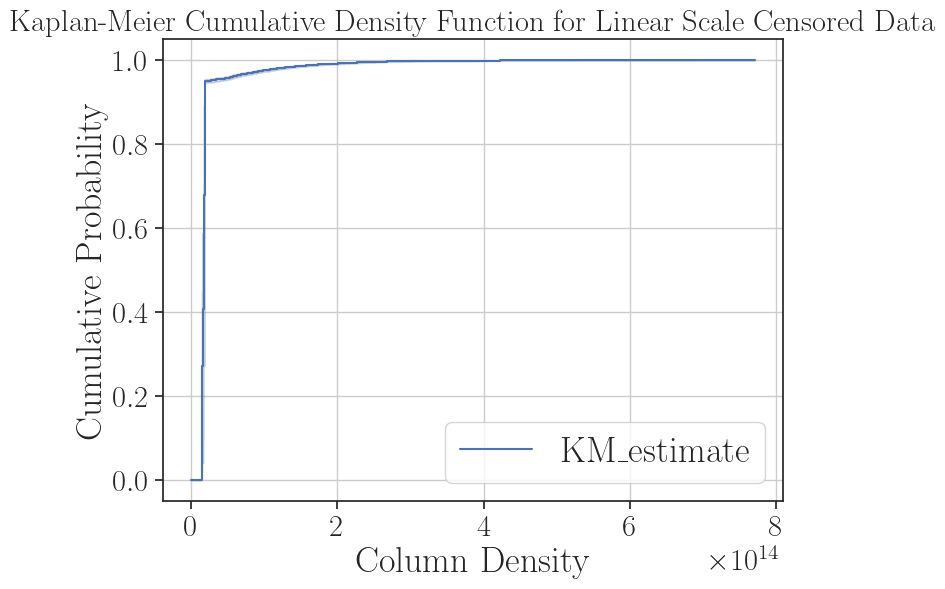

In [8]:
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Data setup (values in linear scale, not log scale)
detections = 10 ** np.random.normal(loc=14, scale=0.3, size=500)  # Exponential of Gaussian values from log scale 13.25 to 15
non_detections = np.full(9500, 10 ** 13.28)  # Non-detections as upper limit at 10^13.28

# Combine detected and censored data in linear scale
observations = np.concatenate([detections, non_detections])
event_observed = np.concatenate([np.ones(len(detections)), np.zeros(len(non_detections))])  # 1 for detected, 0 for non-detected

# Initialize and fit Kaplan-Meier Fitter for left-censored data
kmf = KaplanMeierFitter()
kmf.fit_left_censoring(observations, event_observed)

# Calculate the mean from the cumulative density
cumulative_density = kmf.cumulative_density_
mean_censored = np.trapz(cumulative_density['KM_estimate'], cumulative_density.index)

# Calculate confidence intervals
ci = kmf.confidence_interval_cumulative_density_
lower_bound = np.trapz(ci.iloc[:, 1], cumulative_density.index)
upper_bound = np.trapz(ci.iloc[:, 0], cumulative_density.index)
lower_error = abs(mean_censored - lower_bound)
upper_error = abs(upper_bound - mean_censored)

# Output results
print(f"Censored Mean (linear scale): {mean_censored:.4e}")
print(f"95% Confidence Interval (linear scale): ({mean_censored - lower_error:.4e}, {mean_censored + upper_error:.4e})")

# Plot the cumulative density function for visualization
plt.figure(figsize=(8, 6))
kmf.plot_cumulative_density()
plt.xlabel('Column Density')
plt.ylabel('Cumulative Probability')
plt.title('Kaplan-Meier Cumulative Density Function for Linear Scale Censored Data')
plt.grid(True)
plt.show()


Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_223/Grp_223_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_426/Grp_426_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_248/Grp_248_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_241/Grp_241_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_279/Grp_279_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_225/Grp_225_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated/Group_480/Grp_480_fitting_results.txt
Checking file: /User

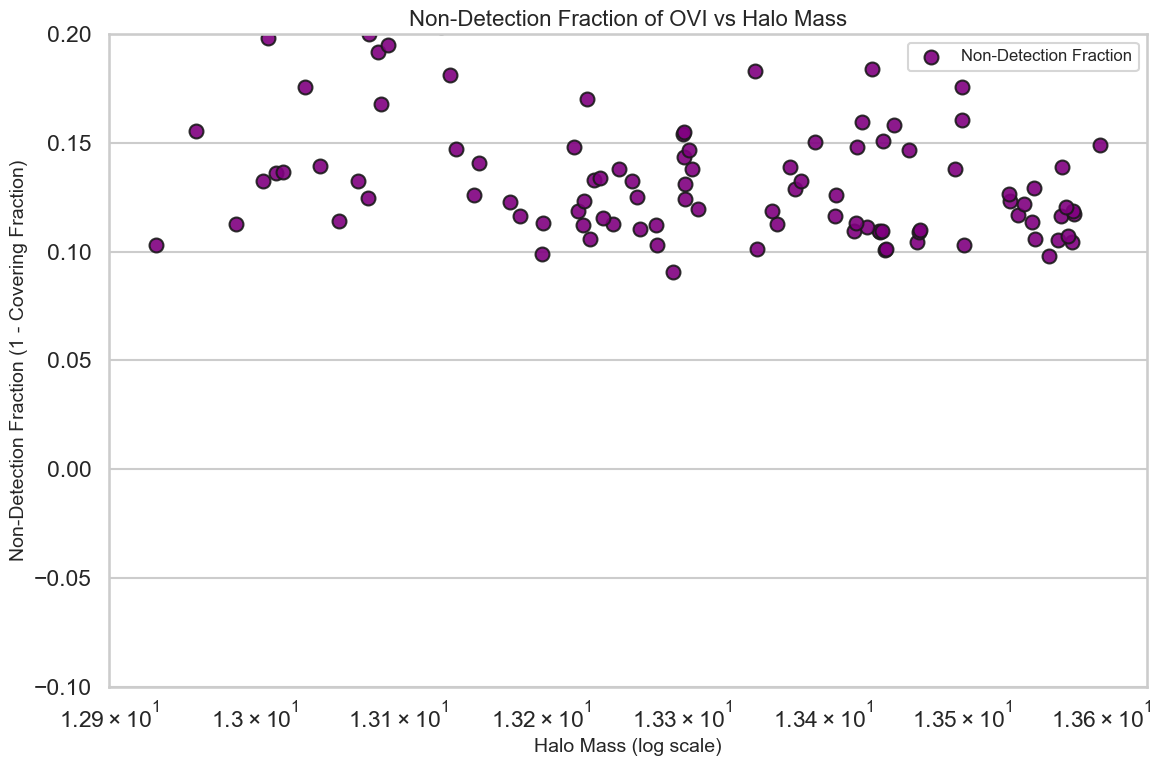

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set Seaborn style for better aesthetics
sns.set(style='whitegrid', context='talk')

# Define the base directory for updated results
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated'

# Read the group information from 'Grp_info.txt'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove any whitespace from column names

# Convert numerical columns to float
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')

# Initialize lists to store halo masses and covering fractions
halo_masses = []
non_detection_fractions = []  # 1 - Covering Fraction

# List to store group IDs for reference
group_ids = []

# Loop through each Group_XXX directory and process the updated 'Grp_XXX_fitting_results.txt' file
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))

# Thresholds for detection (e.g., N > 13.5 is considered a detection)
N_threshold = 13.77

for folder in group_folders:
    # Extract group ID from the folder name (e.g., 'Group_001' -> '001')
    group_id = folder.split('_')[-1]

    # Construct the absolute file path
    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    print(f"Checking file: {file_path}")  # Debugging print

    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip to the next folder if file not found

    # Read the fitting results file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  # Remove whitespace from column names

    # Convert relevant columns to numeric, coercing errors to NaN
    numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Calculate covering fraction for the current group
    total_sightlines = len(df)
    detected_sightlines = df[(df['N'] >= N_threshold)].shape[0]
    
    # Calculate the covering fraction and 1 - covering fraction (non-detection fraction)
    if total_sightlines > 0:
        covering_fraction = detected_sightlines / total_sightlines
        non_detection_fraction = 1 - covering_fraction
        non_detection_fractions.append(non_detection_fraction)

        # Get halo mass for the group
        halo_mass = grp_info_df.loc[grp_info_df['Grp_ID'] == float(group_id), 'Halo_mass'].values[0]
        halo_masses.append(halo_mass)

        # Append group ID for reference
        group_ids.append(group_id)

# Create a DataFrame to store halo masses, group numbers, and covering fractions
results_df = pd.DataFrame({
    'Group_ID': group_ids,
    'Halo_Mass': halo_masses,
    'Non_Detection_Fraction': non_detection_fractions
})

# Sort the DataFrame by covering fraction in ascending order
sorted_results = results_df.sort_values(by='Non_Detection_Fraction')

# Remove the groups with the highest 2 covering fractions (lowest 2 non-detection fractions)
filtered_results = sorted_results.iloc[:-2]

# Extract filtered data for plotting
filtered_halo_masses = filtered_results['Halo_Mass'].values
filtered_non_detection_fractions = filtered_results['Non_Detection_Fraction'].values

# Extract the lowest 4 covering fractions and their corresponding group numbers
lowest_4 = sorted_results.tail(4)

# Print the results
print("Lowest 4 Non-Detection Fractions and Their Group Numbers:")
for index, row in lowest_4.iterrows():
    print(f"Group {row['Group_ID']} with Non-Detection Fraction: {row['Non_Detection_Fraction']:.3f}")

# Step 7: Plot the non-detection fraction vs. halo mass
plt.figure(figsize=(12, 8))
plt.scatter(filtered_halo_masses, filtered_non_detection_fractions, alpha=0.9, color='purple', edgecolor='k', s=100, label='Non-Detection Fraction')
#plt.plot(filtered_halo_masses, filtered_non_detection_fractions, 'purple', alpha=0.7)  # Connecting line

# Additional plot formatting
plt.xlabel('Halo Mass (log scale)', fontsize=14)
plt.ylabel('Non-Detection Fraction (1 - Covering Fraction)', fontsize=14)
plt.title('Non-Detection Fraction of OVI vs Halo Mass', fontsize=16)
plt.xscale('log')  
plt.ylim(-0.1, 0.2)  # Limiting y-axis to [0, 1.1] to better visualize fractions
plt.grid(True)
plt.legend(loc='best', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [4]:
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from tqdm import tqdm

# Directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines'
results_dir = os.path.join(base_dir, 'Results')
galaxy_dir = os.path.join(base_dir, 'Galaxy_cats')
caesar_dir = os.path.join(base_dir, 'Caesar_cats')
plots_dir = os.path.join(base_dir, 'Plots')

# Load group information using astropy Table
grp_info_path = os.path.join(caesar_dir, 'Grp_info.txt')
group_data = Table.read(grp_info_path, format='ascii.fixed_width', delimiter='|')

# Process only the first group for testing
first_group = group_data[0]
grp_id = int(first_group['Grp_ID'])
group_center = np.array([first_group['Pos_x'], first_group['Pos_y']])  # Only x-y center
group_radius = first_group['R_vir']
halo_mass = first_group['Halo_mass']

# Load galaxy information for the current group
galaxy_info_path = os.path.join(galaxy_dir, f'Group_{grp_id}', 'galaxy_info.txt')
galaxy_data = Table.read(galaxy_info_path, format='ascii.fixed_width', delimiter='|')

# Load sightline information for the current group
sightline_info_path = os.path.join(results_dir, f'Group_{grp_id}', f'Grp_{grp_id}_Ray_info.txt')
sightline_data = Table.read(sightline_info_path, format='ascii.fixed_width', delimiter='|')

# Prepare data to save
results = []

# Track CGM sightlines count
total_sightlines = len(sightline_data)
cgm_sightline_count = 0

# Iterate over each sightline
for sightline_row in tqdm(sightline_data):
    # Only x-y coordinates for start and end points
    start_xy = np.array([sightline_row['Start_x'], sightline_row['Start_y']])
    end_xy = np.array([sightline_row['End_x'], sightline_row['End_y']])

    # Check if the sightline is within the CGM (group sphere) in the x-y plane
    inside_cgm = np.linalg.norm(start_xy - group_center) <= group_radius or \
                 np.linalg.norm(end_xy - group_center) <= group_radius

    # Count the number of galaxies the sightline intersects and store their IDs
    num_gal_cgm = 0
    intersecting_galaxy_ids = []
    
    for galaxy_row in galaxy_data:
        galaxy_center_xy = np.array([galaxy_row['Galaxy_Center_X'], galaxy_row['Galaxy_Center_Y']])
        galaxy_radius = galaxy_row['Galaxy_Rvir']
        
        # Check if sightline intersects this galaxy's CGM in the x-y plane
        if np.linalg.norm(start_xy - galaxy_center_xy) <= galaxy_radius or \
           np.linalg.norm(end_xy - galaxy_center_xy) <= galaxy_radius:
            num_gal_cgm += 1
            intersecting_galaxy_ids.append(str(galaxy_row['Galaxy_ID']))
    
    # Update CGM sightline count
    if inside_cgm:
        cgm_sightline_count += 1
    
    # If no intersecting galaxies, store "None" instead of an ID list
    gal_ids = ','.join(intersecting_galaxy_ids) if intersecting_galaxy_ids else "None"
    
    # Save the sightline result
    results.append((sightline_row['Sightline'], start_xy[0], start_xy[1], end_xy[0], end_xy[1], 
                    sightline_row['Units'], num_gal_cgm, gal_ids))

# Save results to a fixed-width file with galaxy IDs of intersections
output_file = os.path.join(galaxy_dir, f'Group_{grp_id}', 'ray_cgm_igrm_info_new.txt')
output_table = Table(rows=results, names=['Sightline', 'Start_x', 'Start_y', 'End_x', 'End_y', 
                                          'Units', 'Num_Gal_CGM', 'Gal_IDs'])
output_table.write(output_file, format='ascii.fixed_width', delimiter='|', overwrite=True)

# Calculate covering fraction for this group (for testing)
covering_fraction = cgm_sightline_count / total_sightlines if total_sightlines > 0 else 0

# Print covering fraction result for verification
print(f"Covering Fraction for Group {grp_id}: {covering_fraction}")

100%|██████████| 10000/10000 [00:00<00:00, 35072.60it/s]


Covering Fraction for Group 102: 0.3436


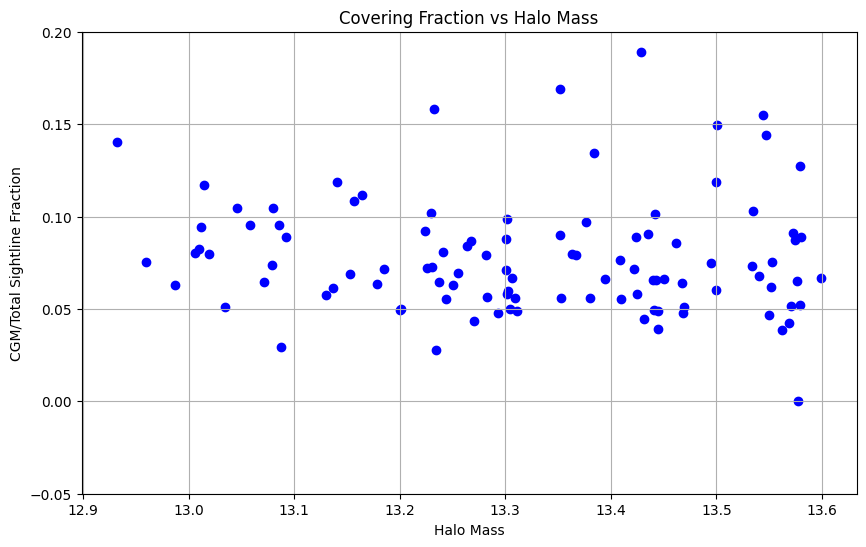

In [7]:
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

# Directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines'
galaxy_dir = os.path.join(base_dir, 'Galaxy_cats')
caesar_dir = os.path.join(base_dir, 'Caesar_cats')
plots_dir = os.path.join(base_dir, 'Plots')

# Load group information to get halo mass for each group
grp_info_path = os.path.join(caesar_dir, 'Grp_info.txt')
group_data = Table.read(grp_info_path, format='ascii.fixed_width', delimiter='|')

# Prepare to collect covering fraction data
covering_fraction_data = []

# Iterate over each group to compute covering fraction
for group_row in group_data:
    grp_id = int(group_row['Grp_ID'])
    halo_mass = group_row['Halo_mass']
    
    # Path to the ray_cgm_igrm_info.txt file for this group
    ray_info_path = os.path.join(galaxy_dir, f'Group_{grp_id}', 'ray_cgm_igrm_info.txt')
    
    # Check if the file exists
    if not os.path.exists(ray_info_path):
        print(f"File not found for Group {grp_id}, skipping.")
        continue
    
    # Load the ray information table
    ray_data = Table.read(ray_info_path, format='ascii.fixed_width', delimiter='|')
    
    # Calculate the covering fraction: count sightlines with Num_Gal_CGM > 0
    total_sightlines = len(ray_data)
    cgm_sightline_count = np.sum(ray_data['Num_Gal_CGM'] > 0)
    covering_fraction = cgm_sightline_count / total_sightlines if total_sightlines > 0 else 0
    
    # Append the halo mass and covering fraction for plotting
    covering_fraction_data.append((halo_mass, covering_fraction))

# Create a Table for the covering fraction data
covering_df = Table(rows=covering_fraction_data, names=['Halo_Mass', 'Covering_Fraction'])

# Plot covering fraction vs halo mass
plt.figure(figsize=(10, 6))
plt.scatter(covering_df['Halo_Mass'], covering_df['Covering_Fraction'], color='b', marker='o')
plt.xlabel('Halo Mass')
plt.ylabel('CGM/Total Sightline Fraction')
plt.title('Covering Fraction vs Halo Mass')
plt.grid(True)

# Ensure plots directory exists
os.makedirs(plots_dir, exist_ok=True)
plt.ylim(-0.05,0.20)
#plt.savefig(os.path.join(plots_dir, 'covering_fraction_vs_halo_mass.png'))
plt.show()

Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results/Group_223/Grp_223_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results/Group_426/Grp_426_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results/Group_248/Grp_248_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results/Group_241/Grp_241_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results/Group_279/Grp_279_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results/Group_225/Grp_225_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results/Group_480/Grp_480_fitting_results.txt
Checking file: /Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_S

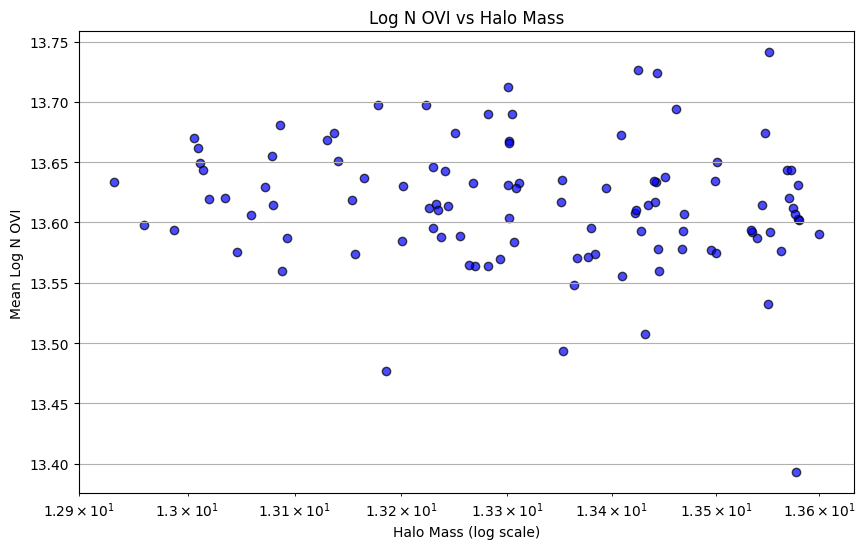

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results'

grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove any whitespace from column names

grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')

halo_masses = []
log_novi_means = []

group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))

for folder in group_folders:

    group_id = folder.split('_')[-1]


    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    print(f"Checking file: {file_path}")  


    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue 


    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  


    numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')


    absorbers_df = df[df['dN'].notna()]


    if not absorbers_df.empty:
        log_novi_mean = absorbers_df['N'].mean()  
        log_novi_means.append(log_novi_mean)

        # Get halo mass for the group
        halo_mass = grp_info_df.loc[grp_info_df['Grp_ID'] == float(group_id), 'Halo_mass'].values[0]
        halo_masses.append(halo_mass)


plt.figure(figsize=(10, 6))
plt.scatter(halo_masses, log_novi_means, alpha=0.7, color='b', edgecolor='k')
plt.xlabel('Halo Mass (log scale)')
plt.ylabel('Mean Log N OVI')
plt.title('Log N OVI vs Halo Mass')
plt.xscale('log')  
plt.grid(True)
plt.show()


## Trying voilin plots

In [75]:
print(grp_info_df['Halo_mass'].describe())

count    104.000000
mean      13.323000
std        0.179571
min       12.932022
25%       13.201056
50%       13.309970
75%       13.463105
max       13.599281
Name: Halo_mass, dtype: float64


count    104.000000
mean      13.323000
std        0.179571
min       12.932022
25%       13.201056
50%       13.309970
75%       13.463105
max       13.599281
Name: Halo_mass, dtype: float64
Minimum Halo Mass: 1.29e+01 Msun
Maximum Halo Mass: 1.36e+01 Msun
Mass Bins: [12.89 12.97 13.05 13.13 13.21 13.29 13.37 13.45 13.53 13.61]
Mass Bin Labels: ['1.29e+01-1.30e+01', '1.30e+01-1.31e+01', '1.31e+01-1.31e+01', '1.31e+01-1.32e+01', '1.32e+01-1.33e+01', '1.33e+01-1.34e+01', '1.34e+01-1.34e+01', '1.34e+01-1.35e+01', '1.35e+01-1.36e+01']
Number of groups with NaN Mass_Bin: 0
Mass_Bin value counts:
Mass_Bin
1.35e+01-1.36e+01    183695
1.34e+01-1.34e+01    180689
1.32e+01-1.33e+01    160672
1.33e+01-1.34e+01    149970
1.31e+01-1.32e+01    100667
1.34e+01-1.35e+01     90399
1.30e+01-1.31e+01     80818
1.31e+01-1.31e+01     70499
1.29e+01-1.30e+01     20155
Name: count, dtype: int64

Detection value counts:
Detection
Non-Detected    988712
Detected         48852
Name: count, dtype: int64


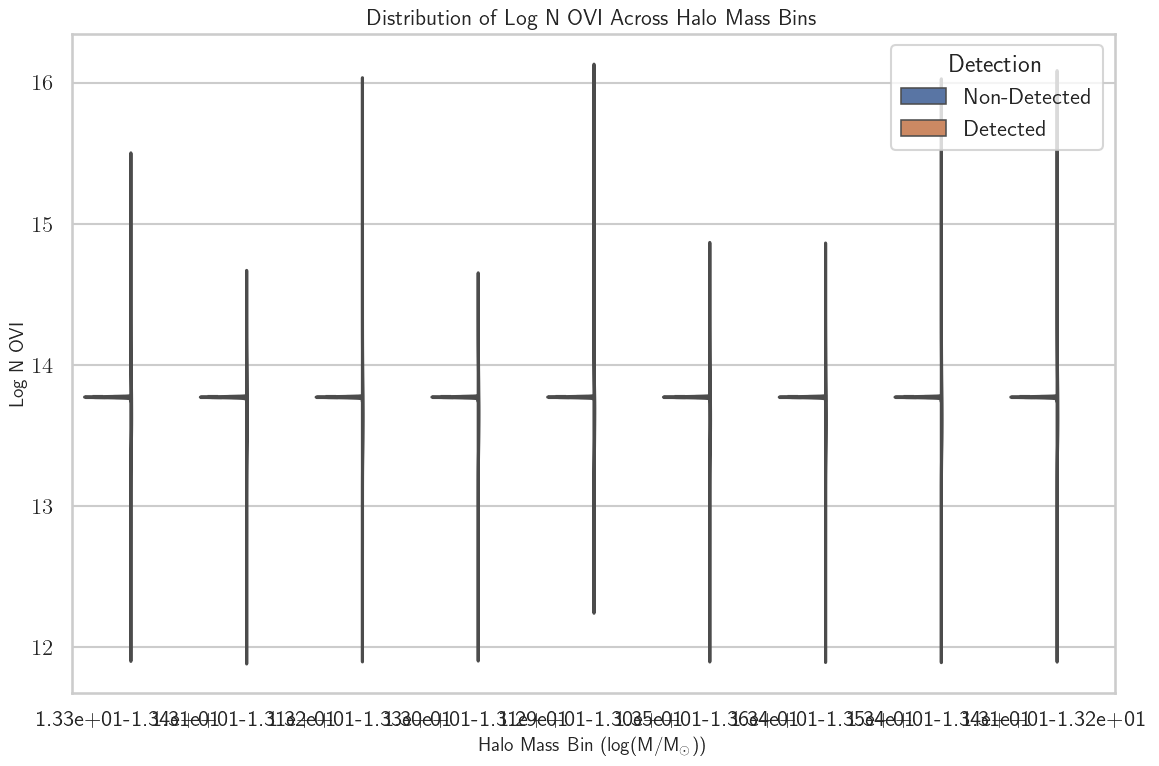

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set Seaborn style for better aesthetics
sns.set(style='whitegrid', context='talk')

# Define the base directory for updated results
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated'

# Read the group information from 'Grp_info.txt'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove any whitespace from column names

# Convert numerical columns to float
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')

# Inspect the Halo_mass data
print(grp_info_df['Halo_mass'].describe())

# Adjust mass bins according to the data range
min_mass = 12.89
max_mass = 13.61
print(f"Minimum Halo Mass: {min_mass:.2e} Msun")
print(f"Maximum Halo Mass: {max_mass:.2e} Msun")

# Define mass bins according to the range and ensure enough separation
mass_bins = np.linspace(min_mass, max_mass, num=10)
print("Mass Bins:", mass_bins)

# Generate labels as ranges for each bin, making them unique
mass_bin_labels = [f'{mass_bins[i]:.2e}-{mass_bins[i+1]:.2e}' for i in range(len(mass_bins) - 1)]
print("Mass Bin Labels:", mass_bin_labels)

# Assign each group to a halo mass bin with unique labels
grp_info_df['Mass_Bin'] = pd.cut(
    grp_info_df['Halo_mass'],
    bins=mass_bins,
    labels=mass_bin_labels,
    include_lowest=True
)

# Check for any NaN values in Mass_Bin to ensure all entries are binned
print(f"Number of groups with NaN Mass_Bin: {grp_info_df['Mass_Bin'].isna().sum()}")

# Initialize a list to store data for all groups
data_list = []

# Loop through each Group_XXX directory and process the updated 'Grp_XXX_fitting_results.txt' file
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))

for folder in group_folders:
    # Extract group ID from the folder name (e.g., 'Group_001' -> '001')
    group_id = folder.split('_')[-1]
    group_id = float(group_id)  # Ensure group_id is float to match grp_info_df

    # Get the halo mass and mass bin for this group
    group_info = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_info.empty:
        print(f"No group info found for Group {group_id}, skipping.")
        continue
    halo_mass = group_info['Halo_mass'].values[0]
    mass_bin = group_info['Mass_Bin'].values[0]

    # Skip if Mass_Bin is NaN
    if pd.isna(mass_bin):
        print(f"Group {group_id} has NaN Mass_Bin, skipping.")
        continue

    # Construct the absolute file path
    file_path = os.path.join(folder, f'Grp_{int(group_id)}_fitting_results.txt')

    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip to the next folder if file not found

    # Read the fitting results file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  # Remove whitespace from column names

    # Convert relevant columns to numeric, coercing errors to NaN
    numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows where 'N' is NaN
    df = df[~df['N'].isna()]

    # Identify detections and non-detections based on 'dEW(mA)' column
    df['Detection'] = np.where(df['dEW(mA)'].isna(), 'Detected', 'Non-Detected')

    # Check detection counts
    detection_counts = df['Detection'].value_counts()
    if detection_counts.empty:
        print(f"No detection data for Group {group_id}, skipping.")
        continue

    # Add group ID and mass bin to the DataFrame
    df['Group_ID'] = f'Group {int(group_id)}'
    df['Mass_Bin'] = mass_bin

    # Append to the data list
    data_list.append(df[['N', 'Detection', 'Group_ID', 'Mass_Bin']])

# Combine all group data into a single DataFrame
if data_list:
    combined_data = pd.concat(data_list, ignore_index=True)
else:
    print("No data to plot.")
    exit()

# Log-transform 'N' values (assuming Log N OVI)
combined_data['Log_N_OVI'] = np.log10(combined_data['N'])

# Remove infinite or NaN values resulting from log transformation
combined_data = combined_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['Log_N_OVI'])

# Check the content of 'Mass_Bin' and 'Detection' columns
print("Mass_Bin value counts:")
print(combined_data['Mass_Bin'].value_counts())
print("\nDetection value counts:")
print(combined_data['Detection'].value_counts())

# Plotting the violin plots grouped by mass bins
plt.figure(figsize=(12, 8))
sns.violinplot(x='Mass_Bin', y='N', hue='Detection', data=combined_data, split=True, inner='quartile')
plt.xlabel('Halo Mass Bin (log(M/M$_\\odot$))', fontsize=14)
plt.ylabel('Log N OVI', fontsize=14)
plt.title('Distribution of Log N OVI Across Halo Mass Bins', fontsize=16)
plt.legend(title='Detection', loc='upper right')
plt.tight_layout()
plt.show()

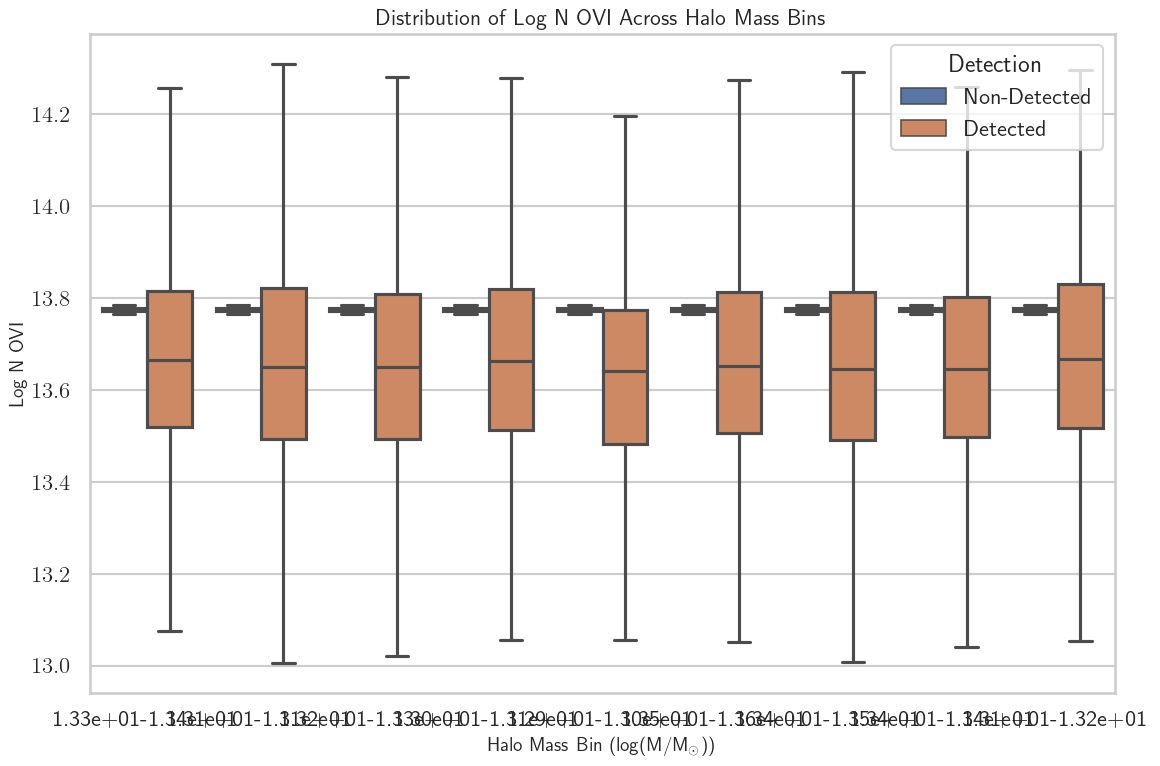

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for aesthetics
sns.set(style='whitegrid', context='talk')

# Plot separate boxplots for Detected and Non-Detected within each mass bin
plt.figure(figsize=(12, 8))
sns.boxplot(x='Mass_Bin', y='N', hue='Detection', data=combined_data, showfliers=False)
plt.xlabel('Halo Mass Bin (log(M/M$_\\odot$))', fontsize=14)
plt.ylabel('Log N OVI', fontsize=14)
plt.title('Distribution of Log N OVI Across Halo Mass Bins', fontsize=16)
plt.legend(title='Detection', loc='upper right')
plt.tight_layout()
plt.show()

/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1317544565.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['N'], label=f'Mass Bin {mass_bin}', shade=True)
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1317544565.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['N'], label=f'Mass Bin {mass_bin}', shade=True)
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGr

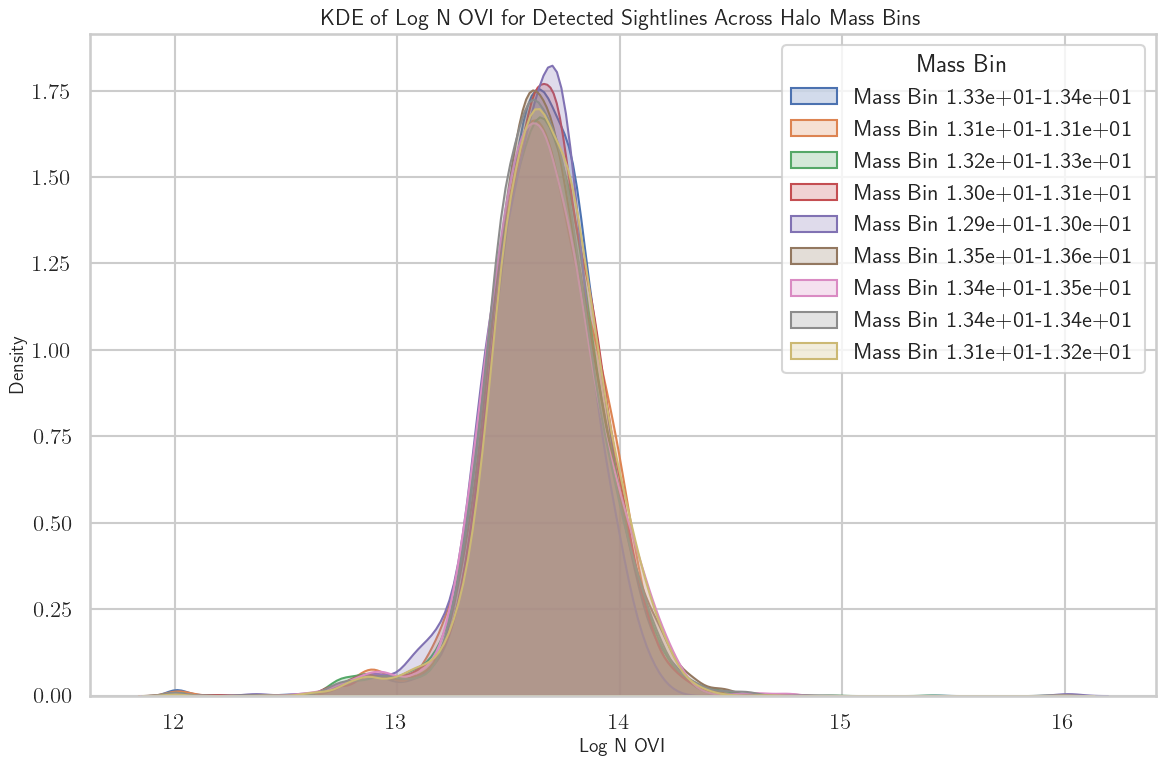

In [78]:
# Plot KDEs for each mass bin for detected data only
plt.figure(figsize=(12, 8))
for mass_bin in combined_data['Mass_Bin'].unique():
    subset = combined_data[(combined_data['Mass_Bin'] == mass_bin) & (combined_data['Detection'] == 'Detected')]
    if not subset.empty:
        sns.kdeplot(subset['N'], label=f'Mass Bin {mass_bin}', shade=True)

plt.xlabel('Log N OVI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('KDE of Log N OVI for Detected Sightlines Across Halo Mass Bins', fontsize=16)
plt.legend(title='Mass Bin')
plt.tight_layout()
plt.show()

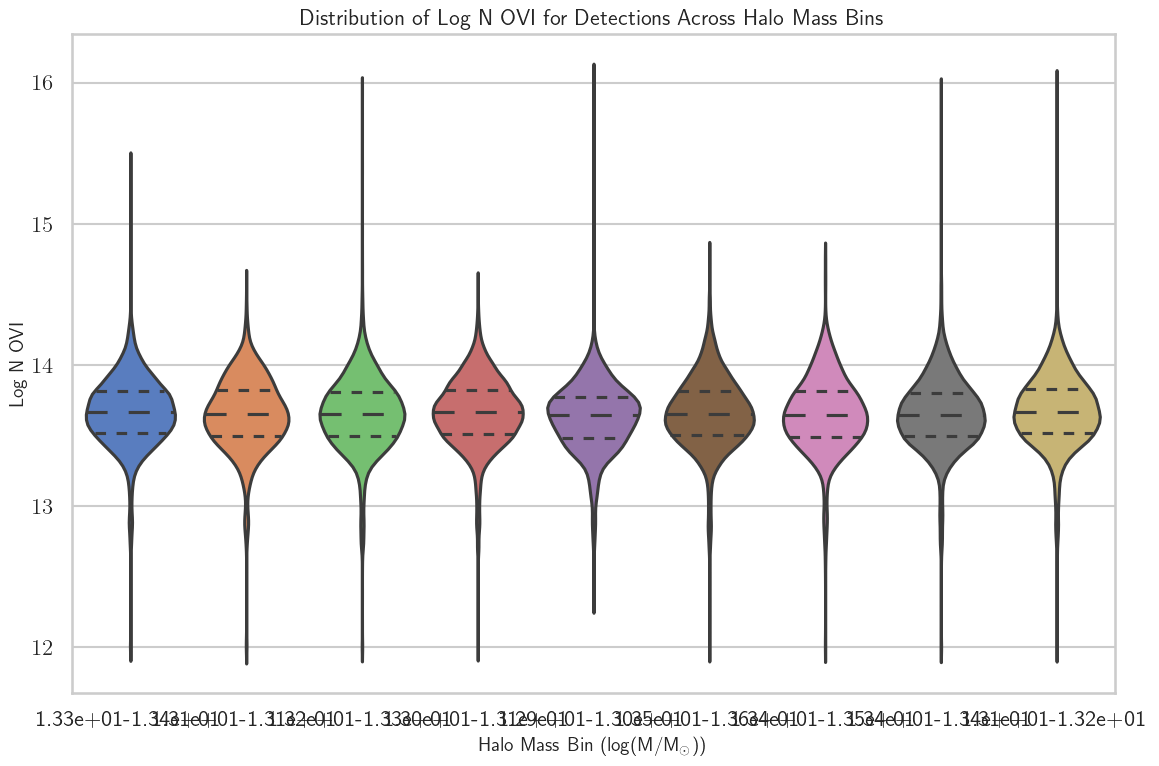

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only detected values
detections_only = combined_data[combined_data['Detection'] == 'Detected']

# Set Seaborn style for aesthetics
sns.set(style='whitegrid', context='talk')

# Plot violin plot for detections only
plt.figure(figsize=(12, 8))
sns.violinplot(x='Mass_Bin', y='N', data=detections_only, inner='quartile', palette='muted')
plt.xlabel('Halo Mass Bin (log(M/M$_\\odot$))', fontsize=14)
plt.ylabel('Log N OVI', fontsize=14)  # Label as 'Log N OVI' since values are already in log
plt.title('Distribution of Log N OVI for Detections Across Halo Mass Bins', fontsize=16)
plt.tight_layout()
plt.show()

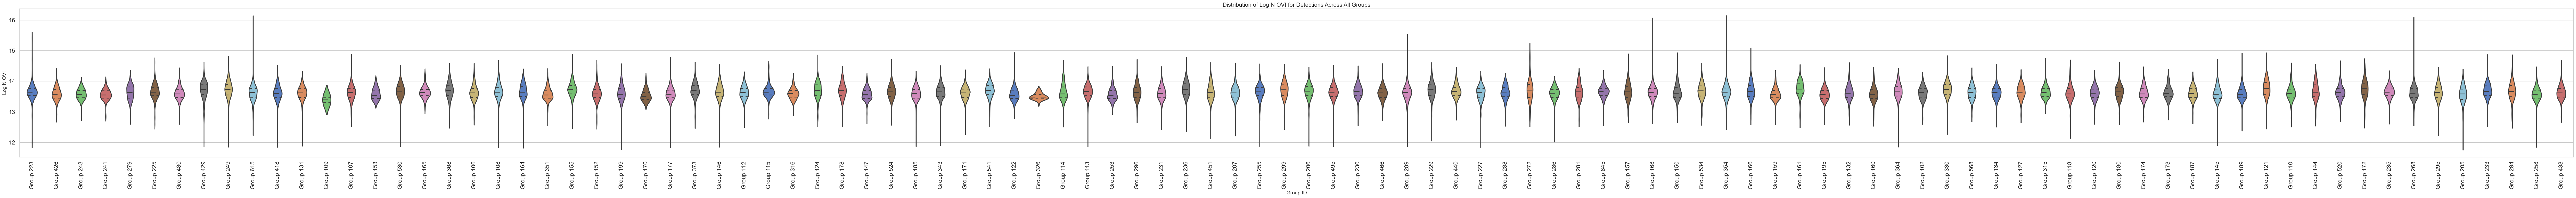

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only detected values
detections_only = combined_data[combined_data['Detection'] == 'Detected']

# Set Seaborn style for aesthetics
sns.set(style='whitegrid', context='talk')

# Plot violin plot for detections only, grouped by each unique Group_ID
plt.figure(figsize=(100, 8))  # Increase the width if you have many groups to display them all
sns.violinplot(x='Group_ID', y='N', data=detections_only, inner='quartile', palette='muted')
plt.xlabel('Group ID', fontsize=14)
plt.ylabel('Log N OVI', fontsize=14)
plt.title('Distribution of Log N OVI for Detections Across All Groups', fontsize=16)

# Rotate x-axis labels for readability if there are many groups
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('violin_plot_detections_all_groups.png')
plt.show()

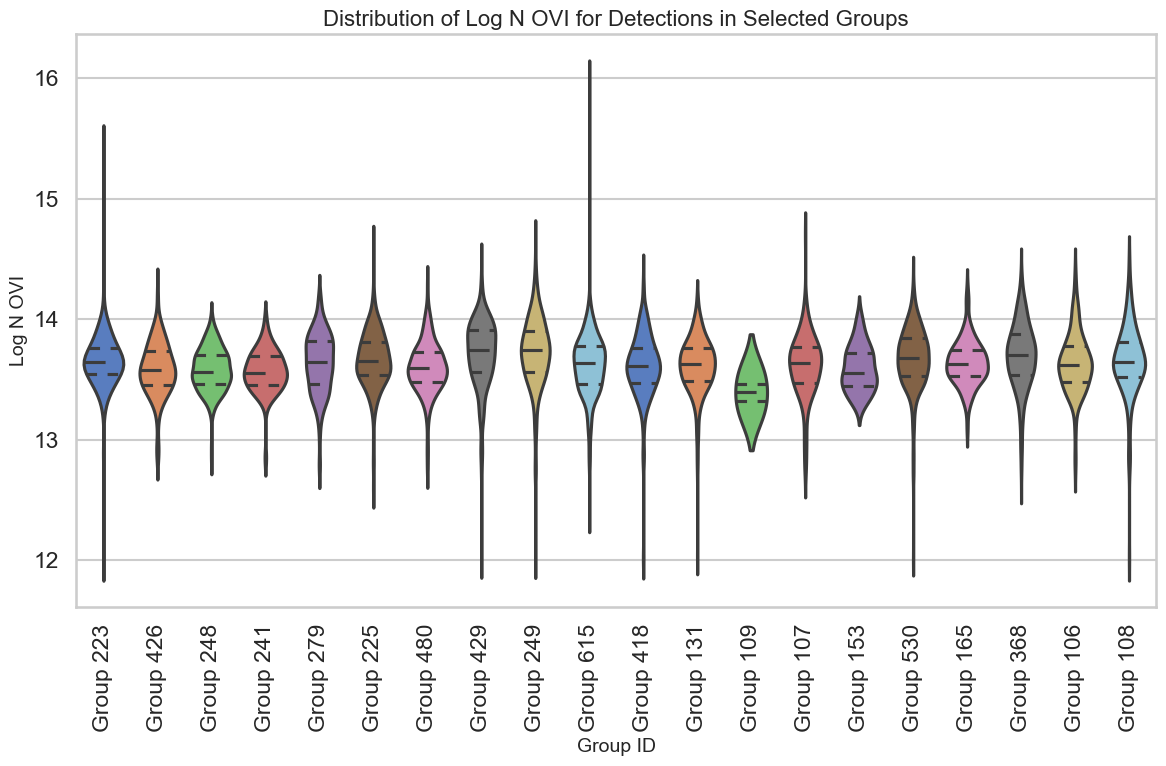

In [37]:
# Example: Select a subset of Group_IDs for plotting
selected_groups = detections_only['Group_ID'].unique()[:20]  # Adjust the number as needed
subset_data = detections_only[detections_only['Group_ID'].isin(selected_groups)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='Group_ID', y='N', data=subset_data, inner='quartile', palette='muted')
plt.xlabel('Group ID', fontsize=14)
plt.ylabel('Log N OVI', fontsize=14)
plt.title('Distribution of Log N OVI for Detections in Selected Groups', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_10408/2118968539.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['N'], label=f'Group {group_id}', shade=True, alpha=0.5)
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_10408/2118968539.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['N'], label=f'Group {group_id}', shade=True, alpha=0.5)
/Users/wavefunction/ASU Dropbox/Tanmay S

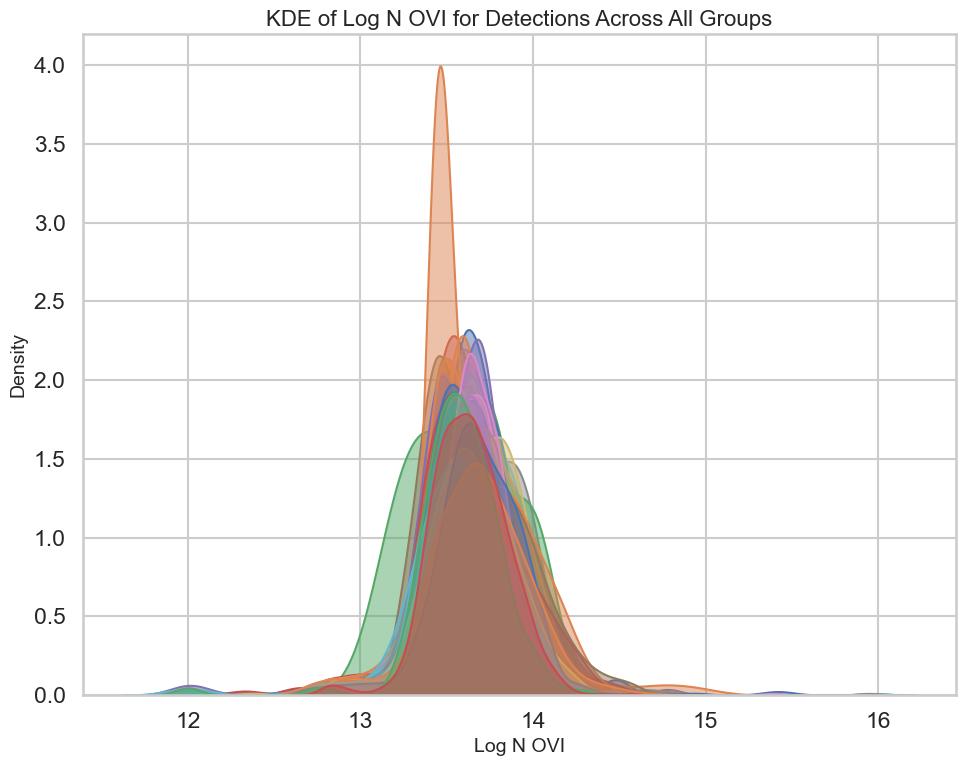

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only detected values
detections_only = combined_data[combined_data['Detection'] == 'Detected']

# Set Seaborn style for aesthetics
sns.set(style='whitegrid', context='talk')

# Plot KDE for each group individually
plt.figure(figsize=(10, 8))
for group_id in detections_only['Group_ID'].unique():
    subset = detections_only[detections_only['Group_ID'] == group_id]
    if not subset.empty:
        sns.kdeplot(subset['N'], label=f'Group {group_id}', shade=True, alpha=0.5)

plt.xlabel('Log N OVI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('KDE of Log N OVI for Detections Across All Groups', fontsize=16)
#plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.savefig('kde_plot_detections_all_groups.png')
plt.show()

#### With the censored data 

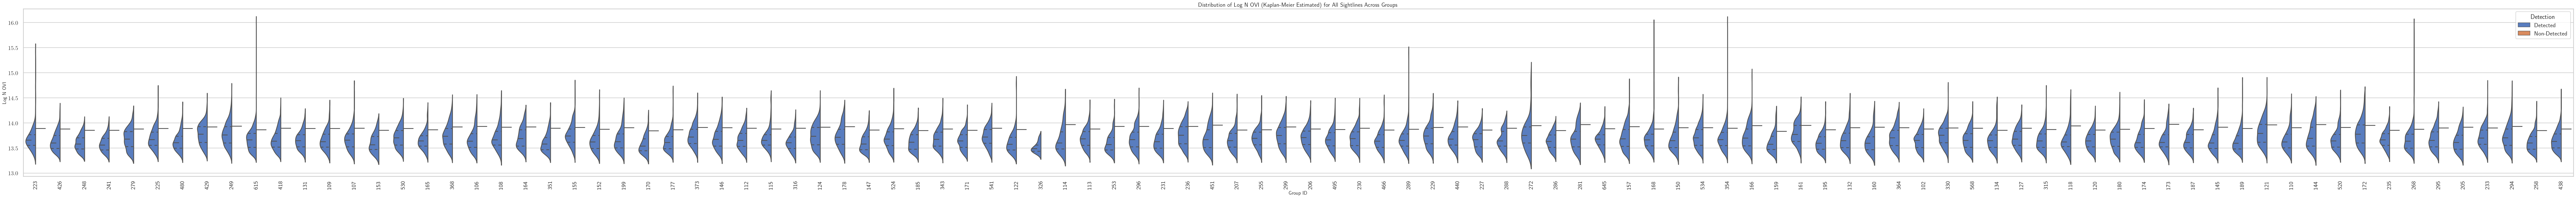

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
import glob
import os

# Set base directories for data
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Filtered'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

# Read the group information from 'Grp_info.txt'
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove any whitespace from column names

# Convert relevant columns to appropriate data types
grp_info_df['Grp_ID'] = grp_info_df['Grp_ID'].astype(str)  # Convert Grp_ID to string
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')

# Initialize a list to store data from each group's fitting results
data_list = []

# Loop through each Group_XXX directory and process the 'Grp_XXX_fitting_results.txt' files
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in group_folders:
    group_id = folder.split('_')[-1]
    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    
    if not os.path.exists(file_path):
        continue  # Skip if file does not exist

    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  # Remove whitespace from column names
    
    # Convert columns to numeric, coercing errors to NaN
    df['N'] = pd.to_numeric(df['N'], errors='coerce')  # Column density (log-scaled)
    df['dN'] = pd.to_numeric(df['dN'], errors='coerce')  # Detection flag for non-detections

    # Identify detections and non-detections based on dN
    df['Detection'] = np.where(df['dN'].notna(), 'Detected', 'Non-Detected')

    # Add Group_ID column for grouping in the plot
    df['Group_ID'] = str(group_id)
    
    # Append data to the list
    data_list.append(df[['N', 'Detection', 'Group_ID']])

# Combine all group data into a single DataFrame
combined_data = pd.concat(data_list, ignore_index=True)

# Apply Kaplan-Meier Estimator to each group separately
km_estimates = []

for group_id in combined_data['Group_ID'].unique():
    subset = combined_data[combined_data['Group_ID'] == group_id]
    
    # Separate detected and censored data for Kaplan-Meier
    N_values = subset['N']
    is_detected = subset['Detection'] == 'Detected'  # True for detections, False for non-detections

    # Drop NaN values from N_values
    valid_data = subset.dropna(subset=['N'])
    N_values = valid_data['N']
    is_detected = valid_data['Detection'] == 'Detected'

    # Kaplan-Meier Fitter
    kmf = KaplanMeierFitter()
    kmf.fit(N_values, event_observed=is_detected)

    # Get the Kaplan-Meier median or mean for censored data
    km_median = kmf.median_survival_time_  # You can also compute mean using kmf.mean_survival_time_
    
    # Add the Kaplan-Meier estimated median to the dataset
    km_estimates.append(pd.DataFrame({
        'Group_ID': [group_id],
        'KM_Estimated_Log_N_OVI': [km_median]
    }))

# Combine the Kaplan-Meier estimates into a single DataFrame
km_data = pd.concat(km_estimates, ignore_index=True)

# Merge the Kaplan-Meier estimates with the combined data for plotting
plot_data = combined_data.merge(km_data, on='Group_ID', how='left')

# Use the Kaplan-Meier estimated values for non-detections in violin plot
plot_data['Log_N_OVI'] = np.where(plot_data['Detection'] == 'Detected', plot_data['N'], plot_data['KM_Estimated_Log_N_OVI'])

# Drop any rows where Log_N_OVI is NaN (if any exist after merging)
plot_data.dropna(subset=['Log_N_OVI'], inplace=True)

# Set Seaborn style for aesthetics
sns.set(style='whitegrid', context='talk')

# Plot violin plot for both detected and non-detected values, grouped by Group_ID
plt.figure(figsize=(100, 8))  # Increase the width if you have many groups to display them all
sns.violinplot(x='Group_ID', y='Log_N_OVI', hue='Detection', data=plot_data, inner='quartile', palette='muted', split=True)
plt.xlabel('Group ID', fontsize=14)
plt.ylabel('Log N OVI', fontsize=14)
plt.title('Distribution of Log N OVI (Kaplan-Meier Estimated) for All Sightlines Across Groups', fontsize=16)

# Rotate x-axis labels for readability if there are many groups
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot
plt.savefig('violin_plot_km_estimated_all_groups_censored_new_filtered.png')
plt.show()

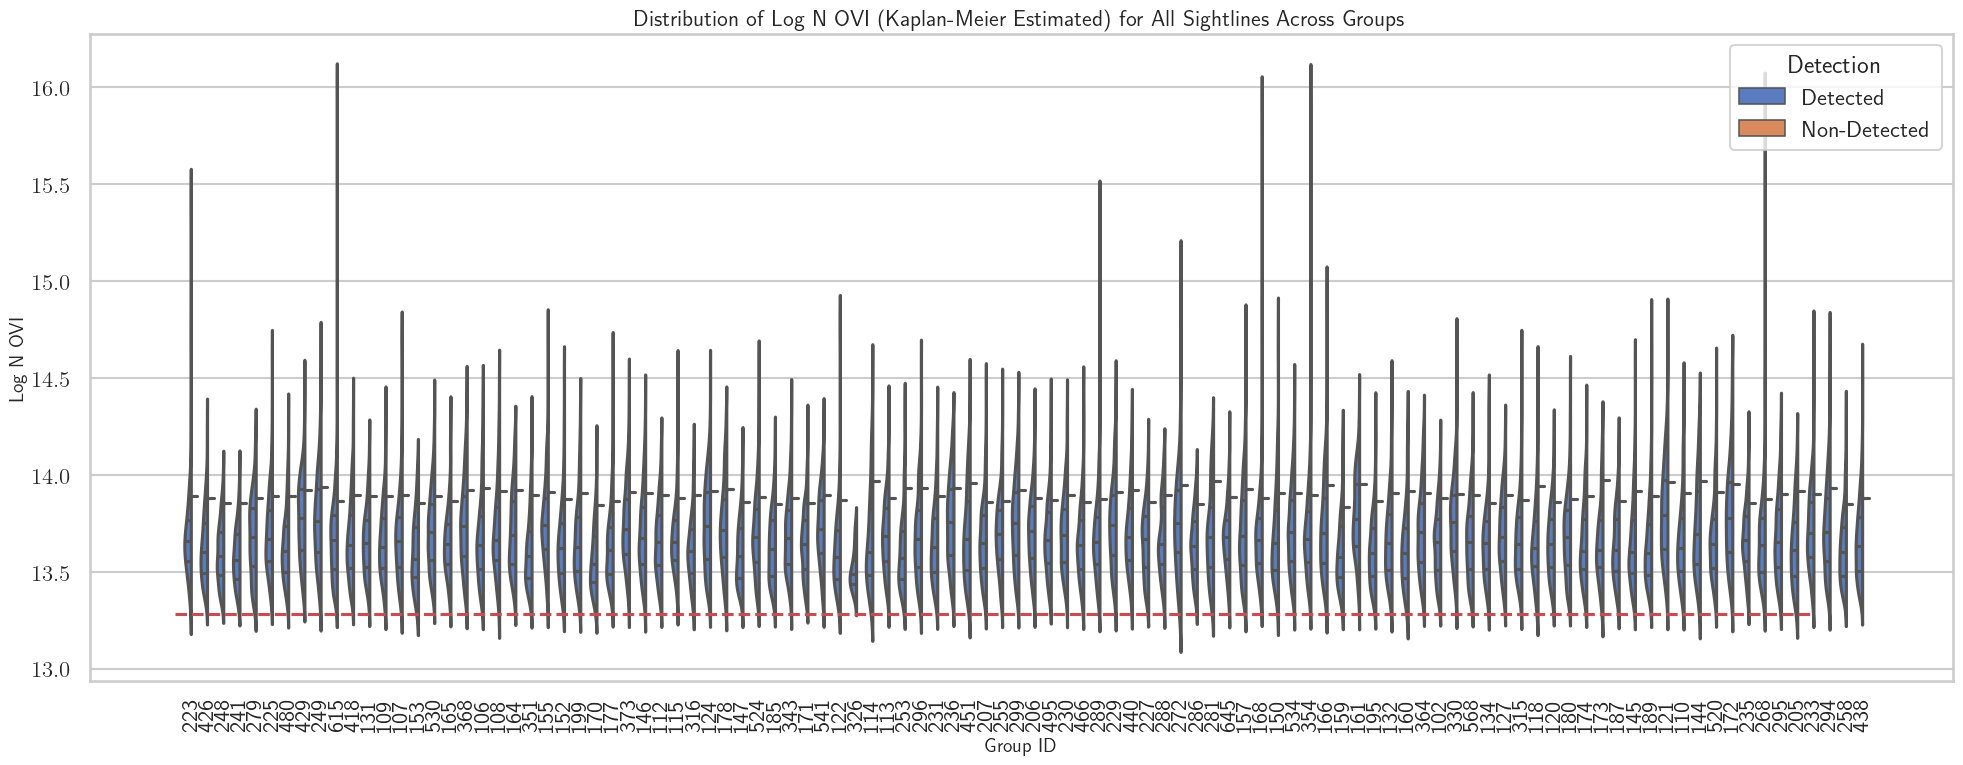

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
import glob
import os

# Set base directories for data
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Filtered'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

# Step 1: Load Group Information
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Clean whitespace from column names
grp_info_df['Grp_ID'] = grp_info_df['Grp_ID'].astype(str)  # Convert Grp_ID to string for merging
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')  # Ensure Halo_mass is numeric

# Step 2: Initialize List for Group Data
data_list = []

# Step 3: Process Each Group's Data File
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in group_folders:
    group_id = folder.split('_')[-1]  # Extract group ID from folder name
    file_path = os.path.join(folder, f'Grp_{group_id}_fitting_results.txt')
    
    if not os.path.exists(file_path):
        continue  # Skip if file does not exist

    # Load the group's data file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  # Remove whitespace from column names
    
    # Convert columns to numeric, handling errors by setting them to NaN
    df['N'] = pd.to_numeric(df['N'], errors='coerce')  # Column density in log scale
    df['dN'] = pd.to_numeric(df['dN'], errors='coerce')  # Detection information

    # Step 4: Identify Detections and Non-Detections
    df['Detection'] = np.where(df['dN'].notna(), 'Detected', 'Non-Detected')

    # Step 5: Add Group ID for later grouping in the plot
    df['Group_ID'] = group_id
    
    # Append processed data to list
    data_list.append(df[['N', 'Detection', 'Group_ID']])

# Step 6: Combine All Group Data into a Single DataFrame
combined_data = pd.concat(data_list, ignore_index=True)

# Step 7: Apply Kaplan-Meier Estimation to Each Group
km_estimates = []
for group_id in combined_data['Group_ID'].unique():
    subset = combined_data[combined_data['Group_ID'] == group_id]
    
    # Separate detected and censored data for Kaplan-Meier
    N_values = subset['N']
    is_detected = subset['Detection'] == 'Detected'  # True for detections, False for non-detections

    # Drop NaN values from N_values
    valid_data = subset.dropna(subset=['N'])
    N_values = valid_data['N']
    is_detected = valid_data['Detection'] == 'Detected'

    # Kaplan-Meier Fitter
    kmf = KaplanMeierFitter()
    kmf.fit(N_values, event_observed=is_detected)

    # Get the Kaplan-Meier median survival time
    km_median = kmf.median_survival_time_
    
    # Add the Kaplan-Meier estimated median to the dataset
    km_estimates.append(pd.DataFrame({
        'Group_ID': [group_id],
        'KM_Estimated_Log_N_OVI': [km_median]
    }))

# Step 8: Combine Kaplan-Meier Estimates into a Single DataFrame
km_data = pd.concat(km_estimates, ignore_index=True)

# Step 9: Merge Kaplan-Meier Estimates with Combined Data for Plotting
plot_data = combined_data.merge(km_data, on='Group_ID', how='left')

# Step 10: Use Kaplan-Meier Estimates for Non-Detections in the Violin Plot
plot_data['Log_N_OVI'] = np.where(plot_data['Detection'] == 'Detected', plot_data['N'], plot_data['KM_Estimated_Log_N_OVI'])

# Drop any rows where Log_N_OVI is NaN
plot_data.dropna(subset=['Log_N_OVI'], inplace=True)

# Step 11: Set Seaborn Style and Plot Violin Plot
sns.set(style='whitegrid', context='talk')
plt.figure(figsize=(20, 8))  # Adjust width if needed for publication
sns.violinplot(x='Group_ID', y='Log_N_OVI', hue='Detection', data=plot_data, inner='quartile', palette='muted', split=True)
plt.xlabel('Group ID', fontsize=14)
plt.ylabel('Log N OVI', fontsize=14)
plt.title('Distribution of Log N OVI (Kaplan-Meier Estimated) for All Sightlines Across Groups', fontsize=16)

# Rotate x-axis labels for readability if there are many groups
plt.xticks(rotation=90)
plt.tight_layout()
plt.hlines(13.28, -1, 100, colors='r', linestyles='dashed')
# Save the plot
#plt.savefig('violin_plot_km_estimated_all_groups_censored.png')
plt.show()

In [213]:
# Set base directories for data
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

file_gal = 'Group_177/Grp_177_fitting_results.txt'
file_gal = os.path.join(base_dir, file_gal)




df_grp = pd.read_csv(file_gal, sep='|', skipinitialspace=True)
df_grp.columns = df_grp.columns.str.strip()  # Remove whitespace from column names

# Convert relevant columns to numeric, coercing errors to NaN
numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']

for col in numeric_columns:
    if col in df_grp.columns:
        df_grp[col] = pd.to_numeric(df_grp[col], errors='coerce')
    
# filter such tht only detections are considered which is not nan in dN
df_grp = df_grp[~df_grp['dN'].isna()]

print(df_grp['N'].describe())
#  sort with respect to N values in ascending order
df_grp = df_grp.sort_values(by='N')

print(df_grp[0:10])

count    468.000000
mean      13.570717
std        0.268561
min       11.980804
25%       13.459622
50%       13.585237
75%       13.713787
max       14.630502
Name: N, dtype: float64
      Unnamed: 0  Sightline         Species    EW(mA)  dEW(mA)          N  \
3445         NaN     3435.0  OVI1031         1.080772      NaN  11.980804   
3446         NaN     3435.0  OVI1031         1.069753      NaN  11.985340   
3450         NaN     3435.0  OVI1031         1.184497      NaN  11.989582   
3447         NaN     3435.0  OVI1031         1.072535      NaN  12.007213   
4664         NaN     4633.0  OVI1031         1.315176      NaN  12.103674   
3551         NaN     3535.0  OVI1031         4.419672      NaN  12.580299   
1322         NaN     1322.0  OVI1031         7.295653      NaN  12.790435   
2439         NaN     2434.0  OVI1031         8.424164      NaN  12.822157   
3224         NaN     3219.0  OVI1031         8.252857      NaN  12.835620   
3671         NaN     3653.0  OVI1031         8

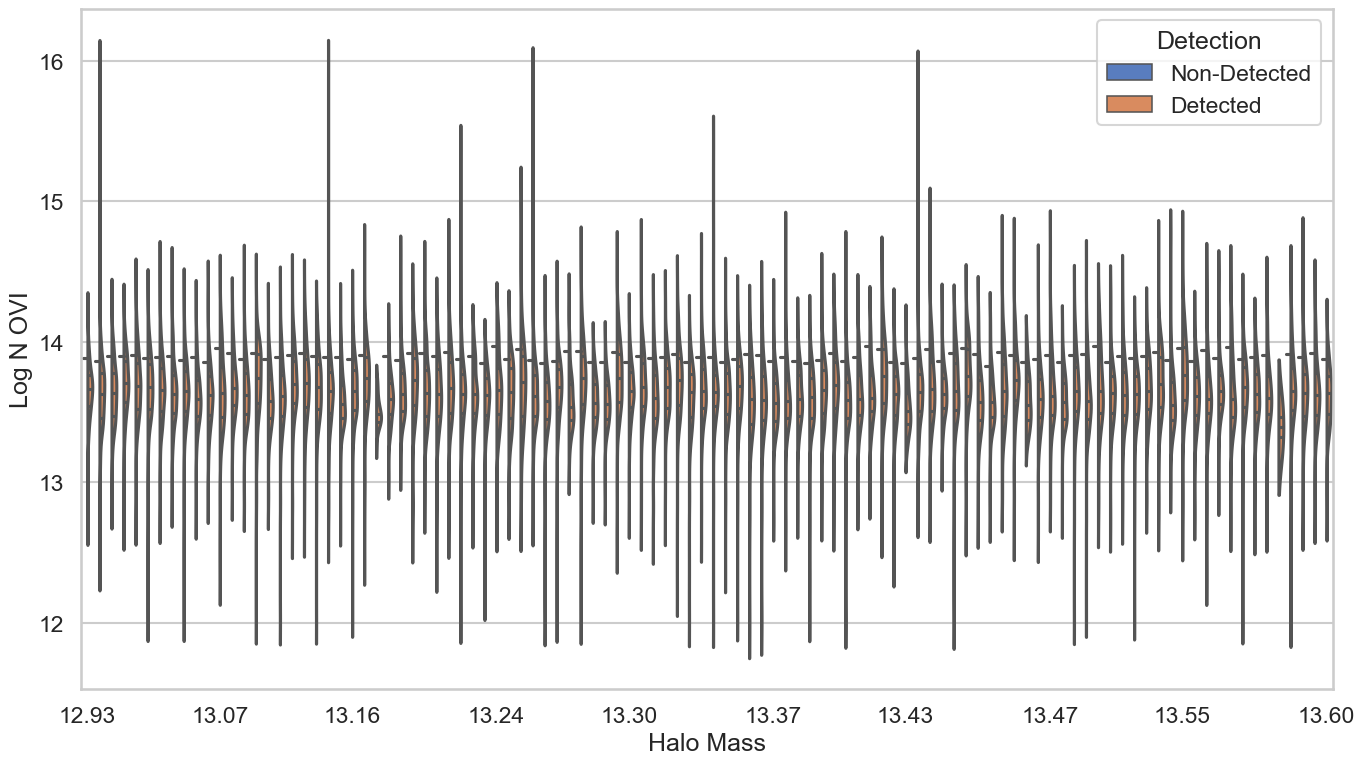

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Sort the data by Halo_mass to ensure correct order
plot_data = plot_data.sort_values(by='Halo_mass')

# Create unique Halo_mass values and a corresponding index for each
unique_halo_masses = plot_data['Halo_mass'].unique()
x_positions = np.arange(len(unique_halo_masses))

# Map each row’s Halo_mass to its position on the x-axis
plot_data['x_position'] = plot_data['Halo_mass'].map(dict(zip(unique_halo_masses, x_positions)))

# Plot each "violin" centered around its Halo_mass position
fig, ax = plt.subplots(figsize=(14, 8))

# Use Seaborn to plot violins using custom x-positions
sns.violinplot(x='x_position', y='Log_N_OVI', hue='Detection', data=plot_data,
               inner='quartile', palette='muted', split=True, ax=ax)

# Set custom tick positions and labels
selected_ticks = np.linspace(0, len(unique_halo_masses) - 1, 10, dtype=int)  # Select 10 evenly spaced ticks
ax.set_xticks(x_positions[selected_ticks])
ax.set_xticklabels([f"{unique_halo_masses[i]:.2f}" for i in selected_ticks], rotation=0)
ax.set_xlabel("Halo Mass")
ax.set_ylabel("Log N OVI")

plt.tight_layout()
plt.show()

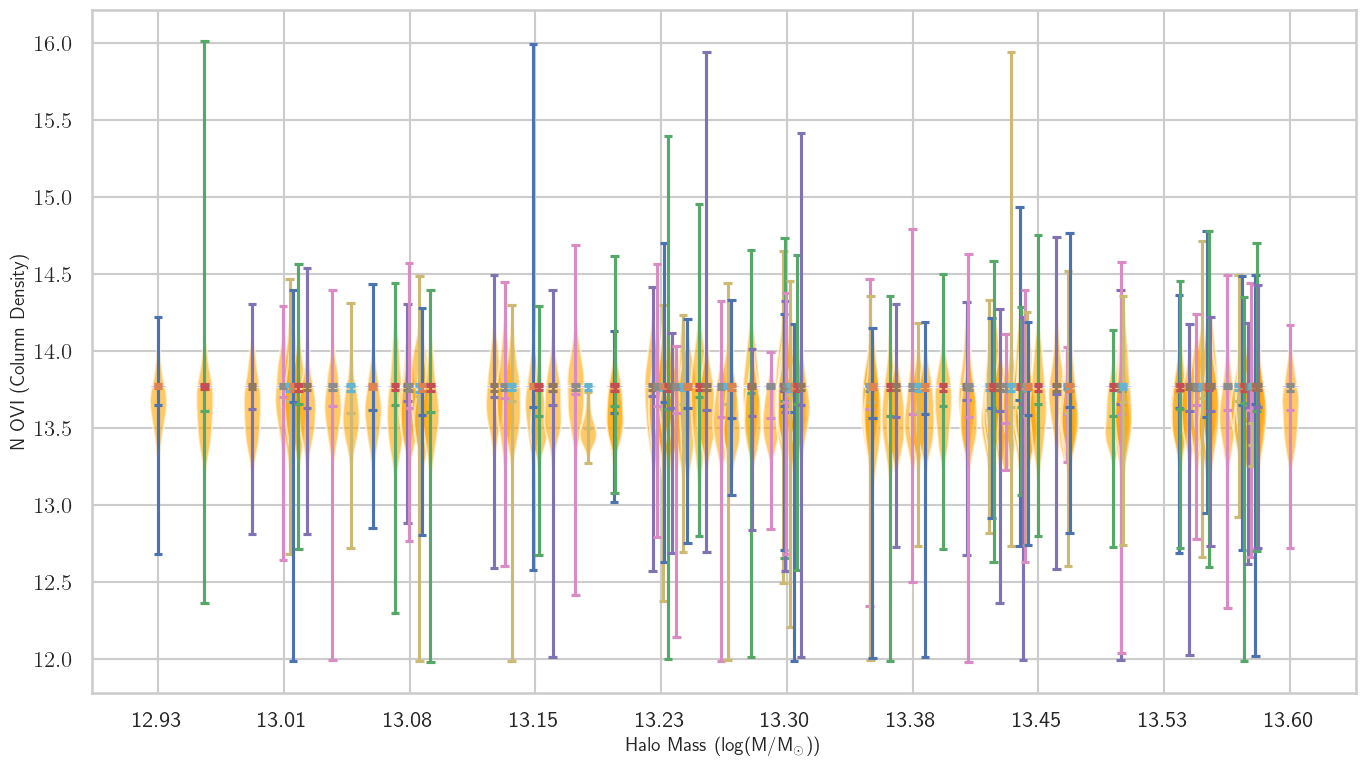

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Define the base directory for updated results
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated'

# Read the group information from 'Grp_info.txt'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove any whitespace from column names

# Convert necessary columns to numeric types
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')

# Drop any rows with NaN in Halo_mass or Grp_ID
grp_info_df.dropna(subset=['Halo_mass', 'Grp_ID'], inplace=True)

# Initialize a list to store data for all groups
data_list = []

# Loop through each Group_XXX directory and process the updated 'Grp_XXX_fitting_results.txt' file
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))

for folder in group_folders:
    # Extract group ID from the folder name (e.g., 'Group_001' -> '001')
    group_id = folder.split('_')[-1]
    group_id = float(group_id)  # Ensure group_id is float to match grp_info_df

    # Get the halo mass for this group
    group_info = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_info.empty:
        print(f"No group info found for Group {group_id}, skipping.")
        continue
    halo_mass = group_info['Halo_mass'].values[0]

    # Construct the absolute file path
    file_path = os.path.join(folder, f'Grp_{int(group_id)}_fitting_results.txt')

    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip to the next folder if file not found

    # Read the fitting results file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  # Remove whitespace from column names

    # Convert relevant columns to numeric, coercing errors to NaN
    numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows where 'N' is NaN
    df = df[~df['N'].isna()]

    # Identify detections and non-detections based on 'dEW(mA)' column
    df['Detection'] = np.where(df['dEW(mA)'].isna(), 'Detected', 'Non-Detected')

    # Add halo mass to the DataFrame
    df['Halo_mass'] = halo_mass

    # Append to the data list
    data_list.append(df[['N', 'Detection', 'Halo_mass']])

# Combine all group data into a single DataFrame
if data_list:
    combined_data = pd.concat(data_list, ignore_index=True)
else:
    print("No data to plot.")
    exit()

# Remove infinite or NaN values
combined_data = combined_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['N', 'Halo_mass'])

# Separate the data based on Detection for different colors
detected_data = combined_data[combined_data['Detection'] == 'Detected']
non_detected_data = combined_data[combined_data['Detection'] == 'Non-Detected']

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Create a list of unique halo masses to determine violin positions
unique_halo_masses = np.sort(combined_data['Halo_mass'].unique())

# Plot violin plots for each unique halo mass
for i, halo_mass in enumerate(unique_halo_masses):
    detected_values = detected_data[detected_data['Halo_mass'] == halo_mass]['N']
    non_detected_values = non_detected_data[non_detected_data['Halo_mass'] == halo_mass]['N']

    parts_detected = ax.violinplot(detected_values, positions=[halo_mass], widths=0.01, showmeans=True, showextrema=True)
    parts_non_detected = ax.violinplot(non_detected_values, positions=[halo_mass], widths=0.01, showmeans=True, showextrema=True)
    
    # Color the violins differently for detected and non-detected
    for pc in parts_detected['bodies']:
        pc.set_facecolor('orange')
        pc.set_alpha(0.6)
    for pc in parts_non_detected['bodies']:
        pc.set_facecolor('blue')
        pc.set_alpha(0.6)

# Setting labels and title
ax.set_xlabel('Halo Mass (log(M/M$_\\odot$))', fontsize=14)
ax.set_ylabel('N OVI (Column Density)', fontsize=14)
#ax.set_yscale('log')  # Keep the y-axis in log scale
#ax.set_title('Distribution of N OVI Across Halo Mass', fontsize=16)

# Customize x-ticks to show fewer values for better readability
selected_ticks = np.linspace(unique_halo_masses.min(), unique_halo_masses.max(), 10)
ax.set_xticks(selected_ticks)
ax.set_xticklabels([f"{tick:.2f}" for tick in selected_ticks], rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1940347219.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1940347219.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1940347219.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

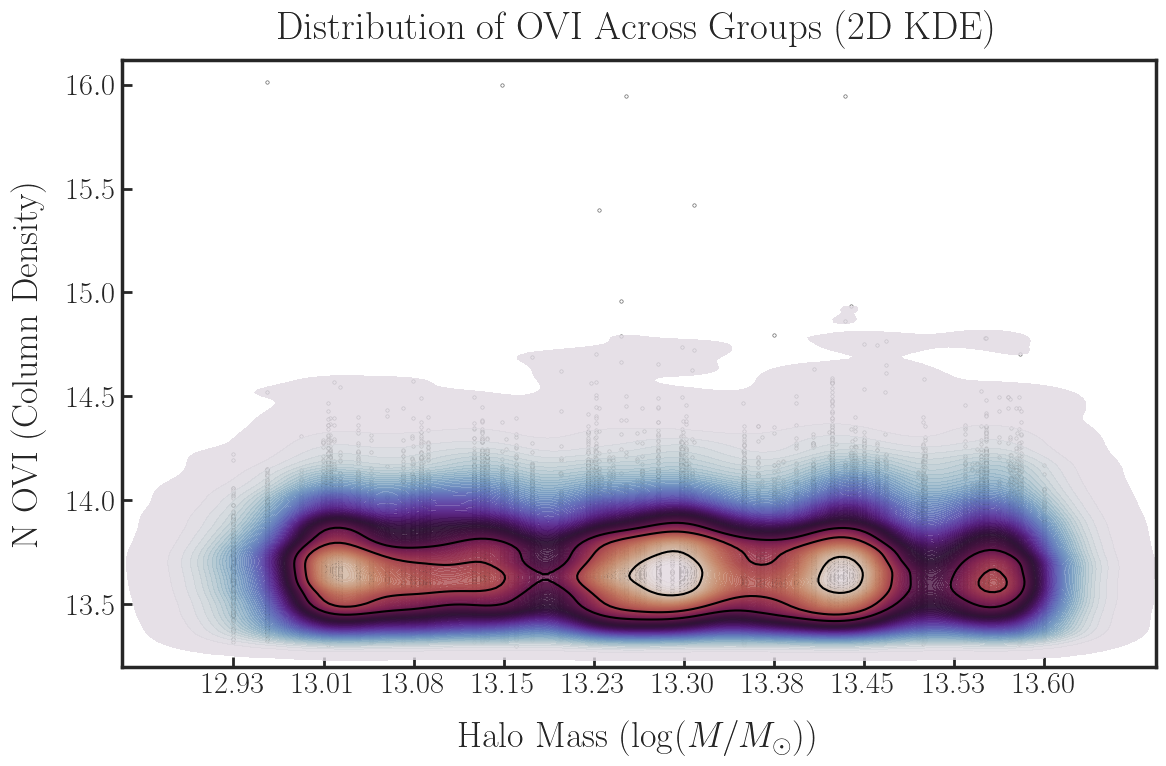

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set Seaborn and Matplotlib configurations for publication quality
sns.set(style="ticks", font_scale=1.5, rc={"text.usetex": True})
plt.rc('font', family='Times New Roman')
plt.rcParams.update({
    'axes.labelsize': 26,
    'axes.titlesize': 22,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 26,
    'figure.titlesize': 22
})

# Define the base directory for updated results
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Filtered'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

# Load the group information file
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove whitespace in column names

# Convert necessary columns to numeric and drop NaN values
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')
grp_info_df.dropna(subset=['Halo_mass', 'Grp_ID'], inplace=True)

# Initialize a list to collect data from all groups
data_list = []

# Process each group folder to read 'Grp_XXX_fitting_results.txt' files
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in group_folders:
    # Extract group ID from the folder name and convert to float
    group_id = float(folder.split('_')[-1])

    # Get halo mass for this group
    group_info = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_info.empty:
        continue
    halo_mass = group_info['Halo_mass'].values[0]

    # Construct file path for each group's results file
    file_path = os.path.join(folder, f'Grp_{int(group_id)}_fitting_results.txt')
    if not os.path.exists(file_path):
        continue

    # Load data from the results file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  # Remove whitespace in column names

    # Convert columns to numeric, handling errors by setting non-convertible values to NaN
    numeric_columns = ['N', 'dN']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Filter detections (rows with non-NaN 'dN' values)
    detections = df[df['dN'].notna()]
    if detections.empty:
        continue

    # Add halo mass to the detections data
    detections['Halo_mass'] = halo_mass
    data_list.append(detections[['N', 'Halo_mass']])

# Combine data from all groups into a single DataFrame and remove NaN values
if data_list:
    combined_data = pd.concat(data_list, ignore_index=True).dropna()
else:
    print("No detection data available for plotting.")
    exit()

# Creating a detailed 2D KDE plot with enhanced aesthetics
fig, ax = plt.subplots(figsize=(12, 8))

# Plot KDE with higher levels to capture more detailed density distribution
kde_plot = sns.kdeplot(
    data=combined_data,
    x="Halo_mass",
    y="N",
    fill=True,
    cmap="twilight",  # Use a different colormap for better contrast
    levels=170,  # Increase the levels for more contour detail
    thresh=0.0005,  # Lower threshold for faint distributions
    alpha=0.8,  # Slightly translucent for depth perception
    ax=ax  ,
    rasterized=True,


)

# Overlay the actual data points as scatter to show individual detections
ax.scatter(
    combined_data['Halo_mass'], combined_data['N'], 
    color='white', s=6, alpha=0.6, label='Detections', 
    edgecolor='black', linewidth=0.5, marker='o', zorder=0
)


contour_levels = [ 0.5, 0.68,0.95] 
sns.kdeplot(
    data=combined_data, x="Halo_mass", y="N",
    levels=contour_levels, color="black", linewidths=1.5, ax=ax
)


# norm = plt.Normalize(vmin=kde_plot.collections[0].get_paths()[0].vertices[:, 0].min(),
#                      vmax=kde_plot.collections[0].get_paths()[0].vertices[:, 0].max())
# sm = plt.cm.ScalarMappable(cmap="jet_r", norm=norm)
# sm.set_array([])
# cbar = fig.colorbar(sm, ax=ax)
# cbar.set_label(r'KDE Density', fontsize=18)
# Labeling axes with LaTeX-style formatting and adjusting aesthetics

ax.set_xlabel(r'Halo Mass ($\log(M/M_\odot)$)', fontsize=26, labelpad=15)
ax.set_ylabel(r'N OVI (Column Density)', fontsize=26, labelpad=15)
#ax.set_yscale('log')  # Log scale for better visualization of N values
ax.set_title(r'Distribution of OVI Across Groups (2D KDE)', fontsize=28, pad=15)

# Grid lines for better readability
# ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# Adjust x-axis ticks and add extra details
selected_ticks = np.linspace(combined_data['Halo_mass'].min(), combined_data['Halo_mass'].max(), 10)
ax.set_xticks(selected_ticks)
ax.set_xticklabels([f"{tick:.2f}" for tick in selected_ticks], rotation=0)
ax.tick_params(axis='both', which='major', tickdir = 'in', width = 2, length = 7)

ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)


# # Overlay median line as an example of additional information
# median_N = np.median(combined_data['N'])
# ax.axhline(median_N, color='green', linestyle='--', linewidth=1.5, label='Median N OVI')

# # Legend for enhanced interpretability
# ax.legend(loc='upper left', fontsize=18, frameon=True, framealpha=0.9)

# Final layout adjustments and display
plt.tight_layout()
plt.savefig('2d_kde_plot_2_filter.png', dpi=400)  # Save the plot as a high-resolution image
plt.show()

### Overlayed with the COS-IGrM sample

/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1069877818.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1069877818.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1069877818.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

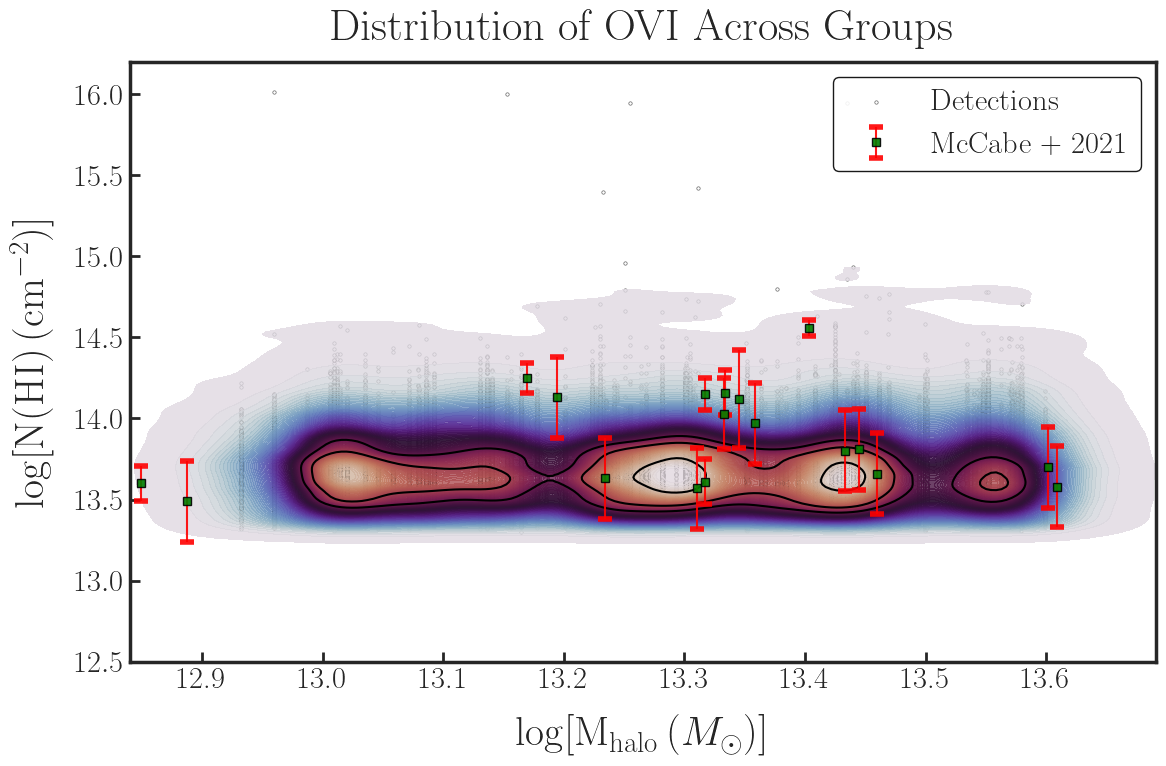

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set Seaborn and Matplotlib configurations for publication quality
sns.set(style="ticks", font_scale=1.5, rc={"text.usetex": True})
plt.rc('font', family='Times New Roman')
plt.rcParams.update({
    'axes.labelsize': 26,
    'axes.titlesize': 22,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 26,
    'figure.titlesize': 22
})

# Define directories for results and observational data
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Filtered'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
full_sample_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Sample_full.txt'
plotting_data_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Plotting_data_subset.txt'

# Load group information
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()

# Convert necessary columns to numeric and drop NaN values
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')
grp_info_df.dropna(subset=['Halo_mass', 'Grp_ID'], inplace=True)

# Collect data from all groups
data_list = []
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in group_folders:
    group_id = float(folder.split('_')[-1])
    group_info = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_info.empty:
        continue
    halo_mass = group_info['Halo_mass'].values[0]
    file_path = os.path.join(folder, f'Grp_{int(group_id)}_fitting_results.txt')
    if not os.path.exists(file_path):
        continue

    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()
    numeric_columns = ['N', 'dN']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    detections = df[df['dN'].notna()]
    if detections.empty:
        continue

    detections['Halo_mass'] = halo_mass
    data_list.append(detections[['N', 'Halo_mass']])

# Combine data
combined_data = pd.concat(data_list, ignore_index=True).dropna() if data_list else pd.DataFrame()

# Creating the 2D KDE plot
fig, ax = plt.subplots(figsize=(12, 8))
kde_plot = sns.kdeplot(
    data=combined_data, x="Halo_mass", y="N", fill=True,
    cmap="twilight", levels=170, thresh=0.0005, alpha=0.8, ax=ax, rasterized=True
)
ax.scatter(combined_data['Halo_mass'], combined_data['N'], color='white', s=6, alpha=0.6, label='Detections', 
           edgecolor='black', linewidth=0.5, marker='o', zorder=0)
sns.kdeplot(data=combined_data, x="Halo_mass", y="N", levels=[0.5, 0.68, 0.95], color="black", linewidths=1.5, ax=ax)

# Overlay Observational Data
full_sample_df = pd.read_csv(full_sample_path, sep='\s+', comment='#', engine='python')
plotting_data_df = pd.read_csv(plotting_data_path, sep='\s+', comment='#', engine='python')
full_sample_df.columns = full_sample_df.columns.str.strip()
plotting_data_df.columns = plotting_data_df.columns.str.strip()

if 'Group' in full_sample_df.columns and 'Group' in plotting_data_df.columns:
    merged_df = pd.merge(full_sample_df, plotting_data_df, on='Group')
    merged_df['log_Mass'] = np.log10(merged_df['Mass'])
    plt.errorbar(merged_df['log_Mass'], merged_df['N_OVI'], 
                 yerr=[merged_df['N_OVI_err_low'], merged_df['N_OVI_err_high']],
                 fmt='s', markerfacecolor='green', markeredgecolor='black', 
                 ecolor='red', capsize=5, capthick=4, alpha=0.9, label='McCabe + 2021')

# Labeling axes and title
# ax.set_xlabel(r'Halo Mass ($\log(M/M_\odot)$)', fontsize=30, labelpad=15)
# ax.set_ylabel(r'N OVI (Column Density)', fontsize=30, labelpad=15)
ax.set_xlabel(r'$\log[\mathrm{M_{halo}} \, (M_\odot)]$', fontsize=30, labelpad=15)
ax.set_ylabel(r'$\log[\mathrm{N(HI)} \, (\mathrm{cm^{-2}})]$', fontsize=30, labelpad=15)
ax.set_title(r'Distribution of OVI Across Groups', fontsize=32, pad=15)

# Set x-axis ticks
#selected_ticks = np.linspace(combined_data['Halo_mass'].min(), combined_data['Halo_mass'].max(), 10)
selected_ticks = np.arange(12.9, 13.7, 0.1)
ax.set_xticks(selected_ticks)
ax.set_xticklabels([f"{tick:.1f}" for tick in selected_ticks])
ax.tick_params(axis='both', which='major', tickdir='in', width=2, length=7)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
ax.set_ylim(12.5, 16.2)
# increase the font size of the xtick labels and ytick labels

# Final adjustments
ax.legend(loc= 'upper right', fontsize=22, frameon=True,
          framealpha=0.9, edgecolor='black', fancybox=True,
        )

plt.tight_layout()
plt.savefig('2d_kde_plot_with_observed.png', dpi=400)
plt.show()

/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_29050/758012730.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_29050/758012730.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_29050/758012730.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

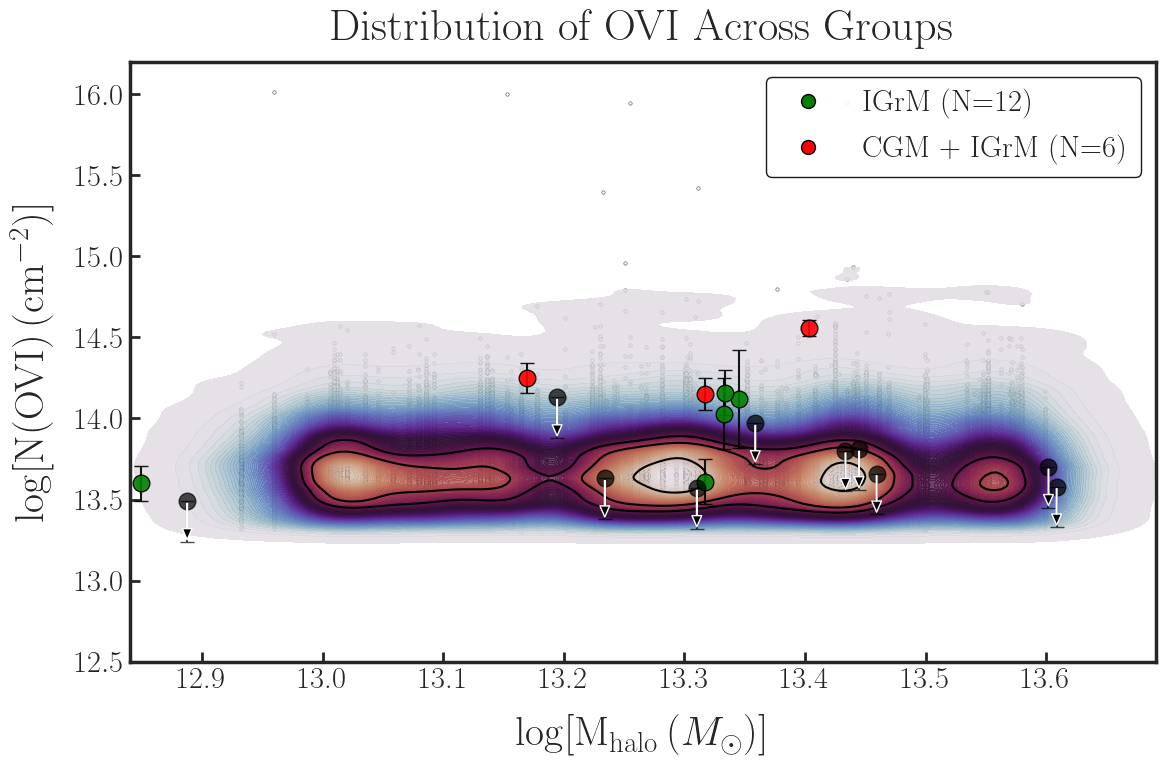

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set Seaborn and Matplotlib configurations for publication quality
sns.set(style="ticks", font_scale=1.5, rc={"text.usetex": True})
plt.rc('font', family='Times New Roman')
plt.rcParams.update({
    'axes.labelsize': 26,
    'axes.titlesize': 22,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 24,  # Decreased legend font size by 2 points
    'figure.titlesize': 22
})

# Define directories for results and observational data
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_Filtered'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
full_sample_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Sample_full.txt'
plotting_data_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Plotting_data_subset.txt'

# Load group information
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()

# Convert necessary columns to numeric and drop NaN values
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')
grp_info_df.dropna(subset=['Halo_mass', 'Grp_ID'], inplace=True)

# Collect data from all groups
data_list = []
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in group_folders:
    group_id = float(folder.split('_')[-1])
    group_info = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_info.empty:
        continue
    halo_mass = group_info['Halo_mass'].values[0]
    file_path = os.path.join(folder, f'Grp_{int(group_id)}_fitting_results.txt')
    if not os.path.exists(file_path):
        continue

    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()
    numeric_columns = ['N', 'dN']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    detections = df[df['dN'].notna()]
    if detections.empty:
        continue

    detections['Halo_mass'] = halo_mass
    data_list.append(detections[['N', 'Halo_mass']])

# Combine data
combined_data = pd.concat(data_list, ignore_index=True).dropna() if data_list else pd.DataFrame()

# Creating the 2D KDE plot
fig, ax = plt.subplots(figsize=(12, 8))
kde_plot = sns.kdeplot(
    data=combined_data, x="Halo_mass", y="N", fill=True,
    cmap="twilight", levels=170, thresh=0.0005, alpha=0.8, ax=ax, rasterized=True
)
ax.scatter(combined_data['Halo_mass'], combined_data['N'], color='white', s=6, alpha=0.6, label='Detections', 
           edgecolor='black', linewidth=0.5, marker='o', zorder=0)
sns.kdeplot(data=combined_data, x="Halo_mass", y="N", levels=[0.5, 0.68, 0.95], color="black", linewidths=1.5, ax=ax)

# Overlay Observational Data
full_sample_df = pd.read_csv(full_sample_path, sep='\s+', comment='#', engine='python')
plotting_data_df = pd.read_csv(plotting_data_path, sep='\s+', comment='#', engine='python')
full_sample_df.columns = full_sample_df.columns.str.strip()
plotting_data_df.columns = plotting_data_df.columns.str.strip()

if 'Group' in full_sample_df.columns and 'Group' in plotting_data_df.columns:
    merged_df = pd.merge(full_sample_df, plotting_data_df, on='Group')
    merged_df['log_Mass'] = np.log10(merged_df['Mass'])

    # Plot all points with error bars
    for subset_type, color, label in [('I', 'green', 'IGrM (N=12)'), ('C', 'red', 'CGM + IGrM (N=6)')]:
        subset_df = merged_df[merged_df['Subset'] == subset_type]
        for _, row in subset_df.iterrows():
            if row['N_OVI_err_low'] == 0.25 or row['N_OVI_err_high'] == 0.25:
                # Plot with downward arrow for non-detections
                ax.errorbar(row['log_Mass'], row['N_OVI'], 
                            yerr=[[row['N_OVI_err_low']], [0]], fmt='o',markersize = 12, zorder= 2, 
                            markerfacecolor='black', markeredgecolor='black', ecolor='black', capsize=5, alpha=0.7,
                            label=label if row.name == subset_df.index[0] else "")
                ax.annotate('', xy=(row['log_Mass'], row['N_OVI'] - row['N_OVI_err_low']),
                            xytext=(row['log_Mass'], row['N_OVI']),
                            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=7, headlength=8))
            else:
                # Plot with regular error bars for detections
                ax.errorbar(row['log_Mass'], row['N_OVI'], 
                            yerr=[[row['N_OVI_err_low']], [row['N_OVI_err_high']]], fmt='o',markersize = 12,
                            markerfacecolor=color, markeredgecolor='black', ecolor='black', capsize=5, alpha=0.9,zorder = 2,
                            label=label if row.name == subset_df.index[0] else "")

# Labeling axes and title
ax.set_xlabel(r'$\log[\mathrm{M_{halo}} \, (M_\odot)]$', fontsize=30, labelpad=15)
ax.set_ylabel(r'$\log[\mathrm{N(OVI)} \, (\mathrm{cm^{-2}})]$', fontsize=30, labelpad=15)
ax.set_title(r'Distribution of OVI Across Groups', fontsize=32, pad=15)

# Set x-axis ticks
selected_ticks = np.arange(12.9, 13.7, 0.1)
ax.set_xticks(selected_ticks)
ax.set_xticklabels([f"{tick:.1f}" for tick in selected_ticks])
ax.tick_params(axis='both', which='major', tickdir='in', width=2, length=7)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
ax.set_ylim(12.5, 16.2)

# Final adjustments
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markeredgecolor='black', markersize=10, label='IGrM (N=12)'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='black', markersize=10, label='CGM + IGrM (N=6)')]
ax.legend(handles=legend_handles, loc='upper right', fontsize=22, frameon=True, framealpha=0.9, edgecolor='black', fancybox=True)

plt.tight_layout()
plt.savefig('2d_kde_plot_with_observed_COS.png', dpi=300)
plt.show()


/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/887792615.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/887792615.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/887792615.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

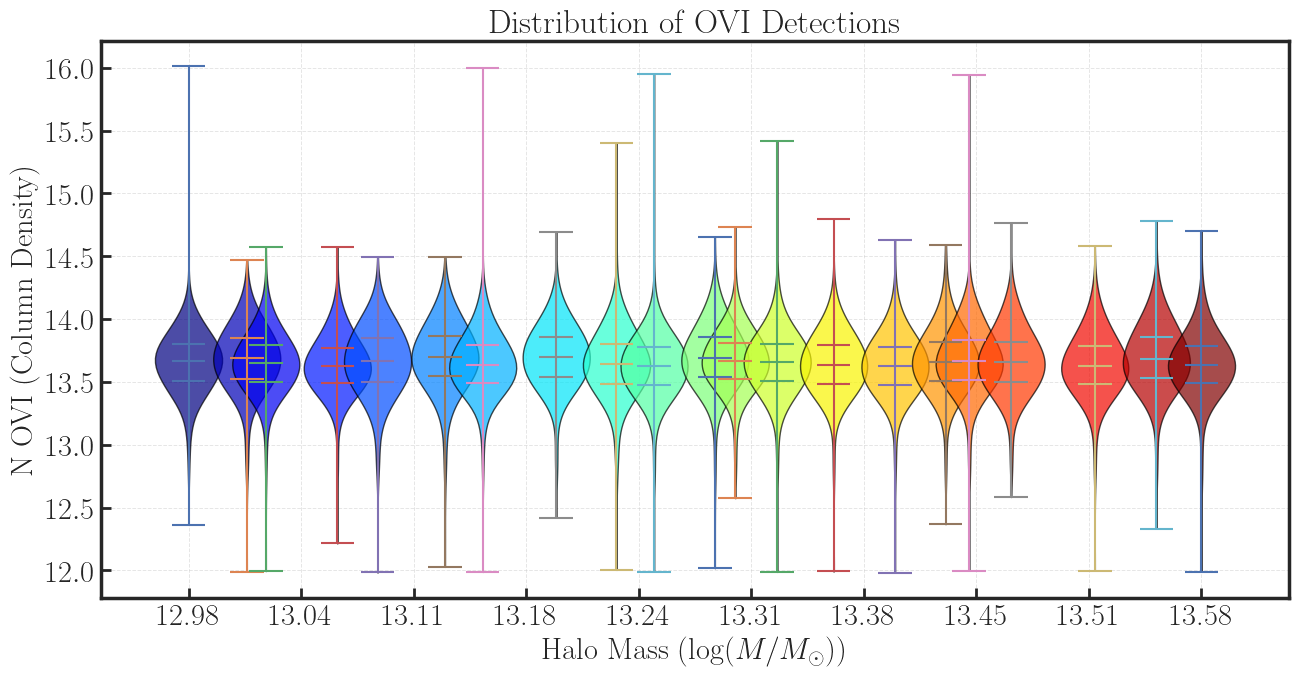

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.cm as cm

# Set base directory and paths
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

# Load the group information file
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove whitespace in column names

# Convert necessary columns to numeric and drop any NaN values
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')
grp_info_df.dropna(subset=['Halo_mass', 'Grp_ID'], inplace=True)

# Initialize a list to collect data from all groups
data_list = []

# Process each group folder to read 'Grp_XXX_fitting_results.txt' files
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in group_folders:
    # Extract group ID from the folder name
    group_id = folder.split('_')[-1]
    group_id = float(group_id)  # Ensure group_id matches grp_info_df format

    # Get halo mass for this group
    group_info = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_info.empty:
        print(f"No group info found for Group {group_id}, skipping.")
        continue
    halo_mass = group_info['Halo_mass'].values[0]

    # Construct file path for each group's results file
    file_path = os.path.join(folder, f'Grp_{int(group_id)}_fitting_results.txt')

    # Skip if the file doesn't exist
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue

    # Load data from the results file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  # Remove whitespace in column names

    # Convert necessary columns to numeric, handling errors by setting non-convertible values to NaN
    numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Filter to only include detections (rows with non-NaN 'dN' values)
    detections = df[df['dN'].notna()]

    # If no detections, skip this group
    if detections.empty:
        print(f"No detections for Group {group_id}, skipping.")
        continue

    # Add halo mass to the detections data
    detections['Halo_mass'] = halo_mass
    data_list.append(detections[['N', 'Halo_mass']])

# Combine data from all groups into a single DataFrame
if data_list:
    combined_data = pd.concat(data_list, ignore_index=True)
else:
    print("No detection data available for plotting.")
    exit()

# Sort by halo mass and split into 21 bins with equal numbers of groups
combined_data_sorted = combined_data.sort_values(by="Halo_mass").reset_index(drop=True)
bins = np.array_split(combined_data_sorted, 21)

# Prepare data for plotting
violin_data = []
violin_positions = []
colors = cm.jet(np.linspace(0, 1, len(bins)))  # Generate a color for each bin

for bin_data in bins:
    mean_halo_mass = bin_data["Halo_mass"].mean()  # Position the violin at the mean halo mass
    violin_positions.append(mean_halo_mass)
    detected_values = bin_data["N"].values  # Column density values for the bin
    violin_data.append(detected_values)

# Set Seaborn style and matplotlib settings for publication quality
sns.set(style="ticks", font_scale=1.2, rc={"text.usetex": True})
plt.rc('font', family='serif')
plt.rcParams.update({
    'axes.labelsize': 20,
    'axes.titlesize': 22,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 22,
    'figure.titlesize': 22
})


plt.rc('font', family='Times New Roman')
plt.rcParams.update({
    'axes.labelsize': 26,
    'axes.titlesize': 22,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 26,
    'figure.titlesize': 22
})
# Plot the violin plot for detections only
fig, ax = plt.subplots(figsize=(13, 7))

# Plot each violin at its calculated position with unique colors
for i, (pos, data) in enumerate(zip(violin_positions, violin_data)):
    parts = ax.violinplot(data, positions=[pos], widths=0.04, showmeans=False, showextrema=True, showmedians=True,
                          quantiles=[0.25, 0.75], bw_method=0.5)
    
    # Apply unique color to each violin
    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)

# Modify each violin to be single-sided by clipping the other side
# for i, (pos, data) in enumerate(zip(violin_positions, violin_data)):
#     parts = ax.violinplot(data, positions=[pos], widths=0.04, showmeans=False, showextrema=True, showmedians=True,
#                           quantiles=[0.25, 0.75], bw_method=0.5)
    
#     # Apply unique color to each half violin
#     for pc in parts['bodies']:
#         pc.set_facecolor(colors[i])
#         pc.set_edgecolor('black')
#         pc.set_alpha(0.7)
        
#         # Clip to make it single-sided (right side only)
#         pc.set_clip_box(plt.Rectangle((pos, 0), width=0.04, height=np.inf, transform=ax.transData))

# Customize the plot
ax.set_xlabel(r'Halo Mass ($\log(M/M_\odot)$)', fontsize=22)
ax.set_ylabel(r'N OVI (Column Density)', fontsize=22)
#ax.set_yscale('log')
ax.set_title('Distribution of OVI Detections', fontsize=24)

# Adjust x-axis ticks based on mean positions of the halo mass bins
selected_ticks = np.linspace(min(violin_positions), max(violin_positions), 10)
ax.set_xticks(selected_ticks)
ax.set_xticklabels([f"{tick:.2f}" for tick in selected_ticks], rotation=0)
ax.grid(True, linestyle='--', alpha=0.6)
# # Add color bar to indicate the progression through halo mass bins
# sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=min(violin_positions), vmax=max(violin_positions)))
# sm.set_array([])
# cbar = fig.colorbar(sm, ax=ax)
# cbar.set_label('Mean Halo Mass in Bin', fontsize=16)

ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
ax.tick_params(width=2, length=7, direction='in')

plt.tight_layout()
plt.savefig('violin_plot_halo_mass_bins.png', dpi=400)
plt.show()

/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1892591588.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1892591588.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Censored'] = 0  # 0 indicates detected (not censored)
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/1892591588.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

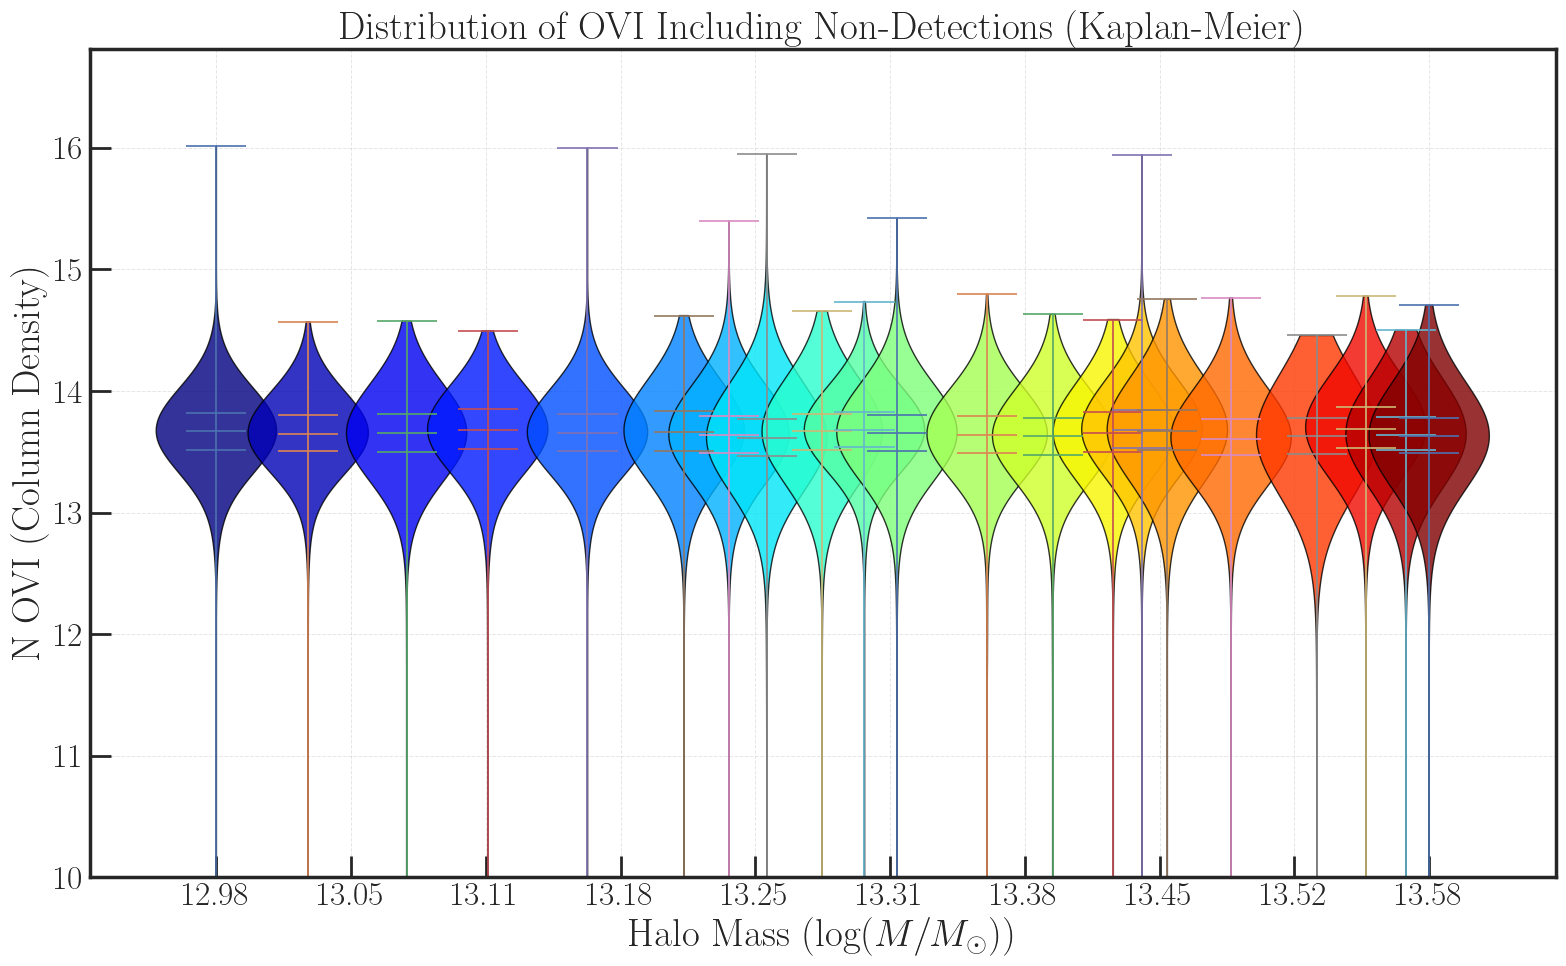

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.cm as cm
from lifelines import KaplanMeierFitter

# Set base directory and paths
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

# Load the group information file
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove whitespace in column names

# Convert necessary columns to numeric and drop any NaN values
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')
grp_info_df.dropna(subset=['Halo_mass', 'Grp_ID'], inplace=True)

# Initialize a list to collect data from all groups
data_list = []

# Process each group folder to read 'Grp_XXX_fitting_results.txt' files
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in group_folders:
    # Extract group ID from the folder name
    group_id = folder.split('_')[-1]
    group_id = float(group_id)  # Ensure group_id matches grp_info_df format

    # Get halo mass for this group
    group_info = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_info.empty:
        print(f"No group info found for Group {group_id}, skipping.")
        continue
    halo_mass = group_info['Halo_mass'].values[0]

    # Construct file path for each group's results file
    file_path = os.path.join(folder, f'Grp_{int(group_id)}_fitting_results.txt')

    # Skip if the file doesn't exist
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue

    # Load data from the results file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()  # Remove whitespace in column names

    # Convert necessary columns to numeric, handling errors by setting non-convertible values to NaN
    numeric_columns = ['Sightline', 'EW(mA)', 'dEW(mA)', 'N', 'dN', 'b', 'db', 'v', 'dv', 'l', 'dl', 'UpLim', 'Sat', 'Chisq']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Separate detections and non-detections
    detections = df[df['dN'].notna()]
    non_detections = df[df['dN'].isna()]

    # If there are detections or non-detections, add to data list with halo mass
    if not detections.empty:
        detections['Halo_mass'] = halo_mass
        detections['Censored'] = 0  # 0 indicates detected (not censored)
        data_list.append(detections[['N', 'Halo_mass', 'Censored']])

    if not non_detections.empty:
        non_detections['N'] = non_detections['UpLim']  # Use upper limit as value for censored data
        non_detections['Halo_mass'] = halo_mass
        non_detections['Censored'] = 1  # 1 indicates censored (non-detection)
        data_list.append(non_detections[['N', 'Halo_mass', 'Censored']])

# Combine data from all groups into a single DataFrame
if data_list:
    combined_data = pd.concat(data_list, ignore_index=True)
else:
    print("No data available for plotting.")
    exit()

# Sort by halo mass and split into 21 bins with equal numbers of groups
combined_data_sorted = combined_data.dropna(subset=['N', 'Censored'])  # Drop any remaining NaN values
combined_data_sorted = combined_data_sorted.sort_values(by="Halo_mass").reset_index(drop=True)
bins = np.array_split(combined_data_sorted, 21)

# Prepare data for plotting
violin_data = []
violin_positions = []
colors = cm.jet(np.linspace(0, 1, len(bins)))  # Generate a color for each bin

for bin_data in bins:
    mean_halo_mass = bin_data["Halo_mass"].mean()  # Position the violin at the mean halo mass
    violin_positions.append(mean_halo_mass)
    
    # Filter out NaN values in 'N' and 'Censored' for Kaplan-Meier fitting
    bin_data_filtered = bin_data.dropna(subset=['N', 'Censored'])
    
    # Kaplan-Meier estimator for handling censored data in each bin
    kmf = KaplanMeierFitter()
    kmf.fit(durations=bin_data_filtered['N'], event_observed=1 - bin_data_filtered['Censored'])
    
    # Generate cumulative density values from KM survival function on the actual scale of N values
    violin_data.append(kmf.survival_function_.index)  # Use original N values for violin plot

# Set Seaborn style and matplotlib settings for publication quality
sns.set(style="ticks", font_scale=1.5, rc={"text.usetex": True})
plt.rc('font', family='serif')
plt.rcParams.update({
    'axes.labelsize': 26,
    'axes.titlesize': 28,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.titlesize': 28,
    'axes.linewidth': 1.5,  # Thicker axis lines
    'grid.linewidth': 1.0,
    'lines.linewidth': 1.2
})

# Plot the violin plot for both detections and non-detections


fig, ax = plt.subplots(figsize=(16, 10))

# Plot each violin at its calculated position with unique colors
for i, (pos, data) in enumerate(zip(violin_positions, violin_data)):
    parts = ax.violinplot(data, positions=[pos], widths=0.06, showmeans=False, showextrema=True, showmedians=True,
                          quantiles=[0.25, 0.75], bw_method=0.7,
                          points=1000,
                            )
    
    # Apply unique color to each violin
    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.8)

# Customize the plot
ax.set_xlabel(r'Halo Mass ($\log(M/M_\odot)$)', fontsize=28, weight='bold')
ax.set_ylabel(r'N OVI (Column Density)', fontsize=28, weight='bold')
ax.set_title(r'Distribution of OVI Including Non-Detections (Kaplan-Meier)', fontsize=28, weight='bold')

# Adjust x-axis ticks based on mean positions of the halo mass bins
selected_ticks = np.linspace(min(violin_positions), max(violin_positions), 10)
ax.set_xticks(selected_ticks)
ax.set_xticklabels([f"{tick:.2f}" for tick in selected_ticks], rotation=0)

# Set y-axis lower limit to 10 for a more aesthetic plot
ax.set_ylim(10, None)

# Add color bar to indicate the progression through halo mass bins
# sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=min(violin_positions), vmax=max(violin_positions)))
# sm.set_array([])
# cbar = fig.colorbar(sm, ax=ax, pad=0.02)
# cbar.set_label(r'Mean Halo Mass in Bin', fontsize=24, weight='bold')
# cbar.ax.tick_params(labelsize=22)

# Add grid and box for a cleaner look
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
ax.tick_params(width=2, length=15, direction='in')

plt.tight_layout()
plt.savefig('violin_plot_km_estimated_all_groups_censored.png', dpi=400)
plt.show()

2327 0
2327 0
2327 0
2327 0
2327 0
2327 0
2326 0
2326 0
2326 0
2326 0
2326 0
2326 0
2326 0
2326 0
2326 0
2326 0
2326 0
2326 0
2326 0
2326 0
2326 0


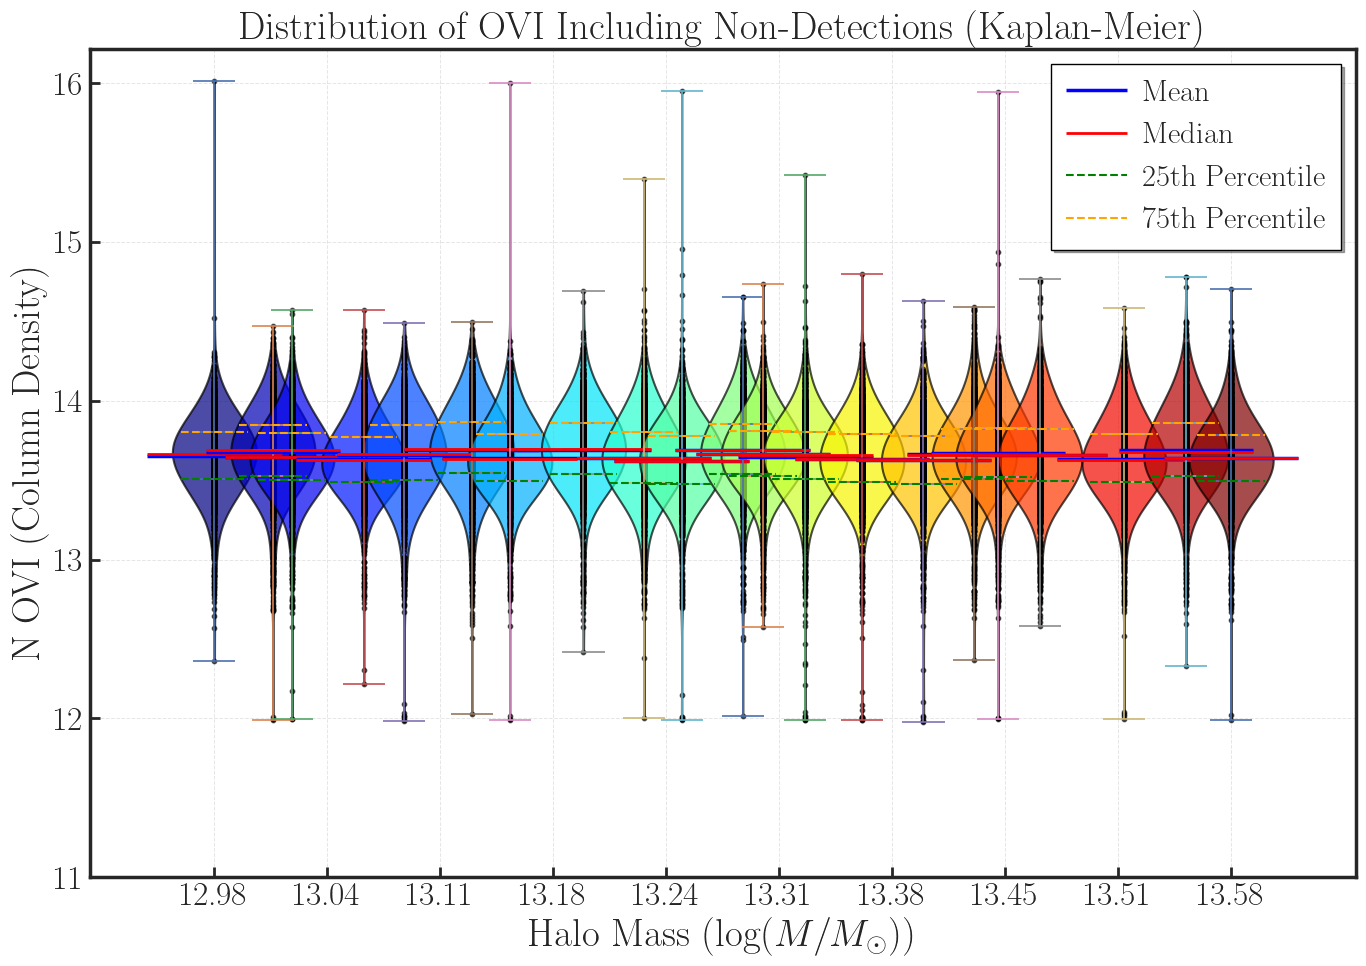

In [187]:
# Assume 'violin_positions', 'violin_data', and 'colors' are already set up

# Set style for publication quality
sns.set(style="ticks", font_scale=1.5, rc={"text.usetex": True})
plt.rc('font', family='serif')
plt.rcParams.update({
    'axes.labelsize': 26,
    'axes.titlesize': 28,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.titlesize': 28,
    'axes.linewidth': 1.5,
    'grid.linewidth': 1.0,
    'lines.linewidth': 1.2
})

fig, ax = plt.subplots(figsize=(14, 10))

# Loop through each bin and create enhanced violin plots
for i, (pos, data) in enumerate(zip(violin_positions, violin_data)):
    # Construct the violin
    parts = ax.violinplot(data, positions=[pos], widths=0.05, showmeans=True, showextrema=True, showmedians=True,
                          quantiles=[0.25, 0.5, 0.75], bw_method=0.5,
                          points=1000,
                          )
    
    # Apply color gradient within the violin to represent density
    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
        pc.set_linewidth(1.5)

    # Add KDE outline over the violin for sharper boundary definition
    #sns.kdeplot(data, ax=ax, color='black', linestyle='--', linewidth=1.5)

    # Overlay individual data points for both detections and non-detections
    detected_points = data[~np.isnan(data)]  # Assuming data has been preprocessed for detections/non-detections
    non_detected_points = data[np.isnan(data)]
    print(len(detected_points), len(non_detected_points))
    ax.scatter(np.full_like(detected_points, pos), detected_points, color='black', s=10, alpha=0.6)
    ax.scatter(np.full_like(non_detected_points, pos), non_detected_points, color='red', s=10, alpha=0.6)

    # Show mean as a separate line for clarity
    ax.hlines(y=np.mean(data), xmin=pos - 0.04, xmax=pos + 0.04, color='blue', linestyle='-', linewidth=2.5, label='Mean' if i == 0 else "")

    # Plot median and quantiles within each violin
    ax.hlines(y=np.median(data), xmin=pos - 0.04, xmax=pos + 0.04, color='red', linestyle='-', linewidth=2, label='Median' if i == 0 else "")
    ax.hlines(y=np.percentile(data, 25), xmin=pos - 0.02, xmax=pos + 0.02, color='green', linestyle='--', linewidth=1.5, label='25th Percentile' if i == 0 else "")
    ax.hlines(y=np.percentile(data, 75), xmin=pos - 0.02, xmax=pos + 0.02, color='orange', linestyle='--', linewidth=1.5, label='75th Percentile' if i == 0 else "")

# Customize axis labels and title
ax.set_xlabel(r'Halo Mass ($\log(M/M_\odot)$)', fontsize=28, weight='bold')
ax.set_ylabel(r'N OVI (Column Density)', fontsize=28, weight='bold')
ax.set_title(r'Distribution of OVI Including Non-Detections (Kaplan-Meier)', fontsize=28, weight='bold')

# Adjust x-axis ticks based on mean positions of the halo mass bins
selected_ticks = np.linspace(min(violin_positions), max(violin_positions), 10)
ax.set_xticks(selected_ticks)
ax.set_xticklabels([f"{tick:.2f}" for tick in selected_ticks], rotation=0)

# Set y-axis lower limit to 10 for a more aesthetic plot
ax.set_ylim(11, None)

# # Add color bar to indicate the progression through halo mass bins
# sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=min(violin_positions), vmax=max(violin_positions)))
# sm.set_array([])
# cbar = fig.colorbar(sm, ax=ax, pad=0.02)
# cbar.set_label(r'Mean Halo Mass in Bin', fontsize=24, weight='bold')
# cbar.ax.tick_params(labelsize=22)

# Add grid and enhanced box around plot
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

# Add legend for mean, median, and quartiles
ax.legend(loc='best', fontsize=22, frameon=True, edgecolor='black',
          fancybox=False, shadow=True, borderpad=0.5, handletextpad=0.5,
          labelspacing=0.5, 
          )
ax.tick_params(width=2, length=7, direction='in')


plt.tight_layout()
plt.savefig('violin_plot_km_estimated_all_groups_censored_enhanced.png', dpi=400)
plt.show()

/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


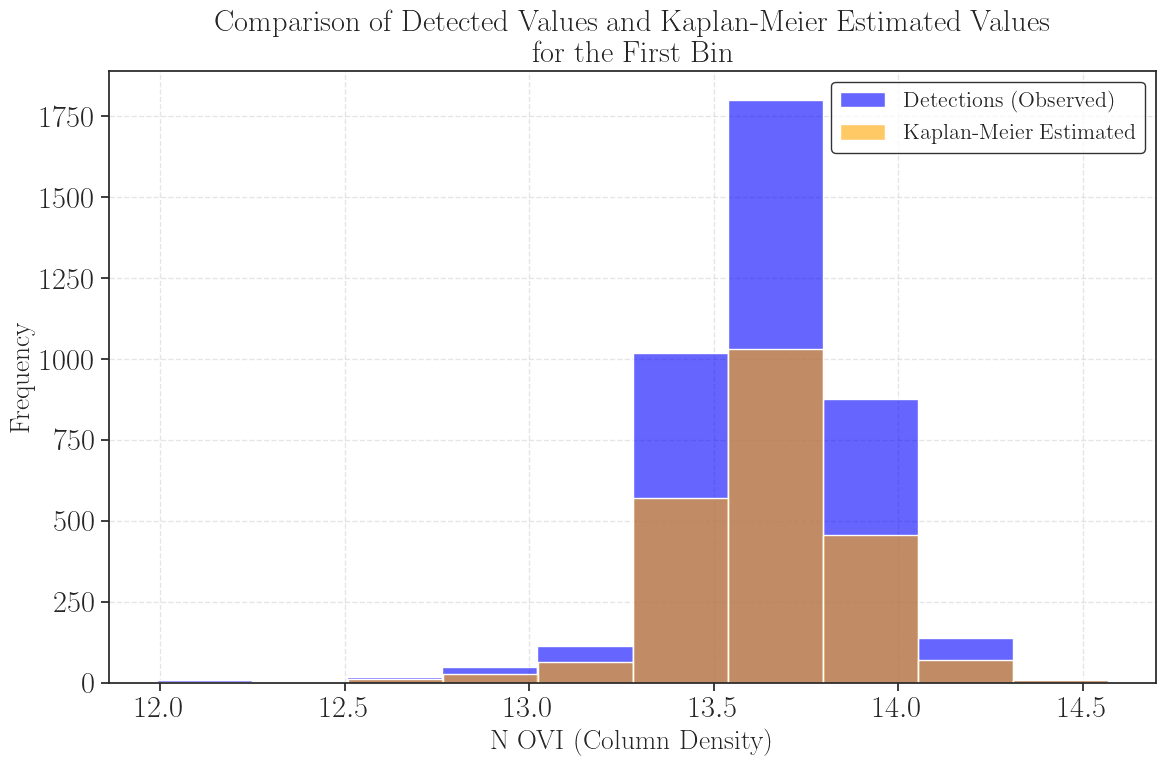

In [172]:

import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

# Extract the first bin's data for detailed comparison
first_bin_data = bins[1]
detections = first_bin_data[first_bin_data['Censored'] == 0]['N']
non_detections = first_bin_data[first_bin_data['Censored'] == 1]['N']

# Kaplan-Meier estimation on the first bin
kmf = KaplanMeierFitter()
kmf.fit(durations=first_bin_data['N'], event_observed=1 - first_bin_data['Censored'])

# Plotting the histogram for detections and the Kaplan-Meier estimated survival function
fig, ax = plt.subplots(figsize=(12, 8))

# Histogram for detected values only
sns.histplot(detections, bins=10, kde=False, color='blue', label='Detections (Observed)', alpha=0.6, ax=ax)

# Overlay the Kaplan-Meier estimated survival function as a histogram
# Create a synthetic dataset using the Kaplan-Meier survival function to plot the estimated distribution
km_values = kmf.survival_function_.index.values
weights = -np.diff(kmf.survival_function_['KM_estimate'].values, prepend=1)
km_estimate = np.repeat(km_values, (weights * len(detections)).astype(int))

# Plot the Kaplan-Meier estimated values as a histogram overlay
sns.histplot(km_estimate, bins=10, kde=False, color='orange', label='Kaplan-Meier Estimated', alpha=0.6, ax=ax)

# Customize the plot
ax.set_xlabel(r'N OVI (Column Density)', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.set_title('Comparison of Detected Values and Kaplan-Meier Estimated Values\nfor the First Bin', fontsize=22)
ax.legend(fontsize=16, frameon=True, edgecolor='black')

# Enhance plot aesthetics
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


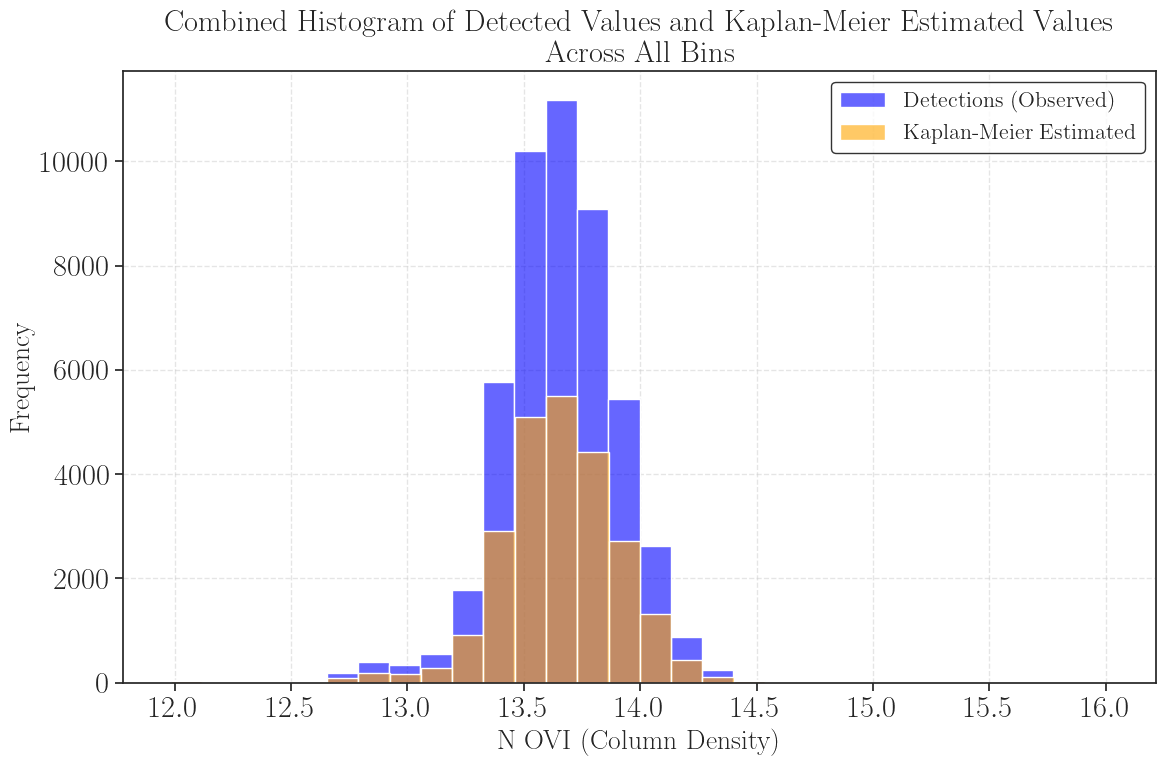

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize lists to store all detected and Kaplan-Meier estimated values across bins
all_detections = []
all_km_estimate = []

# Loop over each bin and collect data for the histogram
for bin_data in bins:
    # Separate detections and non-detections within the current bin
    detections = bin_data[bin_data['Censored'] == 0]['N']
    non_detections = bin_data[bin_data['Censored'] == 1]['N']

    # Append detected values for the histogram
    all_detections.extend(detections)

    # Kaplan-Meier estimation for non-detections in the current bin
    kmf = KaplanMeierFitter()
    kmf.fit(durations=bin_data['N'], event_observed=1 - bin_data['Censored'])

    # Create synthetic data based on the Kaplan-Meier survival function for non-detections
    km_values = kmf.survival_function_.index.values
    weights = -np.diff(kmf.survival_function_['KM_estimate'].values, prepend=1)
    km_estimate = np.repeat(km_values, (weights * len(detections)).astype(int))

    # Append Kaplan-Meier estimated values for the histogram
    all_km_estimate.extend(km_estimate)

# Plot the combined histogram for all detections and Kaplan-Meier estimates
sns.histplot(all_detections, bins=30, kde=False, color='blue', label='Detections (Observed)', alpha=0.6, ax=ax)
sns.histplot(all_km_estimate, bins=30, kde=False, color='orange', label='Kaplan-Meier Estimated', alpha=0.6, ax=ax)

# Customize the plot
ax.set_xlabel(r'N OVI (Column Density)', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.set_title('Combined Histogram of Detected Values and Kaplan-Meier Estimated Values\nAcross All Bins', fontsize=22)
ax.legend(fontsize=16, frameon=True, edgecolor='black')

# Enhance plot aesthetics
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

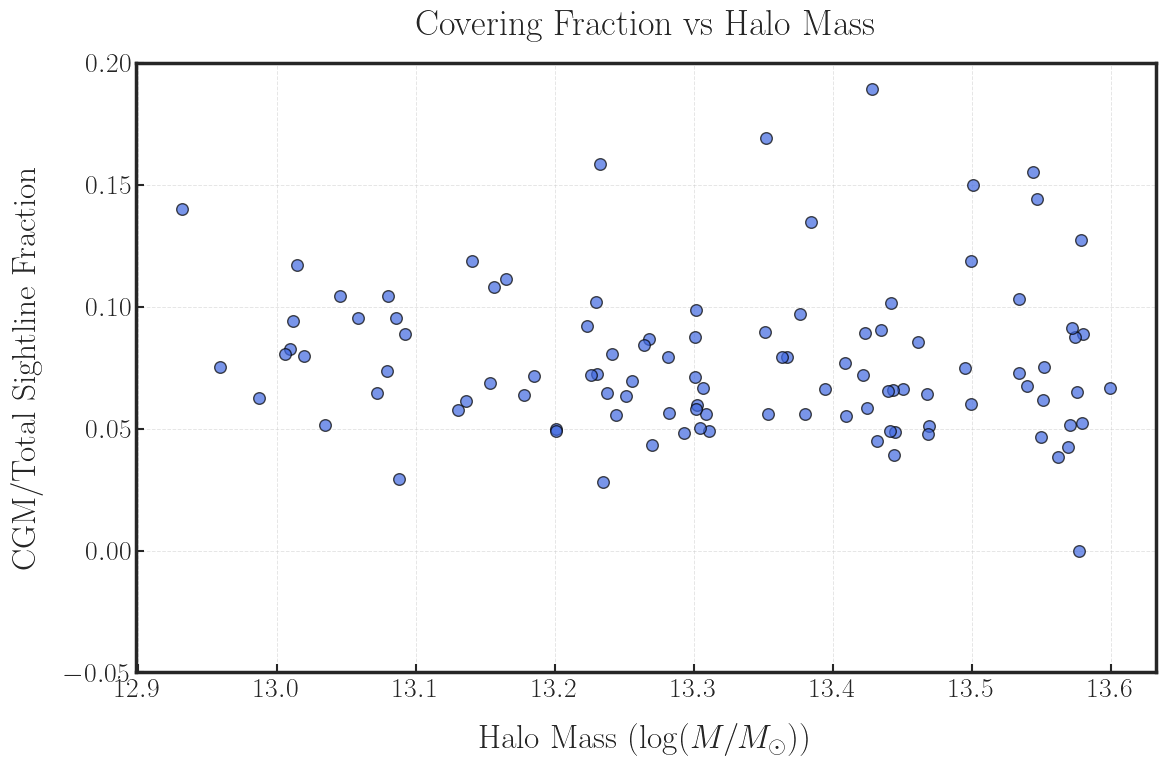

In [181]:
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn and Matplotlib configurations for publication quality
sns.set(style="ticks", font_scale=1.5, rc={"text.usetex": True})
plt.rc('font', family='Times New Roman')
plt.rcParams.update({
    'axes.labelsize': 24,
    'axes.titlesize': 26,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
    'figure.titlesize': 26
})

# Directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines'
galaxy_dir = os.path.join(base_dir, 'Galaxy_cats')
caesar_dir = os.path.join(base_dir, 'Caesar_cats')
plots_dir = os.path.join(base_dir, 'Plots')

# Load group information to get halo mass for each group
grp_info_path = os.path.join(caesar_dir, 'Grp_info.txt')
group_data = Table.read(grp_info_path, format='ascii.fixed_width', delimiter='|')

# Prepare to collect covering fraction data
covering_fraction_data = []

# Iterate over each group to compute covering fraction
for group_row in group_data:
    grp_id = int(group_row['Grp_ID'])
    halo_mass = group_row['Halo_mass']
    
    # Path to the ray_cgm_igrm_info.txt file for this group
    ray_info_path = os.path.join(galaxy_dir, f'Group_{grp_id}', 'ray_cgm_igrm_info.txt')
    
    # Check if the file exists
    if not os.path.exists(ray_info_path):
        print(f"File not found for Group {grp_id}, skipping.")
        continue
    
    # Load the ray information table
    ray_data = Table.read(ray_info_path, format='ascii.fixed_width', delimiter='|')
    
    # Calculate the covering fraction: count sightlines with Num_Gal_CGM > 0
    total_sightlines = len(ray_data)
    cgm_sightline_count = np.sum(ray_data['Num_Gal_CGM'] > 0)
    covering_fraction = cgm_sightline_count / total_sightlines if total_sightlines > 0 else 0
    
    # Append the halo mass and covering fraction for plotting
    covering_fraction_data.append((halo_mass, covering_fraction))

# Create a Table for the covering fraction data
covering_df = Table(rows=covering_fraction_data, names=['Halo_Mass', 'Covering_Fraction'])

# Plot covering fraction vs halo mass with publication-quality enhancements
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with enhanced aesthetics
scatter = ax.scatter(
    covering_df['Halo_Mass'], covering_df['Covering_Fraction'], 
    color='royalblue', edgecolor='black', s=70, marker='o', alpha=0.7, label='Data'
)

# Axis labels and title with LaTeX-style formatting
ax.set_xlabel(r'Halo Mass ($\log(M/M_\odot)$)', fontsize=24, labelpad=15)
ax.set_ylabel(r'CGM/Total Sightline Fraction', fontsize=24, labelpad=15)
ax.set_title(r'Covering Fraction vs Halo Mass', fontsize=26, pad=20)

# Customize ticks
ax.tick_params(axis='both', which='major', length=6, width=1.5, direction='in')
ax.tick_params(axis='both', which='minor', length=4, width=1.0, direction='in')

# Optional: Apply log scale if the halo mass has a large range
#ax.set_xscale('log')

# # Add a smooth KDE overlay for density representation if relevant
# sns.kdeplot(
#     x=covering_df['Halo_Mass'], y=covering_df['Covering_Fraction'],
#     levels=5, color="darkred", linewidths=1.5, ax=ax
# )

# Set y-axis limits for aesthetics
ax.set_ylim(-0.05, 0.20)

# Grid with dashed lines for readability
ax.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.6)

# # Add legend with a border for clarity
# ax.legend(frameon=True, edgecolor='black')

# Ensure plots directory exists
os.makedirs(plots_dir, exist_ok=True)

ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
# Save the plot as a high-resolution image
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'covering_fraction_vs_halo_mass.png'), dpi=400)
plt.show()

### sSFR vs Log(N)

In [193]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
from scipy.spatial import cKDTree
from tqdm import tqdm
# Paths
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines'
galaxy_dir = os.path.join(base_dir, 'Galaxy_cats')
results_dir = os.path.join(base_dir, 'Results')
plots_dir = os.path.join(base_dir, 'Plots')
grp_info_path = os.path.join(base_dir, 'Grp_info.txt')

# Load group information
group_data = Table.read(grp_info_path, format='ascii.fixed_width', delimiter='|')
group_df = group_data.to_pandas()

# Collect data across groups
all_sightlines = []

for index, group_row in tqdm(group_df.iterrows()):
    grp_id = int(group_row['Grp_ID'])
    halo_mass = group_row['Halo_mass']
    
    # Load sightline and galaxy information for each group
    ray_info_path = os.path.join(results_dir, f'Group_{grp_id}', f'Grp_{grp_id}_Ray_info.txt')
    galaxy_info_path = os.path.join(galaxy_dir, f'Group_{grp_id}', 'galaxy_info.txt')
    fitting_results_path = os.path.join(results_dir, f'Group_{grp_id}', f'Grp_{grp_id}_fitting_results.txt')
    
    # Check if required files exist
    if not (os.path.exists(ray_info_path) and os.path.exists(galaxy_info_path) and os.path.exists(fitting_results_path)):
        print(f"Skipping Group {grp_id} due to missing files.")
        continue
    
    # Load sightline and galaxy data
    ray_data = Table.read(ray_info_path, format='ascii.fixed_width', delimiter='|').to_pandas()
    galaxy_data = Table.read(galaxy_info_path, format='ascii.fixed_width', delimiter='|').to_pandas()
    fitting_data = Table.read(fitting_results_path, format='ascii.fixed_width', delimiter='|').to_pandas()

    # Adjust galaxy SFR for log scale and calculate sSFR
    galaxy_data['Galaxy_SFR'] = galaxy_data['Galaxy_SFR'].replace(0, 1e-6)  # Avoid log(0)
    galaxy_data['sSFR'] = galaxy_data['Galaxy_SFR'] / (10 ** galaxy_data['Galaxy_Mass_Stellar'])

    # Use only x, y coordinates for 2D nearest neighbor search
    galaxy_coords = galaxy_data[['Galaxy_Center_X', 'Galaxy_Center_Y']].values
    ray_coords = ray_data[['Start_x', 'Start_y']].values

    # Use KDTree to find the nearest galaxy to each sightline in 2D (x, y)
    tree = cKDTree(galaxy_coords)
    distances, indices = tree.query(ray_coords)
    ray_data['Nearest_Galaxy_sSFR'] = galaxy_data['sSFR'].values[indices]
    
    # Process fitting data for detections and non-detections
    fitting_data['Detection'] = ~fitting_data['dN'].isna()
    ray_data['logN_OVI'] = fitting_data['N']
    ray_data['Detection'] = fitting_data['Detection']
    ray_data['Halo_Mass'] = halo_mass
    ray_data['log_sSFR'] = ray_data['Nearest_Galaxy_sSFR']  # No extra log10 conversion

    # Append to all_sightlines list
    all_sightlines.append(ray_data[['logN_OVI', 'log_sSFR', 'Detection', 'Halo_Mass']])

# Concatenate data across all groups
all_sightlines_df = pd.concat(all_sightlines, ignore_index=True)

# Separate detections and non-detections
detections_df = all_sightlines_df[all_sightlines_df['Detection'] == True]
non_detections_df = all_sightlines_df[all_sightlines_df['Detection'] == False]



0it [00:00, ?it/s]

104it [00:12,  8.06it/s]


/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


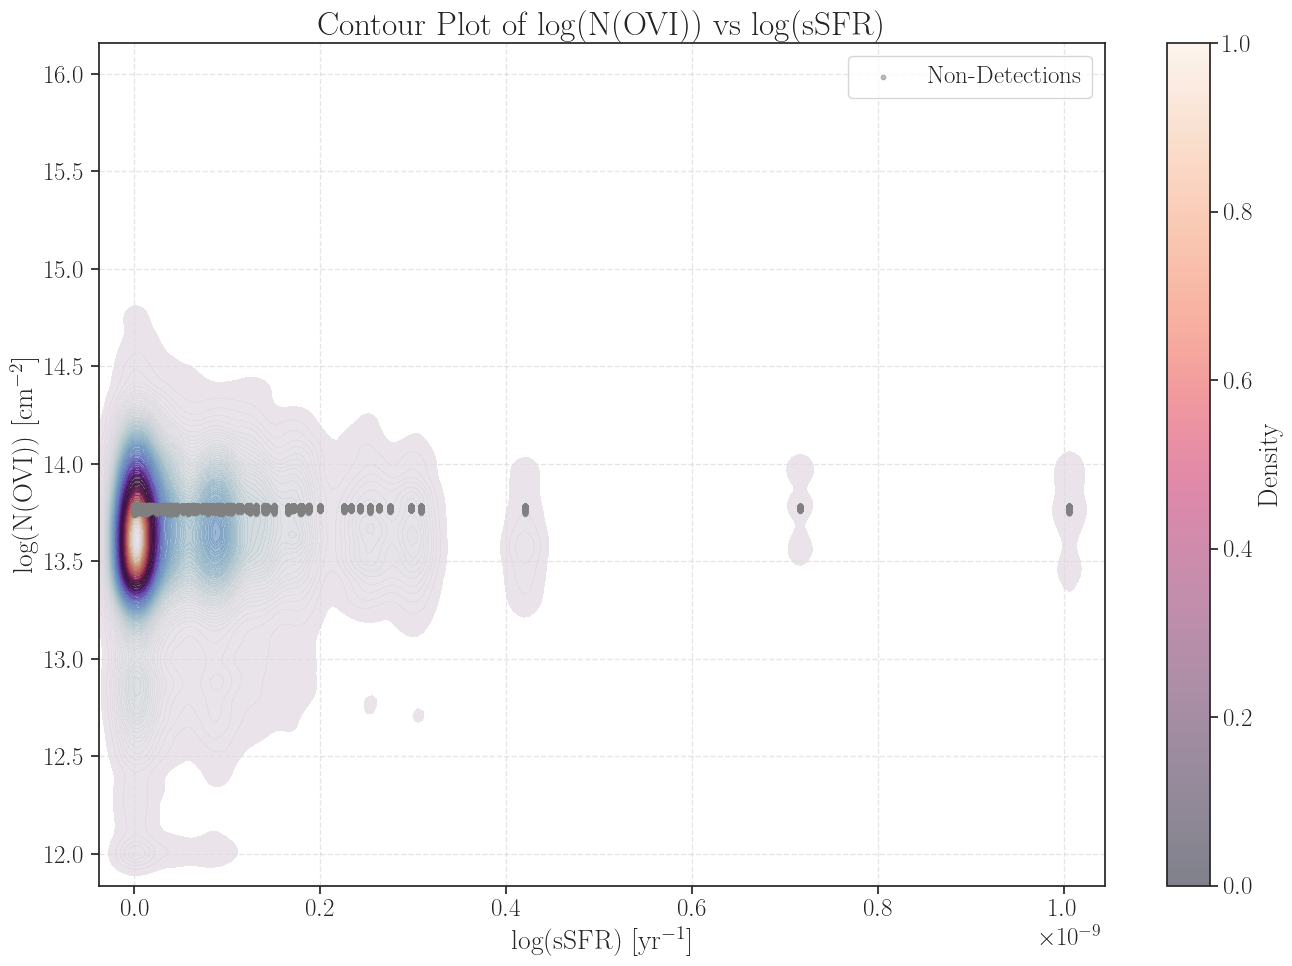

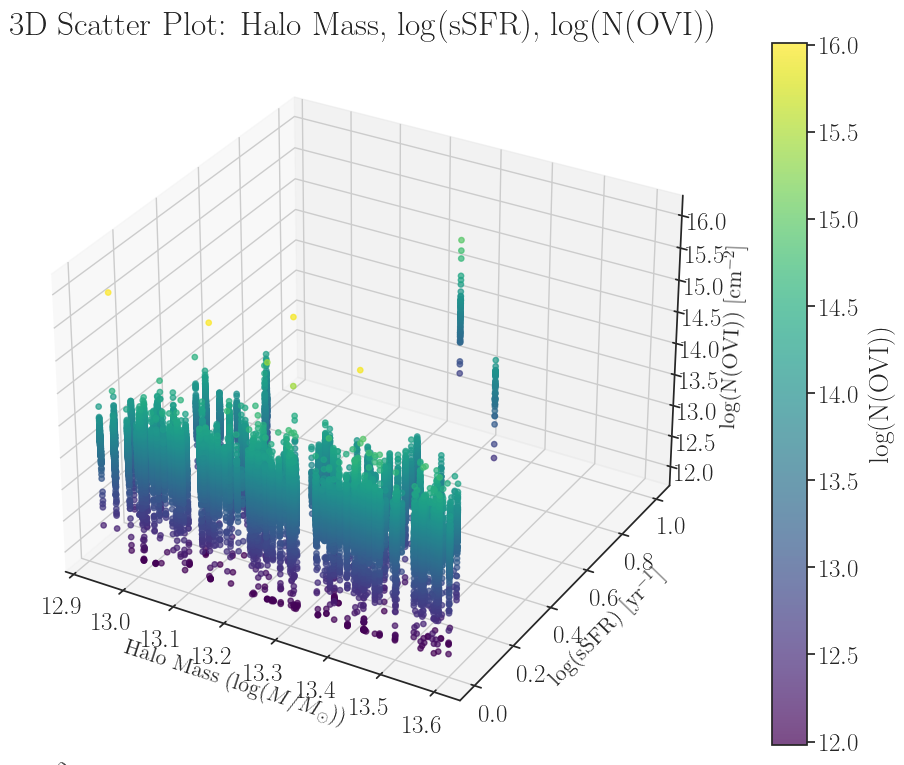

/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


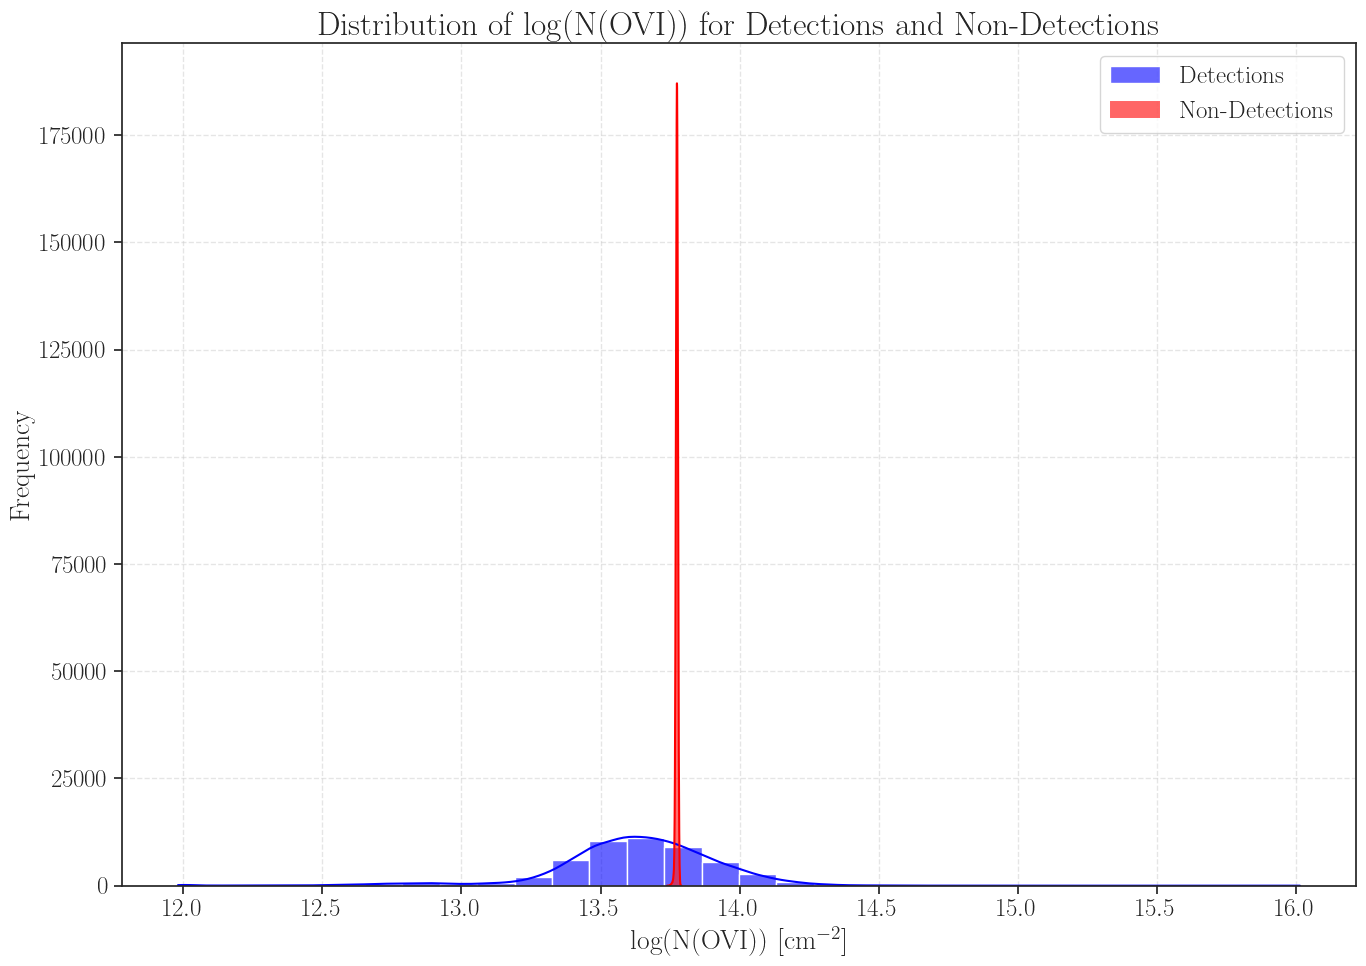

In [194]:
# Plotting configurations
sns.set(style="ticks", font_scale=1.5, rc={"text.usetex": True})
plt.rc('font', family='serif')
plt.rcParams.update({
    'axes.labelsize': 20,
    'axes.titlesize': 24,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'figure.titlesize': 22
})

# 1. Contour plot for logN(OVI) vs log(sSFR) with density
plt.figure(figsize=(14, 10))
sns.kdeplot(
    data=detections_df,
    x="log_sSFR", y="logN_OVI",
    fill=True, cmap="twilight", levels=100, thresh=0.005, alpha=0.7
)
plt.scatter(non_detections_df['log_sSFR'], non_detections_df['logN_OVI'], color='gray', s=10, alpha=0.5, label='Non-Detections')
plt.colorbar(label='Density')
plt.xlabel(r'$\log(\mathrm{sSFR})$ [yr$^{-1}$]')
plt.ylabel(r'$\log(\mathrm{N(OVI)})$ [cm$^{-2}$]')
plt.title(r'Contour Plot of $\log(\mathrm{N(OVI)})$ vs $\log(\mathrm{sSFR})$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'logN_OVI_vs_log_sSFR_contour.png'), dpi=300)
plt.show()

# 2. 3D Plot for Halo Mass, logN(OVI), and log(sSFR)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    detections_df['Halo_Mass'], detections_df['log_sSFR'], detections_df['logN_OVI'],
    c=detections_df['logN_OVI'], cmap='viridis', s=15, alpha=0.7
)
ax.set_xlabel(r'Halo Mass ($\log(M/M_\odot)$)', fontsize=16)
ax.set_ylabel(r'$\log(\mathrm{sSFR})$ [yr$^{-1}$]', fontsize=16)
ax.set_zlabel(r'$\log(\mathrm{N(OVI)})$ [cm$^{-2}$]', fontsize=16)
plt.colorbar(sc, label=r'$\log(\mathrm{N(OVI)})$')
plt.title(r'3D Scatter Plot: Halo Mass, $\log(\mathrm{sSFR})$, $\log(\mathrm{N(OVI)})$')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, '3D_HaloMass_logN_OVI_log_sSFR.png'), dpi=300)
plt.show()

# 3. Density plot with detections and non-detections
plt.figure(figsize=(14, 10))
sns.histplot(detections_df['logN_OVI'], bins=30, color='blue', alpha=0.6, label='Detections', kde=True)
sns.histplot(non_detections_df['logN_OVI'], bins=30, color='red', alpha=0.6, label='Non-Detections', kde=True)
plt.xlabel(r'$\log(\mathrm{N(OVI)})$ [cm$^{-2}$]')
plt.ylabel('Frequency')
plt.title(r'Distribution of $\log(\mathrm{N(OVI)})$ for Detections and Non-Detections')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'N_OVI_Distribution.png'), dpi=300)
plt.show()

#### Left censoring 

/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/3346323518.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/3346323518.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Censored'] = 0  # 0 indicates detected (not censored)
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/3346323518.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

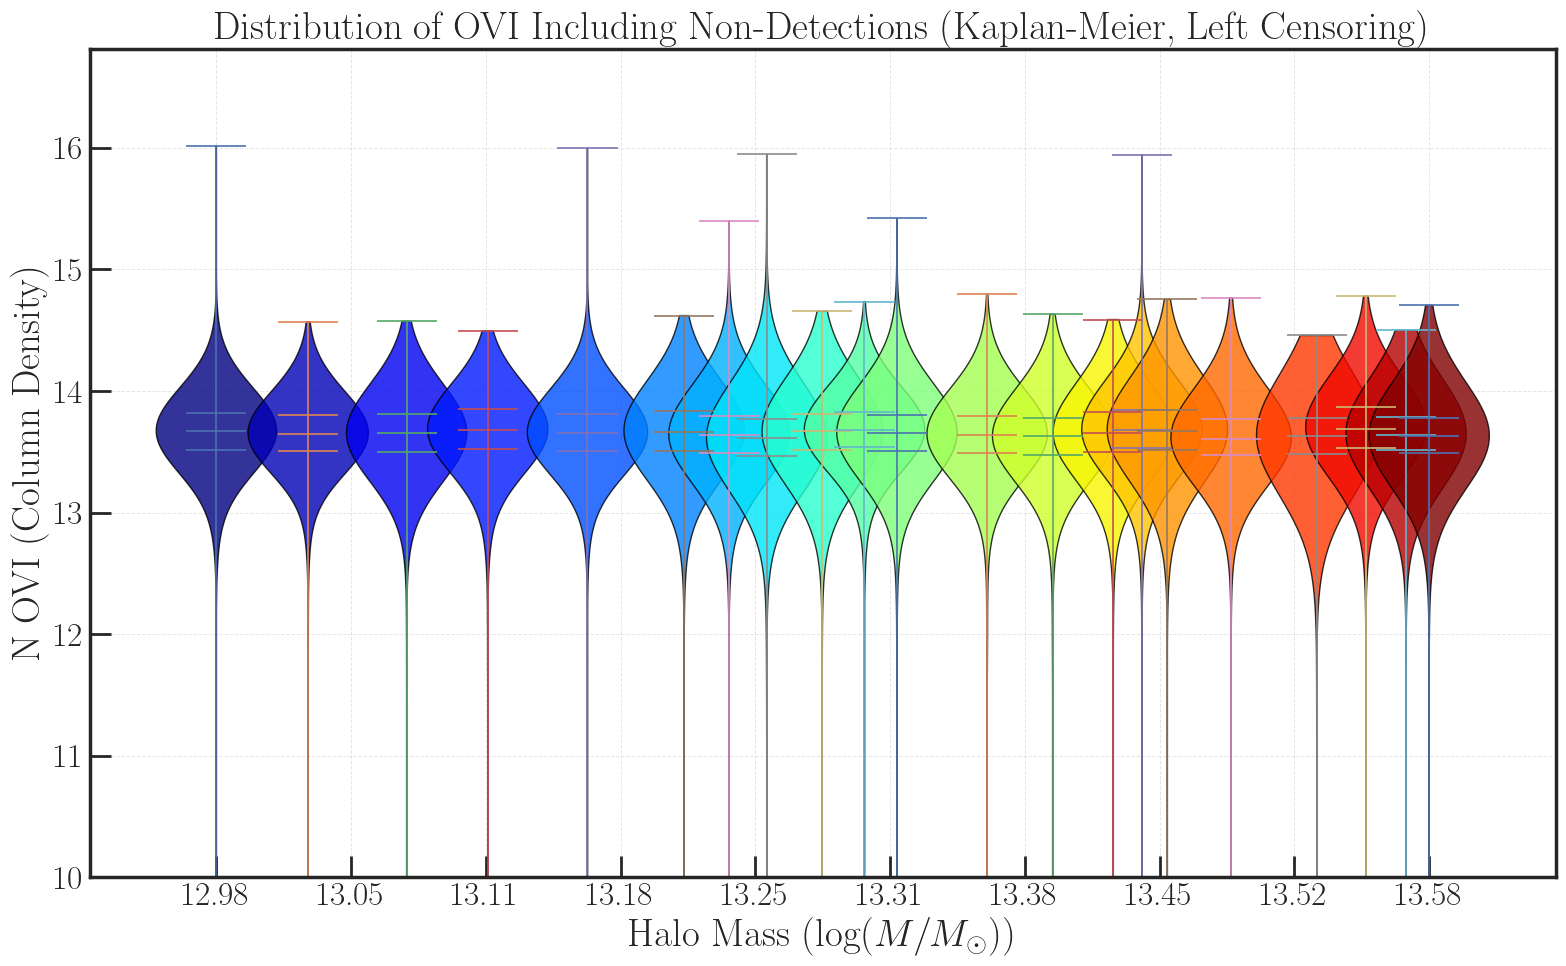

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.cm as cm
from lifelines import KaplanMeierFitter

# Set base directory and paths
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

# Load the group information file
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove whitespace in column names

# Convert necessary columns to numeric and drop NaN values
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')
grp_info_df.dropna(subset=['Halo_mass', 'Grp_ID'], inplace=True)

# Initialize a list to collect data from all groups
data_list = []

# Process each group folder to read 'Grp_XXX_fitting_results.txt' files
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in group_folders:
    group_id = folder.split('_')[-1]
    group_id = float(group_id)  # Ensure group_id matches grp_info_df format

    # Get halo mass for this group
    group_info = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_info.empty:
        continue
    halo_mass = group_info['Halo_mass'].values[0]

    # Construct file path for each group's results file
    file_path = os.path.join(folder, f'Grp_{int(group_id)}_fitting_results.txt')
    if not os.path.exists(file_path):
        continue

    # Load data from the results file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()

    # Convert necessary columns to numeric, handling errors by setting non-convertible values to NaN
    numeric_columns = ['N', 'dN', 'UpLim']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Separate detections and non-detections
    detections = df[df['dN'].notna()]
    non_detections = df[df['dN'].isna()]

    # If there are detections or non-detections, add to data list with halo mass
    if not detections.empty:
        detections['Halo_mass'] = halo_mass
        detections['Censored'] = 0  # 0 indicates detected (not censored)
        data_list.append(detections[['N', 'Halo_mass', 'Censored']])

    if not non_detections.empty:
        non_detections['N'] = non_detections['UpLim']  # Use upper limit as value for censored data
        non_detections['Halo_mass'] = halo_mass
        non_detections['Censored'] = 1  # 1 indicates censored (non-detection)
        data_list.append(non_detections[['N', 'Halo_mass', 'Censored']])

# Combine data from all groups into a single DataFrame
if data_list:
    combined_data = pd.concat(data_list, ignore_index=True)
else:
    print("No data available for plotting.")
    exit()

# Sort by halo mass and split into 21 bins with equal numbers of groups
combined_data_sorted = combined_data.dropna(subset=['N', 'Censored'])
combined_data_sorted = combined_data_sorted.sort_values(by="Halo_mass").reset_index(drop=True)
bins = np.array_split(combined_data_sorted, 21)

# Prepare data for plotting
violin_data = []
violin_positions = []
colors = cm.jet(np.linspace(0, 1, len(bins)))

for bin_data in bins:
    mean_halo_mass = bin_data["Halo_mass"].mean()
    violin_positions.append(mean_halo_mass)
    
    # Filter out NaN values in 'N' and 'Censored' for Kaplan-Meier fitting
    bin_data_filtered = bin_data.dropna(subset=['N', 'Censored'])
    
    # Kaplan-Meier estimator for handling left-censored data in each bin
    kmf = KaplanMeierFitter()
    kmf.fit_left_censoring(durations=bin_data_filtered['N'], event_observed=1 - bin_data_filtered['Censored'])
    
    # Use survival function from Kaplan-Meier to get censored-adjusted distribution
    violin_data.append(kmf.survival_function_.index)

# Set Seaborn style and matplotlib settings for publication quality
sns.set(style="ticks", font_scale=1.5, rc={"text.usetex": True})
plt.rc('font', family='serif')
plt.rcParams.update({
    'axes.labelsize': 26,
    'axes.titlesize': 28,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.titlesize': 28,
    'axes.linewidth': 1.5,
    'grid.linewidth': 1.0,
    'lines.linewidth': 1.2
})

# Plotting the violin plot
fig, ax = plt.subplots(figsize=(16, 10))

for i, (pos, data) in enumerate(zip(violin_positions, violin_data)):
    parts = ax.violinplot(data, positions=[pos], widths=0.06, showmeans=False, showextrema=True, showmedians=True,
                          quantiles=[0.25, 0.75], bw_method=0.7, points=1000)
    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.8)

# Customize the plot
ax.set_xlabel(r'Halo Mass ($\log(M/M_\odot)$)', fontsize=28, weight='bold')
ax.set_ylabel(r'N OVI (Column Density)', fontsize=28, weight='bold')
ax.set_title(r'Distribution of OVI Including Non-Detections (Kaplan-Meier, Left Censoring)', fontsize=28, weight='bold')

# Adjust x-axis ticks based on mean positions of the halo mass bins
selected_ticks = np.linspace(min(violin_positions), max(violin_positions), 10)
ax.set_xticks(selected_ticks)
ax.set_xticklabels([f"{tick:.2f}" for tick in selected_ticks], rotation=0)

ax.set_ylim(10, None)
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
ax.tick_params(width=2, length=15, direction='in')

plt.tight_layout()
#plt.savefig('violin_plot_km_estimated_all_groups_censored_left.png', dpi=400)
plt.show()

/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/226897819.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Halo_mass'] = halo_mass
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/226897819.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detections['Censored'] = 0  # 0 indicates detected (not censored)
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_11746/226897819.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

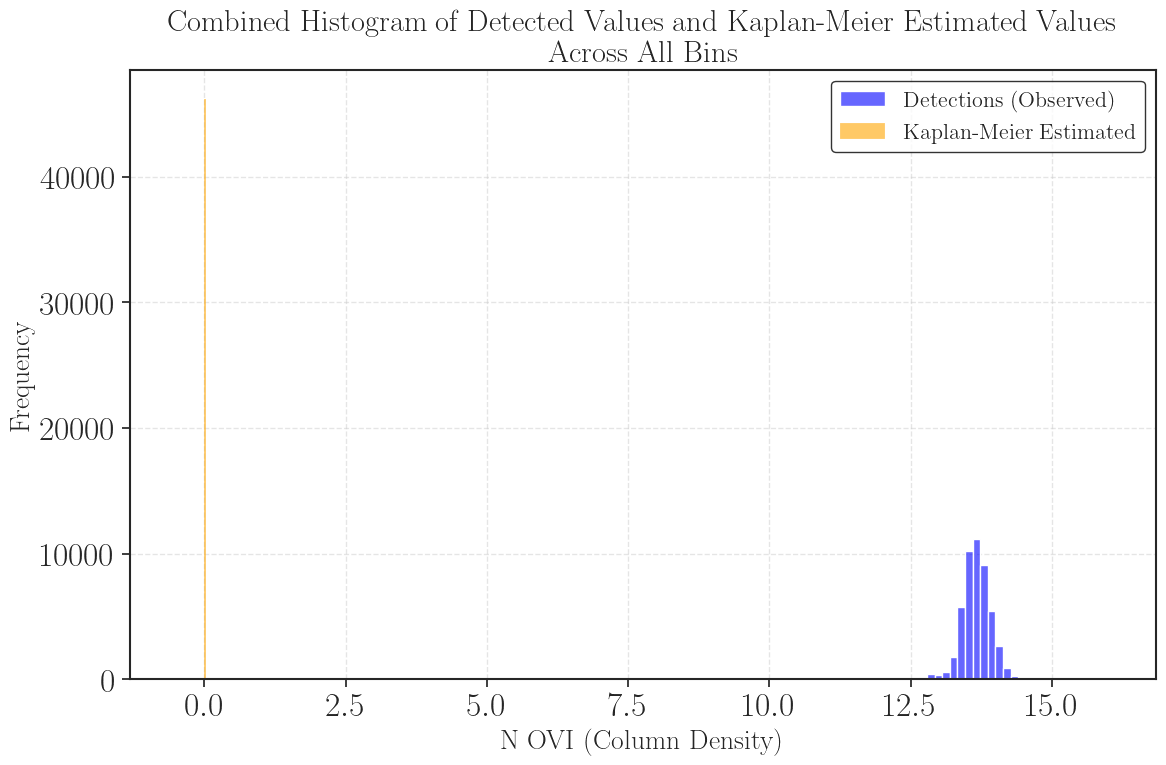

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from lifelines import KaplanMeierFitter
import matplotlib.cm as cm

# Set base directory and paths
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_updated'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

# Load the group information file
grp_info_df = pd.read_csv(grp_info_path, sep='|', skipinitialspace=True)
grp_info_df.columns = grp_info_df.columns.str.strip()  # Remove whitespace in column names

# Convert necessary columns to numeric and drop NaN values
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Halo_mass'] = pd.to_numeric(grp_info_df['Halo_mass'], errors='coerce')
grp_info_df.dropna(subset=['Halo_mass', 'Grp_ID'], inplace=True)

# Initialize a list to collect data from all groups
data_list = []

# Process each group folder to read 'Grp_XXX_fitting_results.txt' files
group_folders = glob.glob(os.path.join(base_dir, 'Group_*'))
for folder in group_folders:
    group_id = folder.split('_')[-1]
    group_id = float(group_id)  # Ensure group_id matches grp_info_df format

    # Get halo mass for this group
    group_info = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_info.empty:
        continue
    halo_mass = group_info['Halo_mass'].values[0]

    # Construct file path for each group's results file
    file_path = os.path.join(folder, f'Grp_{int(group_id)}_fitting_results.txt')
    if not os.path.exists(file_path):
        continue

    # Load data from the results file
    df = pd.read_csv(file_path, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()

    # Convert necessary columns to numeric, handling errors by setting non-convertible values to NaN
    numeric_columns = ['N', 'dN', 'UpLim']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Separate detections and non-detections
    detections = df[df['dN'].notna()]
    non_detections = df[df['dN'].isna()]

    # If there are detections or non-detections, add to data list with halo mass
    if not detections.empty:
        detections['Halo_mass'] = halo_mass
        detections['Censored'] = 0  # 0 indicates detected (not censored)
        data_list.append(detections[['N', 'Halo_mass', 'Censored']])

    if not non_detections.empty:
        non_detections['N'] = non_detections['UpLim']  # Use upper limit as value for censored data
        non_detections['Halo_mass'] = halo_mass
        non_detections['Censored'] = 1  # 1 indicates censored (non-detection)
        data_list.append(non_detections[['N', 'Halo_mass', 'Censored']])

# Combine data from all groups into a single DataFrame
if data_list:
    combined_data = pd.concat(data_list, ignore_index=True)
else:
    print("No data available for plotting.")
    exit()

# Sort by halo mass and split into 21 bins with equal numbers of groups
combined_data_sorted = combined_data.dropna(subset=['N', 'Censored'])
combined_data_sorted = combined_data_sorted.sort_values(by="Halo_mass").reset_index(drop=True)
bins = np.array_split(combined_data_sorted, 21)

# Set up the plot for combined histogram
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize lists to store all detected and Kaplan-Meier estimated values across bins
all_detections = []
all_km_estimate = []

# Loop over each bin and collect data for the histogram
for bin_data in bins:
    # Separate detections and non-detections within the current bin
    detections = bin_data[bin_data['Censored'] == 0]['N']
    non_detections = bin_data[bin_data['Censored'] == 1]['N']

    # Append detected values for the histogram
    all_detections.extend(detections)

    # Kaplan-Meier estimation for non-detections in the current bin
    kmf = KaplanMeierFitter()
    kmf.fit_left_censoring(durations=bin_data['N'], event_observed=1 - bin_data['Censored'])

    # Create synthetic data based on the Kaplan-Meier survival function for non-detections
    km_values = kmf.survival_function_.index.values
    weights = -np.diff(kmf.survival_function_['KM_estimate'].values, prepend=1)
    km_estimate = np.repeat(km_values, (weights * len(detections)).astype(int))

    # Append Kaplan-Meier estimated values for the histogram
    all_km_estimate.extend(km_estimate)

# Plot the combined histogram for all detections and Kaplan-Meier estimates
sns.histplot(all_detections, bins=30, kde=False, color='blue', label='Detections (Observed)', alpha=0.6, ax=ax)
sns.histplot(all_km_estimate, bins=30, kde=False, color='orange', label='Kaplan-Meier Estimated', alpha=0.6, ax=ax)

# Customize the plot
ax.set_xlabel(r'N OVI (Column Density)', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.set_title('Combined Histogram of Detected Values and Kaplan-Meier Estimated Values\nAcross All Bins', fontsize=22)
ax.legend(fontsize=16, frameon=True, edgecolor='black')

# Enhance plot aesthetics
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

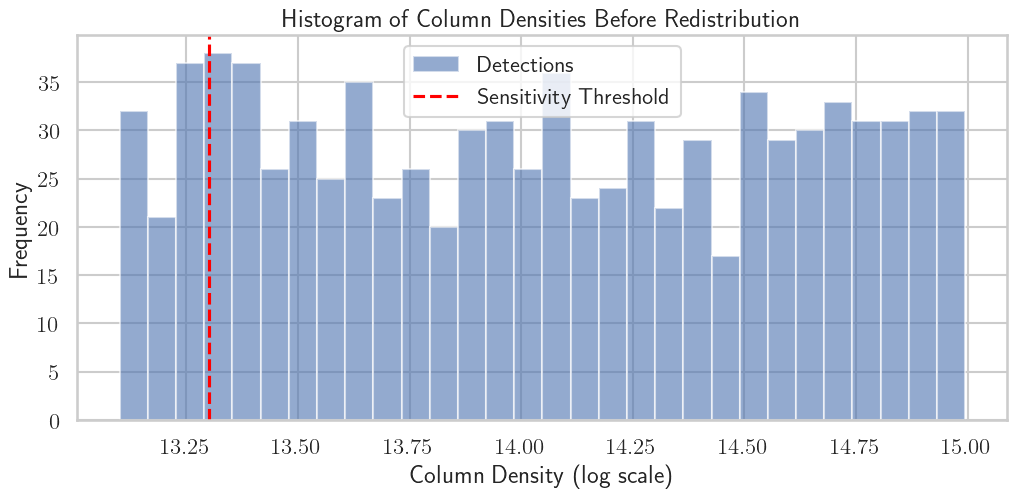

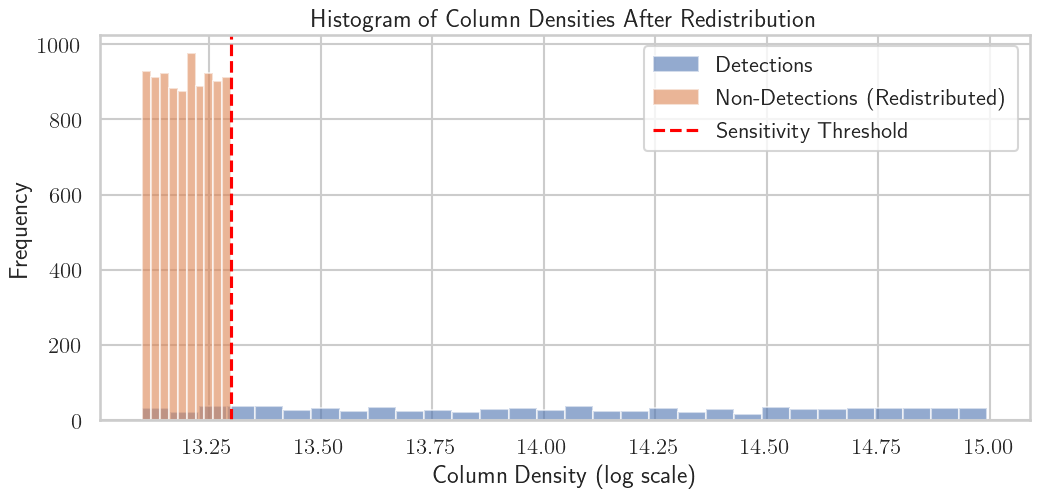

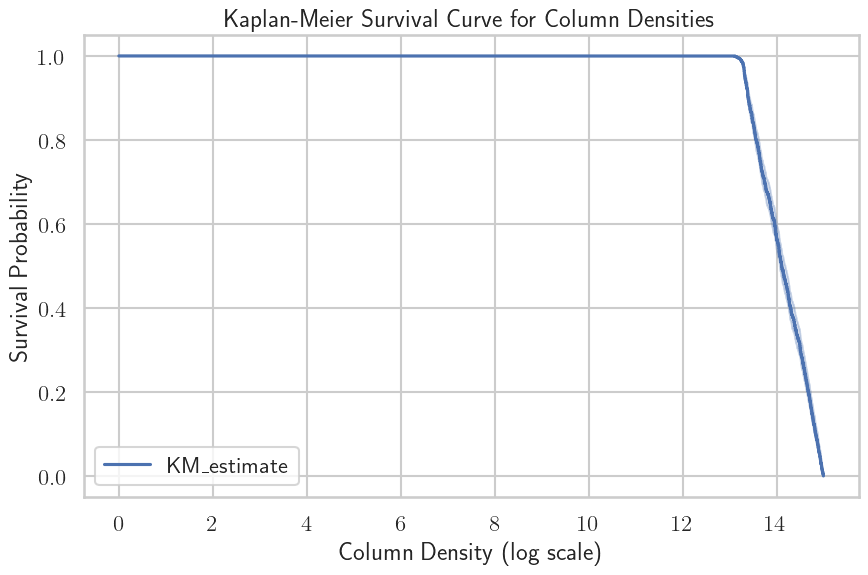

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Parameters for synthetic data
n_sightlines = 10000
detection_rate = 0.08  # 8% detections
sensitivity_threshold = 13.3  # Sensitivity threshold for non-detections

# Generate synthetic column density data in log space
np.random.seed(0)
data = pd.DataFrame({
    'column_density': np.random.uniform(13.1, 15, size=n_sightlines),  # Random values between 13.1 and 15
    'detection': np.where(np.random.rand(n_sightlines) < detection_rate, 1, 0)  # 8% detections
})

# Set non-detections to the sensitivity threshold
data.loc[data['detection'] == 0, 'column_density'] = sensitivity_threshold

# Plot "before" histogram
plt.figure(figsize=(12, 5))
plt.hist(data[data['detection'] == 1]['column_density'], bins=30, alpha=0.6, label="Detections")
#plt.hist(data[data['detection'] == 0]['column_density'], bins=5, alpha=0.6, label="Non-Detections")
plt.axvline(sensitivity_threshold, color='red', linestyle='--', label="Sensitivity Threshold")
plt.title("Histogram of Column Densities Before Redistribution")
plt.xlabel("Column Density (log scale)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Redistribute non-detections slightly below the threshold
non_detection_count = len(data[data['detection'] == 0])
data.loc[data['detection'] == 0, 'column_density'] = sensitivity_threshold + np.random.uniform(-0.2, 0, non_detection_count)

# Plot "after" histogram
plt.figure(figsize=(12, 5))
plt.hist(data[data['detection'] == 1]['column_density'], bins=30, alpha=0.6, label="Detections")
plt.hist(data[data['detection'] == 0]['column_density'], bins=10, alpha=0.6, label="Non-Detections (Redistributed)")
plt.axvline(sensitivity_threshold, color='red', linestyle='--', label="Sensitivity Threshold")
plt.title("Histogram of Column Densities After Redistribution")
plt.xlabel("Column Density (log scale)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Kaplan-Meier fitting on redistributed data
kmf = KaplanMeierFitter()
kmf.fit(durations=data['column_density'], event_observed=data['detection'])

# Plot Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve for Column Densities")
plt.xlabel("Column Density (log scale)")
plt.ylabel("Survival Probability")
plt.show()

Statistics for Detections Only:
Mean: 14.04325008894068
Median: 14.045016758272354
Standard Deviation: 0.5619202176231992
Min: 13.100697953127769
Max: 14.994388053989692


/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/lifelines/fitters/__init__.py:279: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(


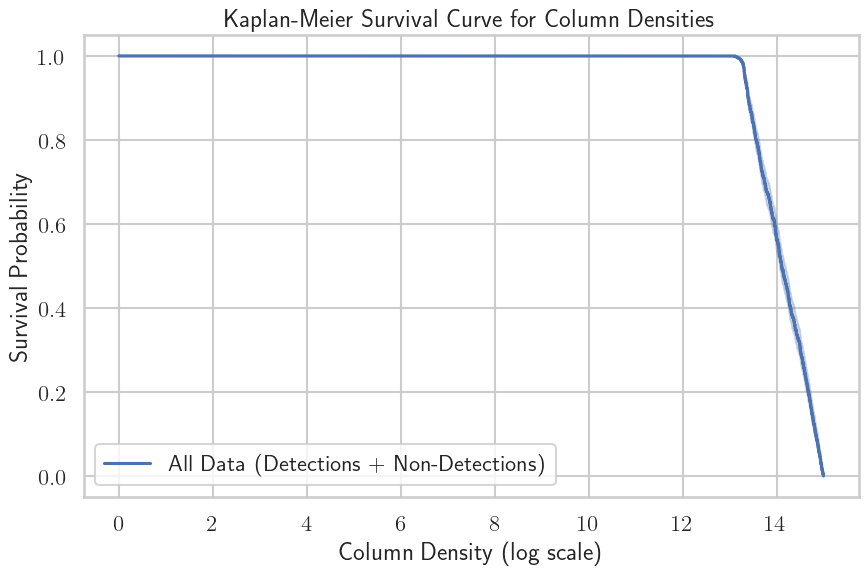


Statistics from Kaplan-Meier Survival Analysis (Detections + Non-Detections):
Mean Column Density (Kaplan-Meier): 14.119306411979403
Median Column Density (Kaplan-Meier): 14.107858437737429


In [256]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Parameters for synthetic data
n_sightlines = 10000
detection_rate = 0.08  # 8% detections
sensitivity_threshold = 13.3  # Sensitivity threshold for non-detections

# Generate synthetic column density data in log space
np.random.seed(0)
data = pd.DataFrame({
    'column_density': np.random.uniform(13.1, 15, size=n_sightlines),  # Random values between 13.1 and 15
    'detection': np.where(np.random.rand(n_sightlines) < detection_rate, 1, 0)  # 8% detections
})

# Set non-detections to the sensitivity threshold
data.loc[data['detection'] == 0, 'column_density'] = sensitivity_threshold

# 1. Calculate statistics for detections only
detected_data = data[data['detection'] == 1]
mean_detection = detected_data['column_density'].mean()
median_detection = detected_data['column_density'].median()
std_detection = detected_data['column_density'].std()
min_detection = detected_data['column_density'].min()
max_detection = detected_data['column_density'].max()

print("Statistics for Detections Only:")
print(f"Mean: {mean_detection}")
print(f"Median: {median_detection}")
print(f"Standard Deviation: {std_detection}")
print(f"Min: {min_detection}")
print(f"Max: {max_detection}")

# Redistribute non-detections slightly below the threshold for survival analysis
non_detection_count = len(data[data['detection'] == 0])
data.loc[data['detection'] == 0, 'column_density'] = sensitivity_threshold + np.random.uniform(-0.2, 0, non_detection_count)

# 2. Kaplan-Meier fitting on redistributed data (including non-detections)
kmf = KaplanMeierFitter()
kmf.fit(durations=data['column_density'], event_observed=data['detection'], label="All Data (Detections + Non-Detections)")

# Calculate the mean column density by integrating the area under the Kaplan-Meier survival curve
# Convert time_diffs to numpy array for element-wise multiplication
time_diffs = np.array(kmf.survival_function_.index[1:] - kmf.survival_function_.index[:-1])
survival_probs = (kmf.survival_function_.values[:-1] + kmf.survival_function_.values[1:]) / 2
mean_kmf = (time_diffs * survival_probs.flatten()).sum()

# Median survival time from the survival curve
median_kmf = kmf.percentile(0.5)

# Plot Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve for Column Densities")
plt.xlabel("Column Density (log scale)")
plt.ylabel("Survival Probability")
plt.show()

# 3. Display statistics from survival analysis
print("\nStatistics from Kaplan-Meier Survival Analysis (Detections + Non-Detections):")
print(f"Mean Column Density (Kaplan-Meier): {mean_kmf}")
print(f"Median Column Density (Kaplan-Meier): {median_kmf}")

In [280]:
from lifelines.datasets import load_nh4
df = load_nh4()[['NH4.Orig.mg.per.L', 'NH4.mg.per.L', 'Censored']]
print(df[0:15])

   NH4.Orig.mg.per.L  NH4.mg.per.L  Censored
1             <0.006         0.006      True
2             <0.006         0.006      True
3              0.006         0.006     False
4              0.016         0.016     False
5             <0.006         0.006      True
6              0.015         0.015     False
7              0.023         0.023     False
8              0.034         0.034     False
9              0.022         0.022     False
10             0.007         0.007     False
11             0.021         0.021     False
12             0.012         0.012     False
13            <0.006         0.006      True
14             0.021         0.021     False
15             0.015         0.015     False


In [258]:
T, E = df['NH4.mg.per.L'], ~df['Censored']

kmf = KaplanMeierFitter()
kmf.fit_left_censoring(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 102 total observations, 46 left-censored observations>

          KM_estimate
timeline             
0.000        0.379897
0.006        0.401002
0.007        0.464319
0.008        0.478828
0.009        0.536868


Text(0.5, 0, 'Concentration of NH_4')

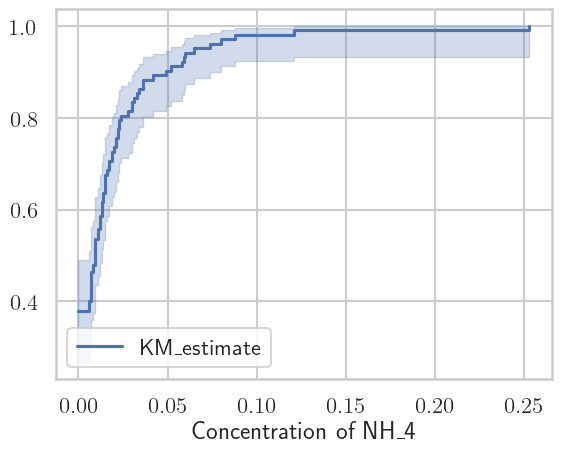

In [259]:
print(kmf.cumulative_density_.head())

kmf.plot_cumulative_density() #will plot the CDF
plt.xlabel("Concentration of NH_4")

<Axes: xlabel='fitted loglogistic quantiles', ylabel='empirical quantiles'>

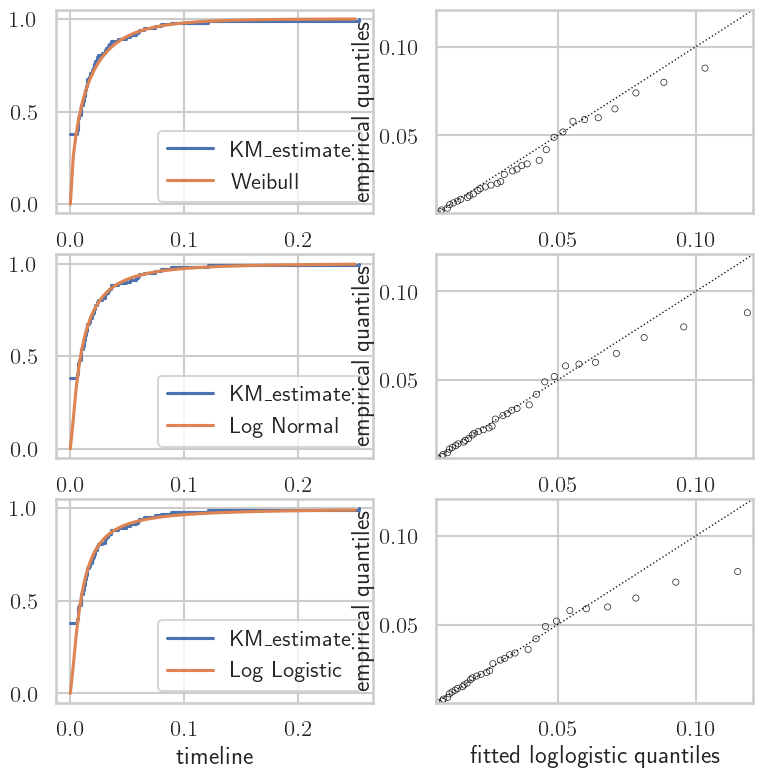

In [260]:
from lifelines import *
from lifelines.plotting import qq_plot

fig, axes = plt.subplots(3, 2, figsize=(9, 9))
timeline = np.linspace(0, 0.25, 100)

wf = WeibullFitter().fit_left_censoring(T, E, label="Weibull", timeline=timeline)
lnf = LogNormalFitter().fit_left_censoring(T, E, label="Log Normal", timeline=timeline)
lgf = LogLogisticFitter().fit_left_censoring(T, E, label="Log Logistic", timeline=timeline)

# plot what we just fit, along with the KMF estimate
kmf.plot_cumulative_density(ax=axes[0][0], ci_show=False)
wf.plot_cumulative_density(ax=axes[0][0], ci_show=False)
qq_plot(wf, ax=axes[0][1])

kmf.plot_cumulative_density(ax=axes[1][0], ci_show=False)
lnf.plot_cumulative_density(ax=axes[1][0], ci_show=False)
qq_plot(lnf, ax=axes[1][1])

kmf.plot_cumulative_density(ax=axes[2][0], ci_show=False)
lgf.plot_cumulative_density(ax=axes[2][0], ci_show=False)
qq_plot(lgf, ax=axes[2][1])


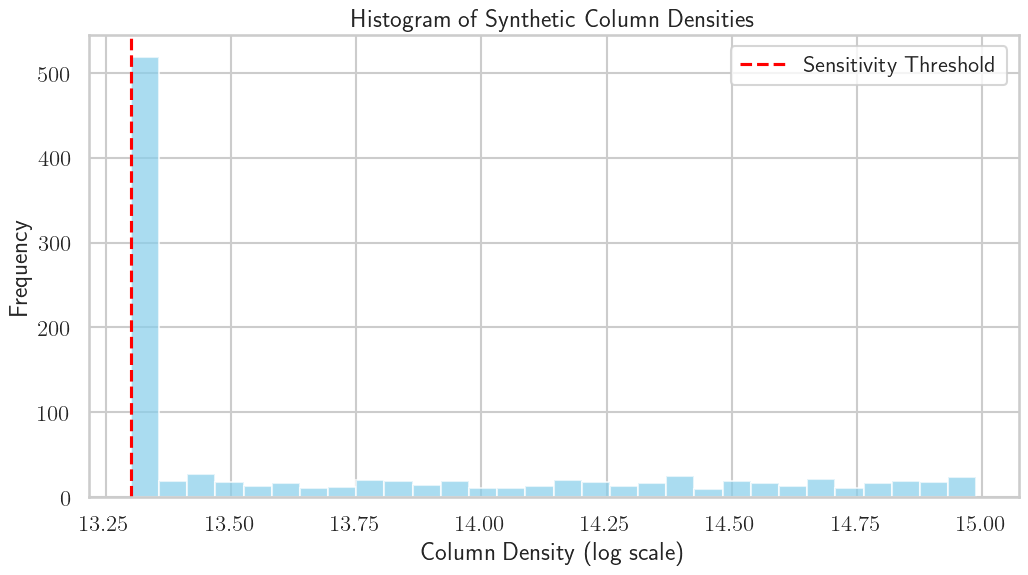

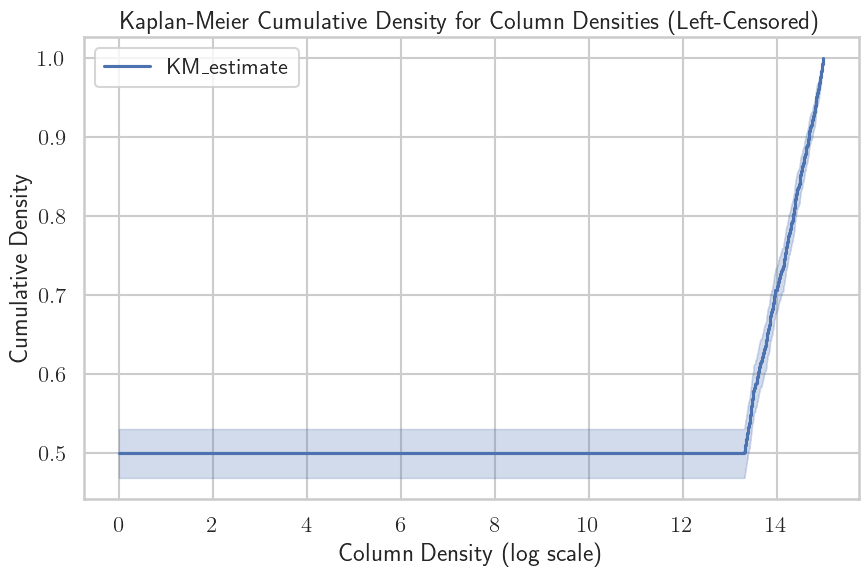

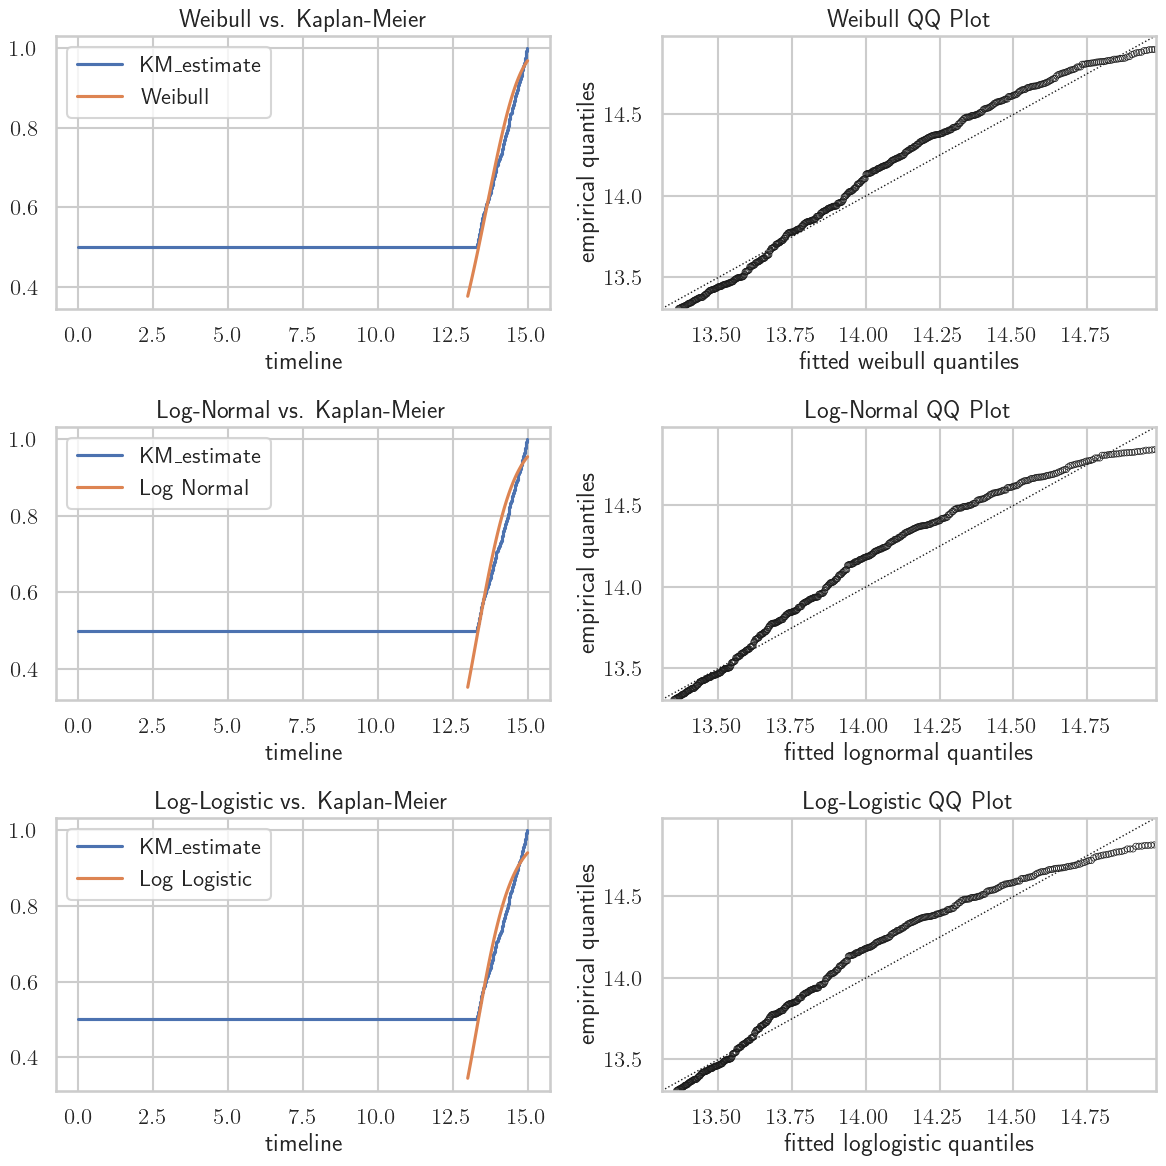

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, WeibullFitter, LogNormalFitter, LogLogisticFitter
from lifelines.plotting import qq_plot

# Generate synthetic data for illustration
n_sightlines = 1000
np.random.seed(42)

# Generate detected column densities and set left-censoring threshold
detections = np.random.uniform(13.3, 15, int(n_sightlines * 0.5))  # Detections in range
non_detections = np.full(int(n_sightlines * 0.5), 13.3)  # Left-censored data at threshold 13.3
column_densities = np.concatenate([detections, non_detections])

# histogram of column densities
plt.figure(figsize=(12, 6))
plt.hist(column_densities, bins=30, color='skyblue', alpha=0.7)
plt.axvline(13.3, color='red', linestyle='--', label="Sensitivity Threshold")
plt.title("Histogram of Synthetic Column Densities")
plt.xlabel("Column Density (log scale)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Create dataframe
data = pd.DataFrame({
    'column_density': column_densities,
    'censored': np.concatenate([np.zeros_like(detections), np.ones_like(non_detections)])  # 1 = censored, 0 = detection
})

# 1. Fit Kaplan-Meier estimator with left-censoring
T = data['column_density']
E = ~data['censored'].astype(bool)  # Boolean flag (1 for detections, 0 for non-detections)

kmf = KaplanMeierFitter()
kmf.fit_left_censoring(T, E)

# Plot Cumulative Density Function (CDF)
plt.figure(figsize=(10, 6))
kmf.plot_cumulative_density()
plt.title("Kaplan-Meier Cumulative Density for Column Densities (Left-Censored)")
plt.xlabel("Column Density (log scale)")
plt.ylabel("Cumulative Density")
plt.show()

# 2. Fit Parametric Models for Left-Censored Data
# Set a timeline for smoother plotting
timeline = np.linspace(13.0, 15.0, 100)

# Fit Weibull model
wf = WeibullFitter().fit_left_censoring(T, E, timeline=timeline, label="Weibull")

# Fit Log-Normal model
lnf = LogNormalFitter().fit_left_censoring(T, E, timeline=timeline, label="Log Normal")

# Fit Log-Logistic model
lgf = LogLogisticFitter().fit_left_censoring(T, E, timeline=timeline, label="Log Logistic")

# 3. Compare parametric models with Kaplan-Meier estimate and QQ plots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
kmf.plot_cumulative_density(ax=axes[0][0], ci_show=False)
wf.plot_cumulative_density(ax=axes[0][0], ci_show=False)
qq_plot(wf, ax=axes[0][1])

kmf.plot_cumulative_density(ax=axes[1][0], ci_show=False)
lnf.plot_cumulative_density(ax=axes[1][0], ci_show=False)
qq_plot(lnf, ax=axes[1][1])

kmf.plot_cumulative_density(ax=axes[2][0], ci_show=False)
lgf.plot_cumulative_density(ax=axes[2][0], ci_show=False)
qq_plot(lgf, ax=axes[2][1])

axes[0][0].set_title("Weibull vs. Kaplan-Meier")
axes[1][0].set_title("Log-Normal vs. Kaplan-Meier")
axes[2][0].set_title("Log-Logistic vs. Kaplan-Meier")
axes[0][1].set_title("Weibull QQ Plot")
axes[1][1].set_title("Log-Normal QQ Plot")
axes[2][1].set_title("Log-Logistic QQ Plot")
plt.tight_layout()
plt.show()

In [44]:
import glob
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered'
folders = glob.glob('/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered/Group_*')

folder_names = [f.split('/')[-1] for f in folders]

print(folder_names)

group_numbers = [int(f.split('_')[-1]) for f in folder_names]
print(group_numbers)

# file names are of format base_dir/Group_XXX/Grp_XXX_fitting_results.txt
file_paths = [f"{base_dir}/{folder}/Grp_{group}_fitting_results.txt" for folder, group in zip(folder_names, group_numbers)]

print(file_paths)


['Group_223', 'Group_426', 'Group_248', 'Group_241', 'Group_279', 'Group_225', 'Group_480', 'Group_429', 'Group_249', 'Group_615', 'Group_418', 'Group_131', 'Group_109', 'Group_107', 'Group_153', 'Group_530', 'Group_165', 'Group_368', 'Group_106', 'Group_108', 'Group_164', 'Group_351', 'Group_155', 'Group_152', 'Group_199', 'Group_170', 'Group_177', 'Group_373', 'Group_146', 'Group_112', 'Group_115', 'Group_316', 'Group_124', 'Group_178', 'Group_147', 'Group_524', 'Group_185', 'Group_343', 'Group_171', 'Group_541', 'Group_122', 'Group_326', 'Group_114', 'Group_113', 'Group_253', 'Group_296', 'Group_231', 'Group_236', 'Group_451', 'Group_207', 'Group_255', 'Group_299', 'Group_206', 'Group_495', 'Group_230', 'Group_466', 'Group_289', 'Group_229', 'Group_440', 'Group_227', 'Group_288', 'Group_272', 'Group_286', 'Group_281', 'Group_645', 'Group_157', 'Group_168', 'Group_150', 'Group_534', 'Group_354', 'Group_166', 'Group_159', 'Group_161', 'Group_195', 'Group_132', 'Group_160', 'Group_364'

In [39]:
## load the file 
from astropy.table import Table
from matplotlib import pyplot as plt




file_path_grp_177 = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered/Group_177/Grp_177_fitting_results.txt'

# Load the data
data_177 = Table.read(file_path_grp_177, format='ascii.fixed_width', delimiter='|').to_pandas()

data_177.head()


Sightline  Species     EW(mA)  dEW(mA)          N        dN          b  \
0      127.0  OVI1031  41.670142      NaN  13.552462  0.753385  36.527247   
1      812.0  OVI1031  27.830960      NaN  13.408805  0.709333  12.553564   
2      820.0  OVI1031  33.936137      NaN  13.503116  0.559814  13.660139   
3      824.0  OVI1031  67.040328      NaN  13.778586  0.489132  36.850410   
4      825.0  OVI1031  66.042627      NaN  13.785495  0.421776  29.080448   

          db           v         dv            l        dl  UpLim  Sat  \
0   0.999999    0.609678  60.850267  1031.929099  0.209455    0.0  0.0   
1  25.520038 -118.865154  16.191350  1031.517850  0.055733    0.0  0.0   
2  20.455142  -46.654142  13.751497  1031.766410  0.047335    0.0  0.0   
3   1.002507  -10.203954  39.078097  1031.891877  0.134512    0.0  0.0   
4   0.999982  -23.354064  26.763194  1031.846612  0.092123    0.0  0.0   

      Chisq  
0  0.057880  
1  0.050236  
2  0.054432  
3  0.050418  
4  0.045380

(418,)
0        0.609678
1     -118.865154
2      -46.654142
3      -10.203954
4      -23.354064
          ...    
413     60.855902
414     63.294437
415     65.331248
416     65.900614
417     68.429061
Name: v, Length: 418, dtype: float64


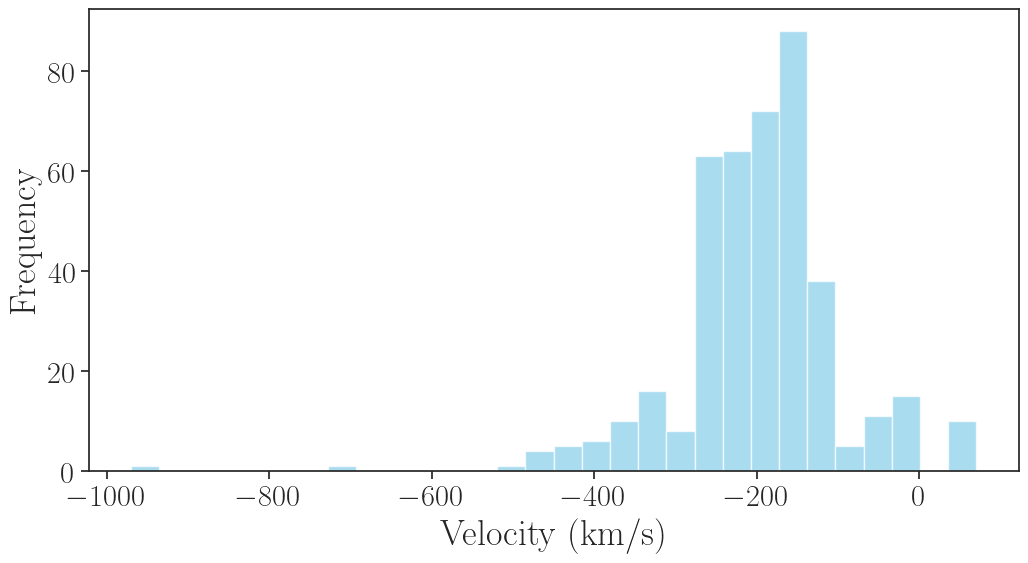

In [42]:
# fetch the velocity values for detections (which is dN is not nan)
velocities= data_177['v']
# remove the 0 values from the data
velocities = velocities[velocities != 0]
velocities.sort_values(ascending=True)
print(velocities.shape)

print(velocities)
plt.figure(figsize=(12, 6))
plt.hist(velocities, bins=30, color='skyblue', alpha=0.7)
# plt.title("Histogram of Detected Velocities")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Frequency")
plt.savefig('detected_velocities.png', dpi=300)
plt.show()


In [46]:
# load all the data for all the groups
import pandas as pd
all_data = []
for file_path in file_paths:
    data = Table.read(file_path, format='ascii.fixed_width', delimiter='|').to_pandas()
    all_data.append(data)

# Concatenate all the data
all_data_df = pd.concat(all_data, ignore_index=True)



(45076,)


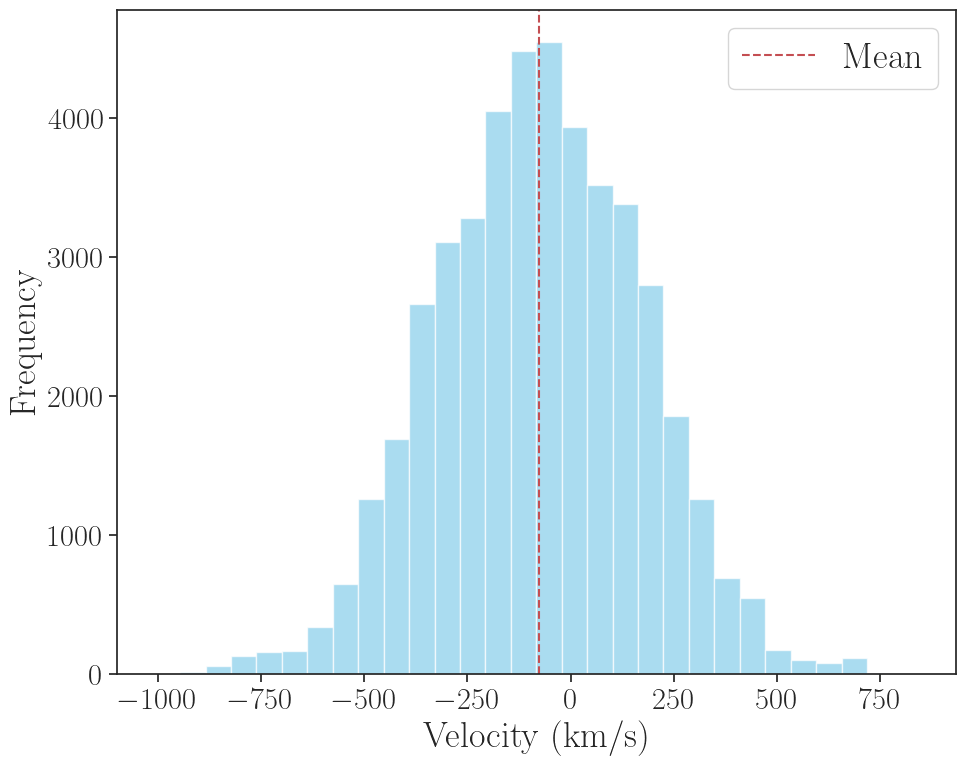

In [55]:
# Fetch the velocity values for detections (where dN is not NaN)
velocities = all_data_df['v'].dropna()  # Remove NaN values if any

# Remove 0 values and infinite values from the data
velocities = velocities[(velocities != 0) & np.isfinite(velocities)]

# Sort values in ascending order
velocities.sort_values(ascending=True, inplace=True)
print(velocities.shape)

# Plot histogram
plt.figure(figsize=(10, 8))
plt.hist(velocities, bins=30, color='skyblue', alpha=0.7)

plt.xlabel("Velocity (km/s)", fontsize=26)
plt.ylabel("Frequency", fontsize=26)

# Fit and plot a Gaussian curve
from scipy.stats import norm

mu, std = norm.fit(velocities)  # Fit Gaussian to finite velocities
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)

# Plot a vertical line at the mean
plt.axvline(mu, color='r', linestyle='--', label='Mean')
plt.legend()

plt.savefig('velocities.png', dpi=300)
plt.tight_layout()
plt.show()

In [41]:
# mean of the velocities
mean_velocity = velocities.mean()
print(mean_velocity)

-76.691959557912


### N(OVI) vs $\rho$

In [59]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
from tqdm import tqdm

# Define base directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered'
ray_info_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
full_sample_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Sample_full.txt'
plotting_data_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Plotting_data_subset.txt'

# Load group information to get center coordinates
grp_info = Table.read(grp_info_path, format='ascii.fixed_width', delimiter='|')
grp_info_df = grp_info.to_pandas()
grp_info_df.columns = grp_info_df.columns.str.strip()

# Convert necessary columns to numeric
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Pos_x'] = pd.to_numeric(grp_info_df['Pos_x'], errors='coerce')
grp_info_df['Pos_y'] = pd.to_numeric(grp_info_df['Pos_y'], errors='coerce')

# Initialize lists to store impact parameters and column densities
impact_params = []
n_ovi_detections = []

# Loop through each group
group_folders = [folder for folder in os.listdir(base_dir) if folder.startswith('Group_')]

for folder in tqdm(group_folders):
    group_id = int(folder.split('_')[-1])
    
    # Load the center coordinates for this group
    group_center = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_center.empty:
        continue  # Skip if group ID is not found in the center file
    
    center_x, center_y = group_center['Pos_x'].values[0], group_center['Pos_y'].values[0]
    
    # Load the ray information to get sightline coordinates
    ray_info_path = os.path.join(ray_info_dir, f'Group_{group_id}', f'Grp_{group_id}_Ray_info.txt')
    ray_info = Table.read(ray_info_path, format='ascii.fixed_width', delimiter='|')
    ray_info_df = ray_info.to_pandas()
    ray_info_df.columns = ray_info_df.columns.str.strip()

    # Load the fitting results to get N(OVI) and dN values
    fitting_results_path = os.path.join(base_dir, folder, f'Grp_{group_id}_fitting_results.txt')
    fitting_results = Table.read(fitting_results_path, format='ascii.fixed_width', delimiter='|')
    fitting_results_df = fitting_results.to_pandas()
    fitting_results_df.columns = fitting_results_df.columns.str.strip()

    # Convert relevant columns to numeric, coercing errors to NaN
    numeric_columns = ['Sightline', 'N', 'dN']
    for col in numeric_columns:
        if col in fitting_results_df.columns:
            fitting_results_df[col] = pd.to_numeric(fitting_results_df[col], errors='coerce')

    # Filter for detections only (where dN is not NaN)
    detected_data = fitting_results_df[~fitting_results_df['dN'].isna()]

    # For each detected sightline, calculate the impact parameter and store N(OVI) value
    for index, row in detected_data.iterrows():
        sightline_id = int(row['Sightline'])
        n_ovi = row['N']
        
        # Find the corresponding sightline in ray_info to get x, y coordinates
        sightline = ray_info_df[ray_info_df['Sightline'] == sightline_id]
        if sightline.empty:
            continue

        start_x, start_y = sightline['Start_x'].values[0], sightline['Start_y'].values[0]

        # Calculate the impact parameter (rho) in kpccm, then convert to kpc
        rho = np.sqrt((start_x - center_x) ** 2 + (start_y - center_y) ** 2)
        rho_kpc = rho / 1.13780788344  # Convert kpccm to kpc

        # Store results
        impact_params.append(rho_kpc)
        n_ovi_detections.append(n_ovi)

# Convert lists to numpy arrays for plotting
impact_params = np.array(impact_params)
n_ovi_detections = np.array(n_ovi_detections)




100%|██████████| 104/104 [00:20<00:00,  5.16it/s]


/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'rasterized'
  cset = contour_func(


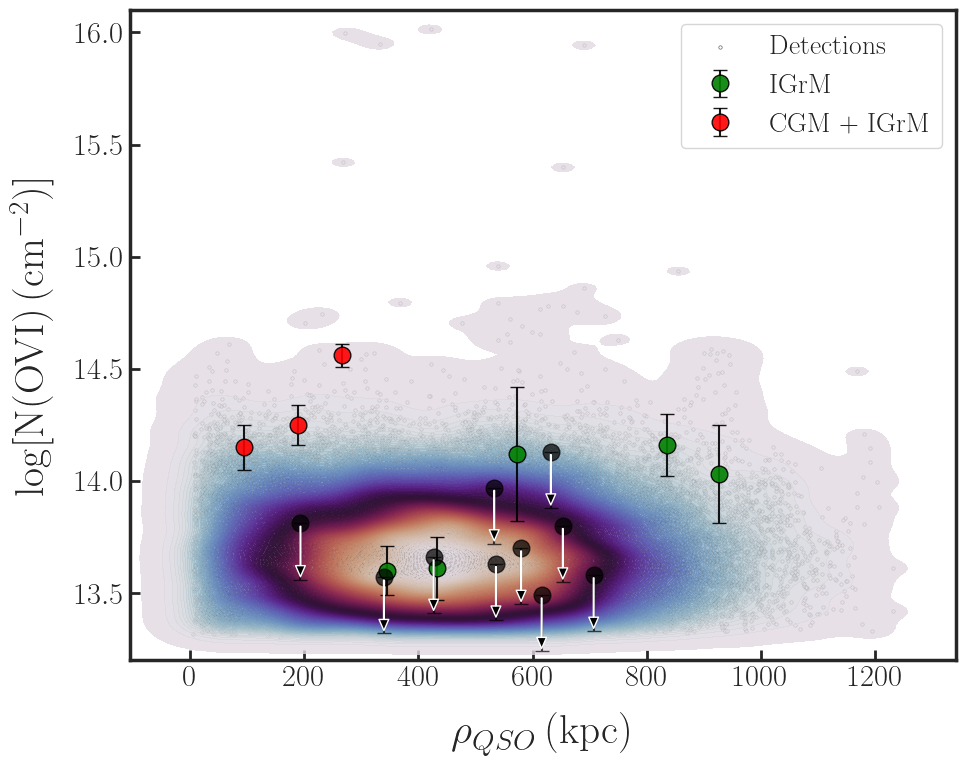

In [62]:
# Plot N(OVI) vs Impact Parameter (rho) for detections with contours
fig, ax = plt.subplots(figsize=(10, 8))


# Overlay density contours using seaborn's kdeplot
# sns.kdeplot(
#      levels=8, 
#     color="blue", fill=True, alpha=0.3, linewidths=1.5
# )

# Scatter plot for simulation data
ax.scatter(impact_params, n_ovi_detections, color='white', s=6, alpha=0.6, edgecolor='black', label='Detections',
           linewidth=0.5, marker='o', zorder=0)


sns.kdeplot(
    x=impact_params, y=n_ovi_detections, fill=True,
    cmap="twilight", levels=170, thresh=0.0005, alpha=0.8, ax=ax, rasterized=True
)
# ax.scatter(combined_data['Halo_mass'], combined_data['N'], color='white', s=6, alpha=0.6, label='Detections', 
#            edgecolor='black', linewidth=0.5, marker='o', zorder=0)
# sns.kdeplot(data=combined_data, x="Halo_mass", y="N", levels=[0.5, 0.68, 0.95], color="black", linewidths=1.5, ax=ax)

# Load observational data
full_sample_df = pd.read_csv(full_sample_path, sep='\s+', comment='#', engine='python')
plotting_data_df = pd.read_csv(plotting_data_path, sep='\s+', comment='#', engine='python')
full_sample_df.columns = full_sample_df.columns.str.strip()
plotting_data_df.columns = plotting_data_df.columns.str.strip()

# Merge data on 'Group' for plotting
if 'Group' in full_sample_df.columns and 'Group' in plotting_data_df.columns:
    merged_df = pd.merge(full_sample_df, plotting_data_df, left_on='Group', right_on='Group')
    merged_df['Impact_Param'] = merged_df['QSO_Rho(kpc)']
    
    # Plot observational data with different subsets
    for subset_type, color, label in [('I', 'green', 'IGrM'), ('C', 'red', 'CGM + IGrM')]:
        subset_df = merged_df[merged_df['Subset'] == subset_type]
        for _, row in subset_df.iterrows():
            if row['N_OVI_err_low'] == 0.25 or row['N_OVI_err_high'] == 0.25:
                # Plot with downward arrow for non-detections
                ax.errorbar(row['Impact_Param'], row['N_OVI'], 
                            yerr=[[row['N_OVI_err_low']], [0]], fmt='o',markersize=12,zorder=2,
                            markerfacecolor='black', markeredgecolor='black', ecolor='black', capsize=5, alpha=0.7,
                            label=label if row.name == subset_df.index[0] else "")
                ax.annotate('', xy=(row['Impact_Param'], row['N_OVI'] - row['N_OVI_err_low']),
                            xytext=(row['Impact_Param'], row['N_OVI']),
                            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=7, headlength=8,
                                            ))
            else:
                # Plot with regular error bars for detections
                ax.errorbar(row['Impact_Param'], row['N_OVI'], 
                            yerr=[[row['N_OVI_err_low']], [row['N_OVI_err_high']]], fmt='o',markersize=12,zorder =1, 
                            markerfacecolor=color, markeredgecolor='black', ecolor='black', capsize=5, alpha=0.9,
                            label=label if row.name == subset_df.index[0] else "")

# Axis labels and title
ax.set_xlabel(r'$\rho_{QSO} \, (\mathrm{kpc})$', fontsize=30, labelpad=15)
ax.set_ylabel(r'$\log[\mathrm{N(OVI)} \, (\mathrm{cm^{-2}})]$', fontsize=30, labelpad=15)
#ax.set_title(r'N(OVI) vs. Impact Parameter ($\rho$)', fontsize=28, pad=15)
ax.legend(loc='best', fontsize=20, frameon=True)

ax.set_ylim(13.2,16.1)
# Customize ticks and spines
ax.tick_params(axis='both', which='major', direction='in', width=2, length=7)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

plt.tight_layout()
plt.savefig('impact_parameter_vs_novi.png', dpi=400)
plt.show() 

100%|██████████| 104/104 [02:33<00:00,  1.47s/it]


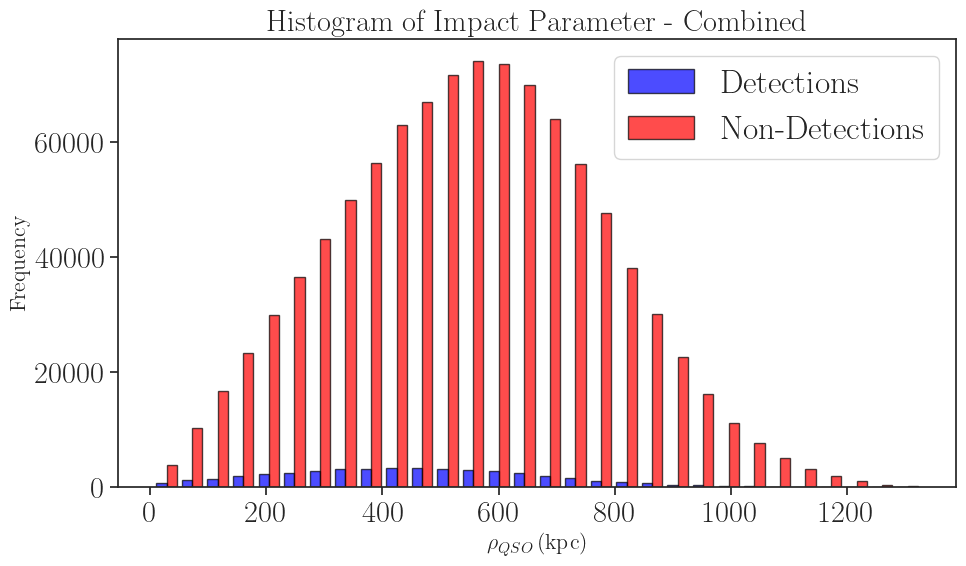

In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from tqdm import tqdm

# Define base directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered'
ray_info_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

# Load group information to get center coordinates
grp_info = Table.read(grp_info_path, format='ascii.fixed_width', delimiter='|')
grp_info_df = grp_info.to_pandas()
grp_info_df.columns = grp_info_df.columns.str.strip()

# Convert necessary columns to numeric
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Pos_x'] = pd.to_numeric(grp_info_df['Pos_x'], errors='coerce')
grp_info_df['Pos_y'] = pd.to_numeric(grp_info_df['Pos_y'], errors='coerce')

# Initialize lists to store impact parameters for detections and non-detections
impact_params_detections = []
impact_params_nondetections = []

# Loop through each group
group_folders = [folder for folder in os.listdir(base_dir) if folder.startswith('Group_')]

for folder in tqdm(group_folders):
    group_id = int(folder.split('_')[-1])
    
    # Load the center coordinates for this group
    group_center = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_center.empty:
        continue  # Skip if group ID is not found in the center file
    
    center_x, center_y = group_center['Pos_x'].values[0], group_center['Pos_y'].values[0]
    
    # Load the ray information to get sightline coordinates
    ray_info_path = os.path.join(ray_info_dir, f'Group_{group_id}', f'Grp_{group_id}_Ray_info.txt')
    ray_info = Table.read(ray_info_path, format='ascii.fixed_width', delimiter='|')
    ray_info_df = ray_info.to_pandas()
    ray_info_df.columns = ray_info_df.columns.str.strip()

    # Load the fitting results to get N(OVI) and dN values
    fitting_results_path = os.path.join(base_dir, folder, f'Grp_{group_id}_fitting_results.txt')
    fitting_results = Table.read(fitting_results_path, format='ascii.fixed_width', delimiter='|')
    fitting_results_df = fitting_results.to_pandas()
    fitting_results_df.columns = fitting_results_df.columns.str.strip()

    # Convert relevant columns to numeric, coercing errors to NaN
    numeric_columns = ['Sightline', 'N', 'dN']
    for col in numeric_columns:
        if col in fitting_results_df.columns:
            fitting_results_df[col] = pd.to_numeric(fitting_results_df[col], errors='coerce')

    # Separate detections and non-detections
    detected_data = fitting_results_df[~fitting_results_df['dN'].isna()]
    nondetected_data = fitting_results_df[fitting_results_df['dN'].isna()]

    # Process detections
    for index, row in detected_data.iterrows():
        sightline_id = int(row['Sightline'])
        n_ovi = row['N']
        
        # Find the corresponding sightline in ray_info to get x, y coordinates
        sightline = ray_info_df[ray_info_df['Sightline'] == sightline_id]
        if sightline.empty:
            continue

        start_x, start_y = sightline['Start_x'].values[0], sightline['Start_y'].values[0]

        # Calculate the impact parameter (rho) in kpccm, then convert to kpc
        rho = np.sqrt((start_x - center_x) ** 2 + (start_y - center_y) ** 2)
        rho_kpc = rho / 1.13780788344  # Convert kpccm to kpc

        # Store results
        impact_params_detections.append(rho_kpc)

    # Process non-detections
    for index, row in nondetected_data.iterrows():
        sightline_id = int(row['Sightline'])
        
        # Find the corresponding sightline in ray_info to get x, y coordinates
        sightline = ray_info_df[ray_info_df['Sightline'] == sightline_id]
        if sightline.empty:
            continue

        start_x, start_y = sightline['Start_x'].values[0], sightline['Start_y'].values[0]

        # Calculate the impact parameter (rho) in kpccm, then convert to kpc
        rho = np.sqrt((start_x - center_x) ** 2 + (start_y - center_y) ** 2)
        rho_kpc = rho / 1.13780788344  # Convert kpccm to kpc

        # Store results
        impact_params_nondetections.append(rho_kpc)

# Convert lists to numpy arrays for plotting
impact_params_detections = np.array(impact_params_detections)
impact_params_nondetections = np.array(impact_params_nondetections)

# Plot histograms
# Combined histogram for both detections and non-detections
plt.figure(figsize=(10, 6))
plt.hist([impact_params_detections, impact_params_nondetections], bins=30, color=['blue', 'red'], alpha=0.7,
         edgecolor='black', label=['Detections', 'Non-Detections'])
plt.xlabel(r'$\rho_{QSO} \, (\mathrm{kpc})$', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Impact Parameter - Combined')
plt.legend()
plt.tight_layout()
plt.show()

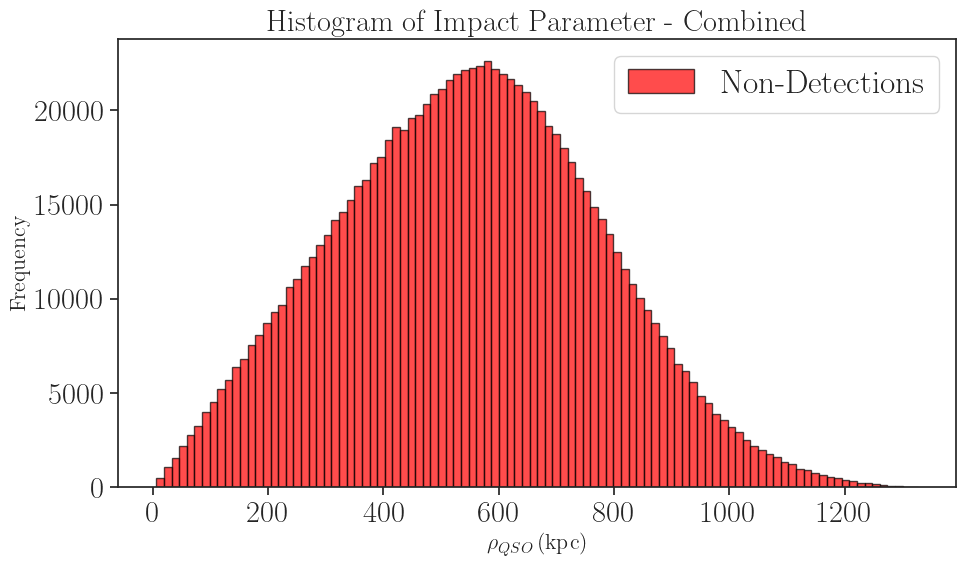

In [68]:
plt.figure(figsize=(10, 6))
# plt.hist([impact_params_detections, impact_params_nondetections], bins=30, color=['blue', 'red'], alpha=0.7,
#          edgecolor='black', label=['Detections', 'Non-Detections'])
#plt.hist(impact_params_detections, bins=100, color='blue', alpha=0.7, edgecolor='black', label='Detections')
plt.hist(impact_params_nondetections, bins=100, color='red', alpha=0.7, edgecolor='black', label='Non-Detections')
plt.xlabel(r'$\rho_{QSO} \, (\mathrm{kpc})$', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Impact Parameter - Combined')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
from tqdm import tqdm

# Define base directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered'
ray_info_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
full_sample_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Sample_full.txt'
plotting_data_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Plotting_data_subset.txt'

# Load group information to get center coordinates and virial radius
grp_info = Table.read(grp_info_path, format='ascii.fixed_width', delimiter='|')
grp_info_df = grp_info.to_pandas()
grp_info_df.columns = grp_info_df.columns.str.strip()

# Convert necessary columns to numeric
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Pos_x'] = pd.to_numeric(grp_info_df['Pos_x'], errors='coerce')
grp_info_df['Pos_y'] = pd.to_numeric(grp_info_df['Pos_y'], errors='coerce')
grp_info_df['R_vir'] = pd.to_numeric(grp_info_df['R_vir'], errors='coerce')

# Initialize lists to store normalized impact parameters and column densities
impact_params_norm = []
n_ovi_detections = []

# Loop through each group
group_folders = [folder for folder in os.listdir(base_dir) if folder.startswith('Group_')]

for folder in tqdm(group_folders):
    group_id = int(folder.split('_')[-1])
    
    # Load the center coordinates and virial radius for this group
    group_center = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_center.empty:
        continue  # Skip if group ID is not found in the center file
    
    center_x, center_y = group_center['Pos_x'].values[0], group_center['Pos_y'].values[0]
    r_vir_kpccm = group_center['R_vir'].values[0]

    # Convert R_vir from kpccm to kpc
    r_vir_kpc = r_vir_kpccm / 1.13780788344

    # Load the ray information to get sightline coordinates
    ray_info_path = os.path.join(ray_info_dir, f'Group_{group_id}', f'Grp_{group_id}_Ray_info.txt')
    ray_info = Table.read(ray_info_path, format='ascii.fixed_width', delimiter='|')
    ray_info_df = ray_info.to_pandas()
    ray_info_df.columns = ray_info_df.columns.str.strip()

    # Load the fitting results to get N(OVI) and dN values
    fitting_results_path = os.path.join(base_dir, folder, f'Grp_{group_id}_fitting_results.txt')
    fitting_results = Table.read(fitting_results_path, format='ascii.fixed_width', delimiter='|')
    fitting_results_df = fitting_results.to_pandas()
    fitting_results_df.columns = fitting_results_df.columns.str.strip()

    # Convert relevant columns to numeric, coercing errors to NaN
    numeric_columns = ['Sightline', 'N', 'dN']
    for col in numeric_columns:
        if col in fitting_results_df.columns:
            fitting_results_df[col] = pd.to_numeric(fitting_results_df[col], errors='coerce')

    # Filter for detections only (where dN is not NaN)
    detected_data = fitting_results_df[~fitting_results_df['dN'].isna()]

    # For each detected sightline, calculate the normalized impact parameter and store N(OVI) value
    for index, row in detected_data.iterrows():
        sightline_id = int(row['Sightline'])
        n_ovi = row['N']
        
        # Find the corresponding sightline in ray_info to get x, y coordinates
        sightline = ray_info_df[ray_info_df['Sightline'] == sightline_id]
        if sightline.empty:
            continue

        start_x, start_y = sightline['Start_x'].values[0], sightline['Start_y'].values[0]

        # Calculate the impact parameter (rho) in kpccm, then convert to kpc
        rho = np.sqrt((start_x - center_x) ** 2 + (start_y - center_y) ** 2)
        rho_kpc = rho / 1.13780788344  # Convert kpccm to kpc

        # Normalize impact parameter by virial radius
        rho_r_vir = rho_kpc / r_vir_kpc

        # Store results
        impact_params_norm.append(rho_r_vir)
        n_ovi_detections.append(n_ovi)

# Convert lists to numpy arrays for plotting
impact_params_norm = np.array(impact_params_norm)
n_ovi_detections = np.array(n_ovi_detections)




100%|██████████| 104/104 [00:18<00:00,  5.48it/s]


/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'rasterized'
  cset = contour_func(


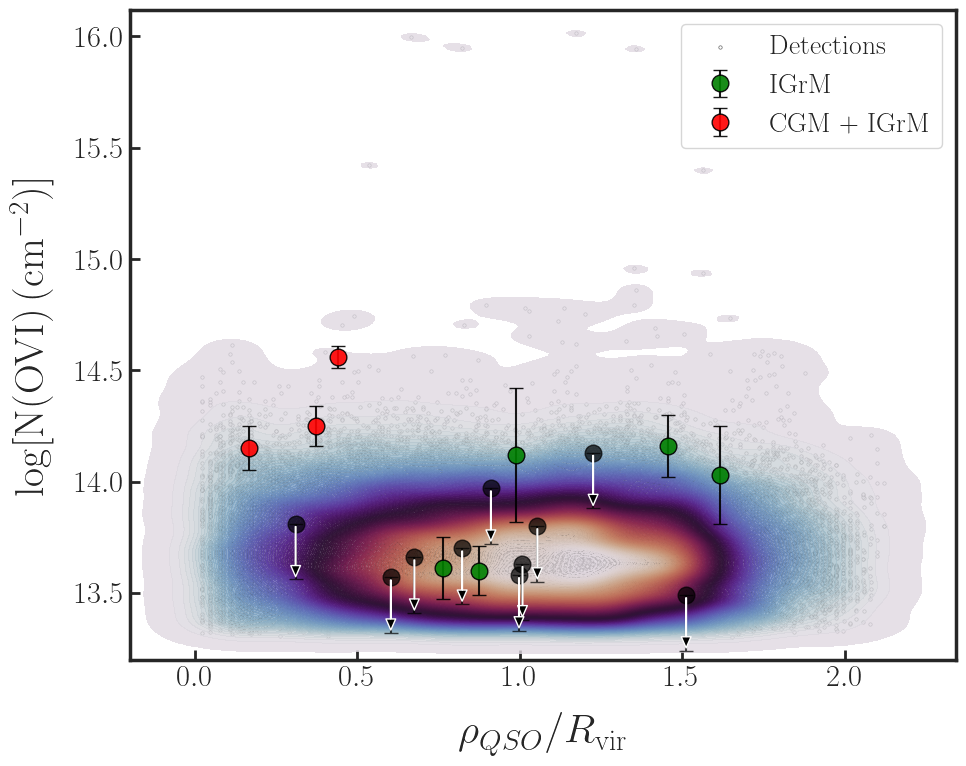

In [32]:
# Plot N(OVI) vs normalized Impact Parameter (rho/R_vir) for detections with contours
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for simulation data
ax.scatter(impact_params_norm, n_ovi_detections, color='white', s=6, alpha=0.6, edgecolor='black', 
           linewidth=0.5, marker='o', zorder=0, label='Detections')

# Overlay density contours using seaborn's kdeplot
sns.kdeplot(
    x=impact_params_norm, y=n_ovi_detections, fill=True,
    cmap="twilight", levels=170, thresh=0.0005, alpha=0.8, ax=ax, rasterized=True
)

# Load observational data
full_sample_df = pd.read_csv(full_sample_path, sep='\s+', comment='#', engine='python')
plotting_data_df = pd.read_csv(plotting_data_path, sep='\s+', comment='#', engine='python')
full_sample_df.columns = full_sample_df.columns.str.strip()
plotting_data_df.columns = plotting_data_df.columns.str.strip()

# Merge data on 'Group' for plotting
if 'Group' in full_sample_df.columns and 'Group' in plotting_data_df.columns:
    merged_df = pd.merge(full_sample_df, plotting_data_df, left_on='Group', right_on='Group')
    merged_df['Impact_Param_Norm'] = merged_df['QSO_Rho(kpc)'] / merged_df['Rvir_s']
    
    # Plot observational data with different subsets
    for subset_type, color, label in [('I', 'green', 'IGrM'), ('C', 'red', 'CGM + IGrM')]:
        subset_df = merged_df[merged_df['Subset'] == subset_type]
        for _, row in subset_df.iterrows():
            if row['N_OVI_err_low'] == 0.25 or row['N_OVI_err_high'] == 0.25:
                # Plot with downward arrow for non-detections
                ax.errorbar(row['Impact_Param_Norm'], row['N_OVI'], 
                            yerr=[[row['N_OVI_err_low']], [0]], fmt='o',markersize=12,
                            markerfacecolor='black', markeredgecolor='black', ecolor='black', capsize=5, alpha=0.7,
                            label=label if row.name == subset_df.index[0] else "")
                ax.annotate('', xy=(row['Impact_Param_Norm'], row['N_OVI'] - row['N_OVI_err_low']),
                            xytext=(row['Impact_Param_Norm'], row['N_OVI']),
                            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=7, headlength=8))
            else:
                # Plot with regular error bars for detections
                ax.errorbar(row['Impact_Param_Norm'], row['N_OVI'], 
                            yerr=[[row['N_OVI_err_low']], [row['N_OVI_err_high']]], fmt='o',markersize=12,
                            markerfacecolor=color, markeredgecolor='black', ecolor='black', capsize=5, alpha=0.9,
                            label=label if row.name == subset_df.index[0] else "")

# Axis labels and title
ax.set_xlabel(r'$\rho_{QSO}/R_{\mathrm{vir}}$', fontsize=30, labelpad=15)
ax.set_ylabel(r'$\log[\mathrm{N(OVI)} \, (\mathrm{cm^{-2}})]$', fontsize=30, labelpad=15)
#ax.set_title(r'N(OVI) vs. Normalized Impact Parameter ($\rho/R_{\mathrm{vir}}$)', fontsize=28, pad=15)
ax.legend(loc='best', fontsize=20, frameon=True)

# Customize ticks and spines
ax.tick_params(axis='both', which='major', direction='in', width=2, length=7)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

plt.tight_layout()
plt.savefig('N_OVI_vs_Normalized_Impact_Parameter.png', dpi=400)
plt.show()

In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from tqdm import tqdm

# Define base directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered'
ray_info_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'

# Load group information to get center coordinates and virial radius
grp_info = Table.read(grp_info_path, format='ascii.fixed_width', delimiter='|')
grp_info_df = grp_info.to_pandas()
grp_info_df.columns = grp_info_df.columns.str.strip()

# Convert necessary columns to numeric
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Pos_x'] = pd.to_numeric(grp_info_df['Pos_x'], errors='coerce')
grp_info_df['Pos_y'] = pd.to_numeric(grp_info_df['Pos_y'], errors='coerce')
grp_info_df['R_vir'] = pd.to_numeric(grp_info_df['R_vir'], errors='coerce')

# Initialize lists to store normalized impact parameters for detections and non-detections
impact_params_norm_detections = []
impact_params_norm_nondetections = []

# Loop through each group
group_folders = [folder for folder in os.listdir(base_dir) if folder.startswith('Group_')]

for folder in tqdm(group_folders):
    group_id = int(folder.split('_')[-1])
    
    # Load the center coordinates and virial radius for this group
    group_center = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_center.empty:
        continue  # Skip if group ID is not found in the center file
    
    center_x, center_y = group_center['Pos_x'].values[0], group_center['Pos_y'].values[0]
    r_vir_kpccm = group_center['R_vir'].values[0]
    r_vir_kpc = r_vir_kpccm / 1.13780788344  # Convert R_vir from kpccm to kpc

    # Load the ray information to get sightline coordinates
    ray_info_path = os.path.join(ray_info_dir, f'Group_{group_id}', f'Grp_{group_id}_Ray_info.txt')
    ray_info = Table.read(ray_info_path, format='ascii.fixed_width', delimiter='|')
    ray_info_df = ray_info.to_pandas()
    ray_info_df.columns = ray_info_df.columns.str.strip()

    # Load the fitting results to get N(OVI) and dN values
    fitting_results_path = os.path.join(base_dir, folder, f'Grp_{group_id}_fitting_results.txt')
    fitting_results = Table.read(fitting_results_path, format='ascii.fixed_width', delimiter='|')
    fitting_results_df = fitting_results.to_pandas()
    fitting_results_df.columns = fitting_results_df.columns.str.strip()

    # Convert relevant columns to numeric, coercing errors to NaN
    numeric_columns = ['Sightline', 'N', 'dN']
    for col in numeric_columns:
        if col in fitting_results_df.columns:
            fitting_results_df[col] = pd.to_numeric(fitting_results_df[col], errors='coerce')

    # Separate detections and non-detections
    detected_data = fitting_results_df[~fitting_results_df['dN'].isna()]
    nondetected_data = fitting_results_df[fitting_results_df['dN'].isna()]

    # Process detections
    for index, row in detected_data.iterrows():
        sightline_id = int(row['Sightline'])
        
        # Find the corresponding sightline in ray_info to get x, y coordinates
        sightline = ray_info_df[ray_info_df['Sightline'] == sightline_id]
        if sightline.empty:
            continue

        start_x, start_y = sightline['Start_x'].values[0], sightline['Start_y'].values[0]

        # Calculate the impact parameter (rho) in kpccm, then convert to kpc
        rho = np.sqrt((start_x - center_x) ** 2 + (start_y - center_y) ** 2)
        rho_kpc = rho / 1.13780788344  # Convert kpccm to kpc

        # Normalize impact parameter by virial radius
        rho_r_vir = rho_kpc / r_vir_kpc

        # Store results
        impact_params_norm_detections.append(rho_r_vir)

    # Process non-detections
    for index, row in nondetected_data.iterrows():
        sightline_id = int(row['Sightline'])
        
        # Find the corresponding sightline in ray_info to get x, y coordinates
        sightline = ray_info_df[ray_info_df['Sightline'] == sightline_id]
        if sightline.empty:
            continue

        start_x, start_y = sightline['Start_x'].values[0], sightline['Start_y'].values[0]

        # Calculate the impact parameter (rho) in kpccm, then convert to kpc
        rho = np.sqrt((start_x - center_x) ** 2 + (start_y - center_y) ** 2)
        rho_kpc = rho / 1.13780788344  # Convert kpccm to kpc

        # Normalize impact parameter by virial radius
        rho_r_vir = rho_kpc / r_vir_kpc

        # Store results
        impact_params_norm_nondetections.append(rho_r_vir)

# Convert lists to numpy arrays for plotting
impact_params_norm_detections = np.array(impact_params_norm_detections)
impact_params_norm_nondetections = np.array(impact_params_norm_nondetections)



100%|██████████| 104/104 [02:37<00:00,  1.52s/it]


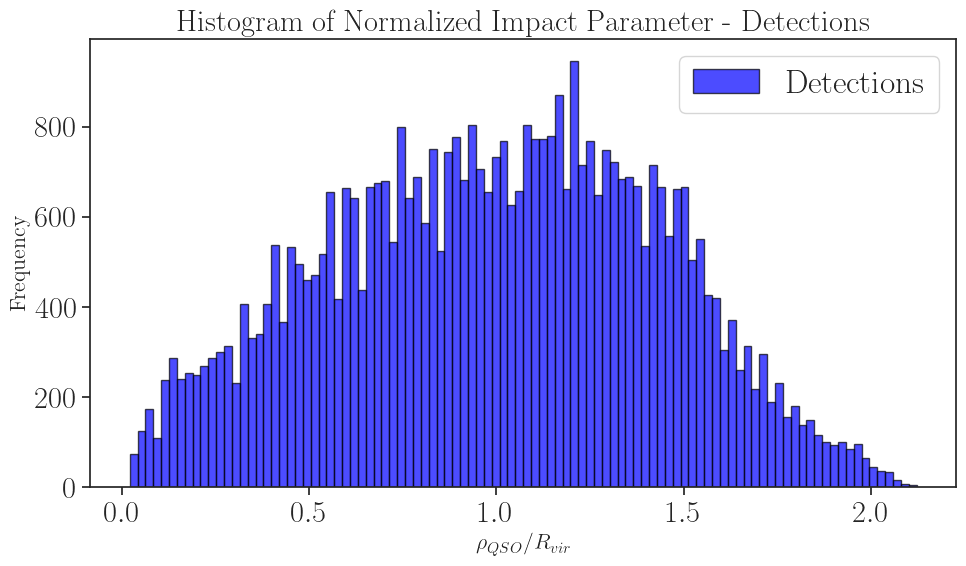

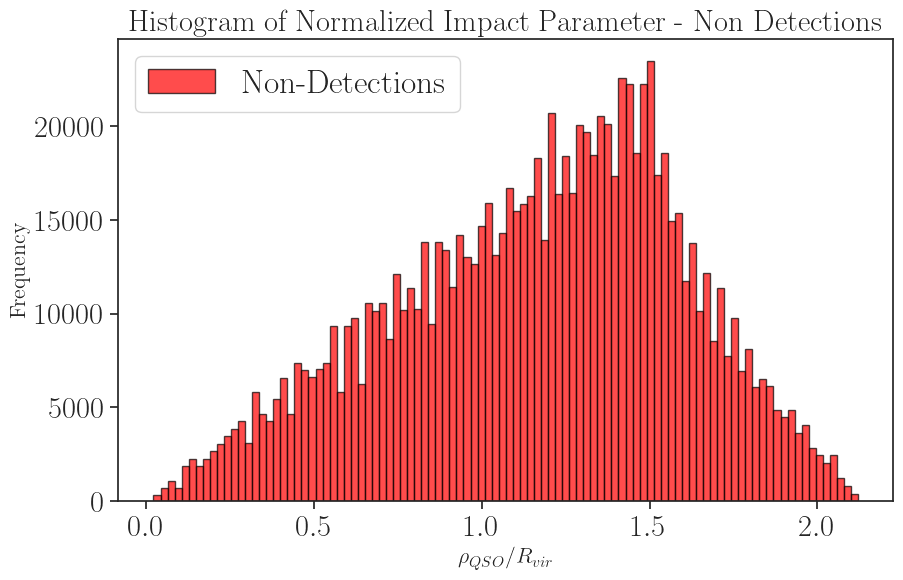

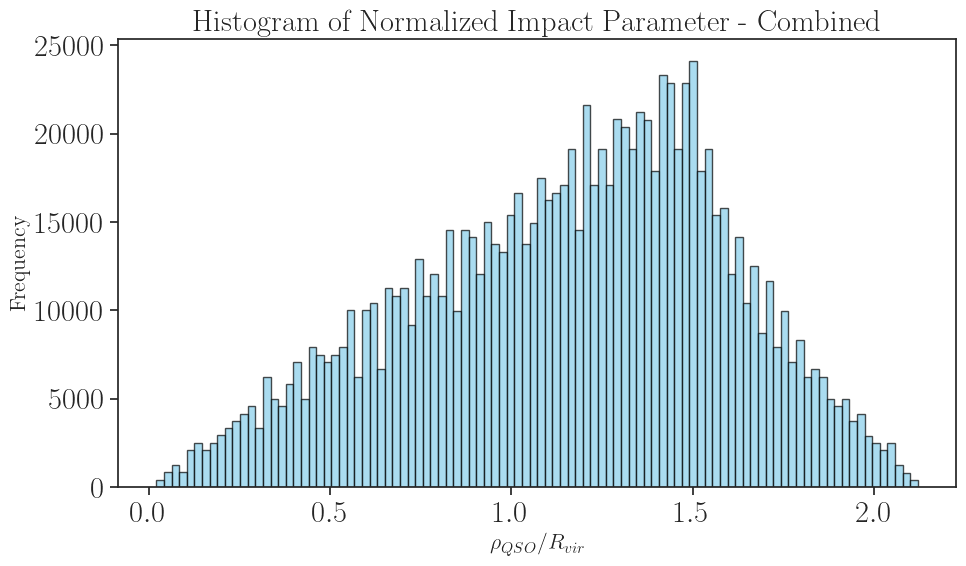

In [85]:
# Plot histograms
# Combined histogram for normalized impact parameters for detections and non-detections
plt.figure(figsize=(10, 6))
# plt.hist([impact_params_norm_detections, impact_params_norm_nondetections], bins=30, color=['blue', 'red'], alpha=0.7,
#          edgecolor='black', label=['Detections', 'Non-Detections'])
plt.hist(impact_params_norm_detections, bins=100, color='blue', alpha=0.7, edgecolor='black', label='Detections')
plt.xlabel(r'$\rho_{QSO} / R_{vir}$', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Normalized Impact Parameter - Detections')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
# plt.hist([impact_params_norm_detections, impact_params_norm_nondetections], bins=30, color=['blue', 'red'], alpha=0.7,
#          edgecolor='black', label=['Detections', 'Non-Detections'])
plt.hist(impact_params_norm_nondetections, bins=100, color='red', alpha=0.7, edgecolor='black', label='Non-Detections') 
plt.xlabel(r'$\rho_{QSO} / R_{vir}$', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Normalized Impact Parameter - Non Detections')
plt.legend()
plt.show()

# combine both 
combined_impact_params_norm = np.concatenate([impact_params_norm_detections, impact_params_norm_nondetections])

plt.figure(figsize=(10, 6))
plt.hist(combined_impact_params_norm, bins=100, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel(r'$\rho_{QSO} / R_{vir}$', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Normalized Impact Parameter - Combined')

plt.tight_layout()
plt.savefig('normalized_impact_parameter_combined_SIMBA.png', dpi=300)
plt.show()

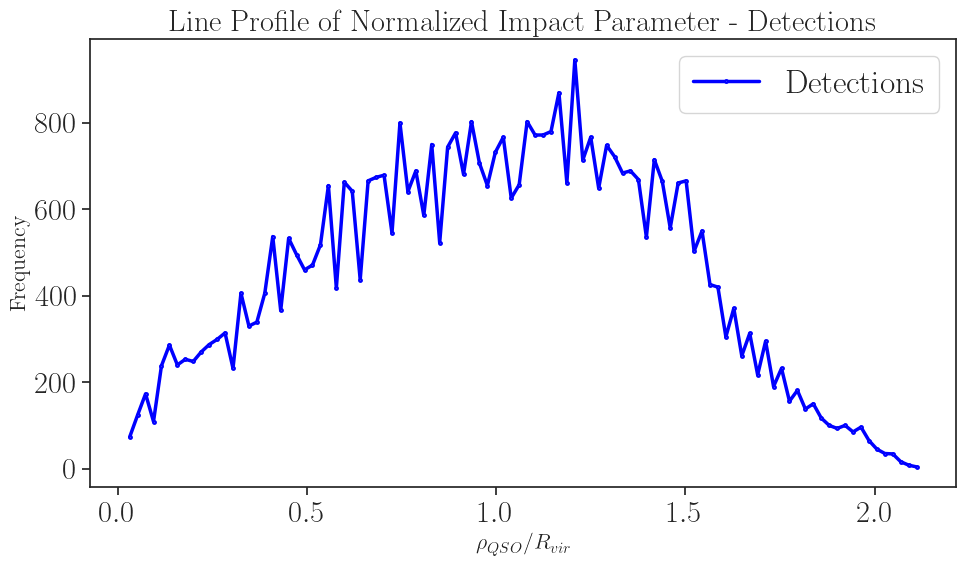

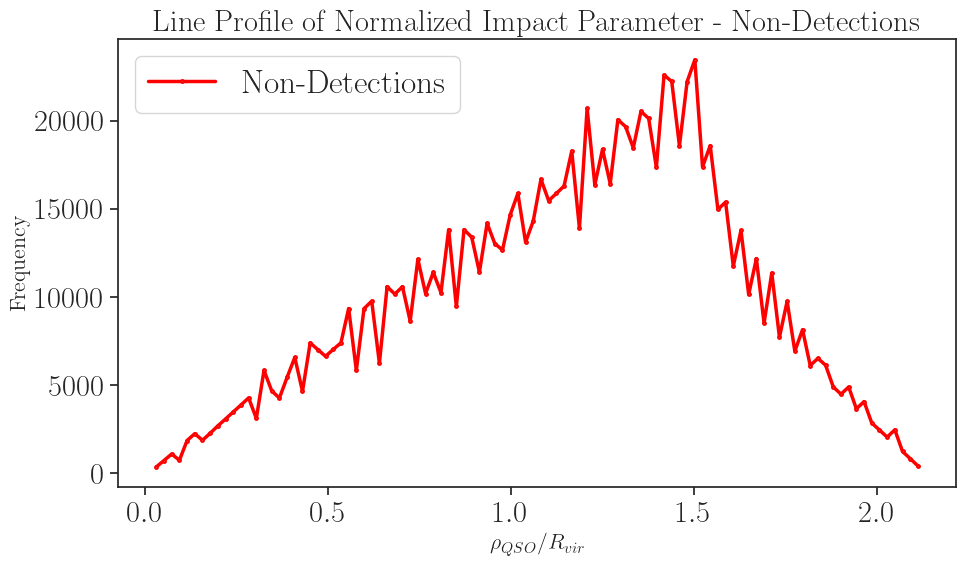

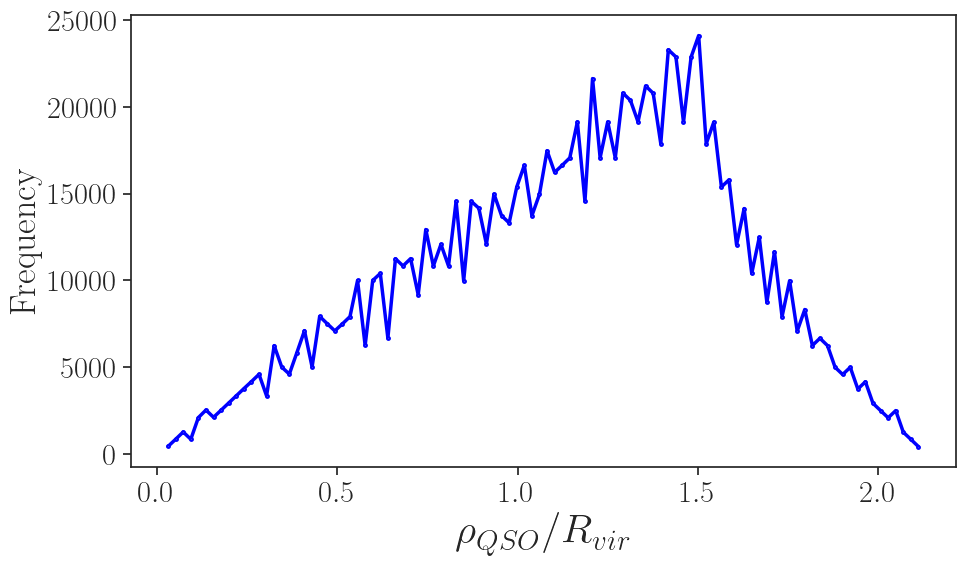

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `impact_params_norm_detections` and `impact_params_norm_nondetections` are defined

# Detections line profile
plt.figure(figsize=(10, 6))
counts, bin_edges = np.histogram(impact_params_norm_detections, bins=100)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])  # Calculate bin centers
plt.plot(bin_centers, counts, label='Detections', linewidth=2.5, color='blue',
            linestyle='-', marker='o', markersize=2, markerfacecolor='white', markeredgewidth=1.5)
plt.xlabel(r'$\rho_{QSO} / R_{vir}$', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Line Profile of Normalized Impact Parameter - Detections')
plt.legend()
plt.tight_layout()
plt.show()

# Non-Detections line profile
plt.figure(figsize=(10, 6))
counts, bin_edges = np.histogram(impact_params_norm_nondetections, bins=100)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.plot(bin_centers, counts, color='red', label='Non-Detections', linewidth=2.5, 
            linestyle='-', marker='o', markersize=2, markerfacecolor='white', markeredgewidth=1.5)
plt.xlabel(r'$\rho_{QSO} / R_{vir}$', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Line Profile of Normalized Impact Parameter - Non-Detections')
plt.legend()
plt.tight_layout()
plt.show()

# Combined line profile for both Detections and Non-Detections
combined_impact_params_norm = np.concatenate([impact_params_norm_detections, impact_params_norm_nondetections])

plt.figure(figsize=(10, 6))
counts, bin_edges = np.histogram(combined_impact_params_norm, bins=100)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.plot(bin_centers, counts, color='blue', label='Combined', linewidth=2.5, 
            linestyle='-', marker='o', markersize=2, markerfacecolor='white', markeredgewidth=1.5)
plt.xlabel(r'$\rho_{QSO} / R_{vir}$', fontsize=30)
plt.ylabel('Frequency', fontsize=26)
#plt.title('Line Profile of Normalized Impact Parameter - Combined')
plt.tight_layout()
plt.savefig('normalized_impact_parameter_combined_SIMBA.png', dpi=300)
plt.show()

In [30]:
import pandas as pd

# Define paths to observational data
full_sample_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Sample_full.txt'
plotting_data_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/Plotting_data_subset.txt'

# Load observational data
full_sample_df = pd.read_csv(full_sample_path, sep='\s+', comment='#', engine='python')
plotting_data_df = pd.read_csv(plotting_data_path, sep='\s+', comment='#', engine='python')

# Strip whitespace from column names
full_sample_df.columns = full_sample_df.columns.str.strip()
plotting_data_df.columns = plotting_data_df.columns.str.strip()

# Merge data on 'Group' for observational data processing
if 'Group' in full_sample_df.columns and 'Group' in plotting_data_df.columns:
    merged_df = pd.merge(full_sample_df, plotting_data_df, left_on='Group', right_on='Group')
    # Calculate normalized impact parameter (rho/R_vir)
    merged_df['Impact_Param_Norm'] = merged_df['QSO_Rho(kpc)'] / merged_df['R_Vir(kpc)']
    
    # Select and display relevant columns for analysis
    obs_data_summary = merged_df[['Group', 'QSO_Rho(kpc)', 'Rvir_s', 'Impact_Param_Norm']]
    obs_data_summary.columns = ['Group', 'Impact Parameter (kpc)', 'Virial Radius (kpc)', 'Normalized Impact Parameter']

obs_data_summary


Group  Impact Parameter (kpc)  Virial Radius (kpc)  \
0   J0841+1406                    95.0               566.63   
1   J1017+4702                   926.0               573.38   
2   J1020+1003                   632.0               515.67   
3   J1025+4808                   340.0               563.65   
4   J1102+0521                   536.0               531.58   
5   J1126+1204                   707.0               708.74   
6   J1127+2654                   267.0               605.54   
7   J1216+0712                   572.0               578.95   
8   J1301+2819                   836.0               573.76   
9   J1339+5355                   653.0               619.58   
10  J1343+2538                   346.0               395.57   
11  J1344+5546                   194.0               624.96   
12  J1348+4303                   580.0               705.06   
13  J1408+5657                   427.0               632.01   
14  J1424+4214                   189.0               505.90   
15  J1426+1955                   616.0               407.49   
16  J1428+3225                   433.0               566.71   
17  J1617+0854                   533.0               585.02   

    Normalized Impact Parameter  
0                      0.149043  
1                      1.305144  
2                      1.357388  
3                      1.080737  
4                      1.015344  
5                      1.031214  
6                      0.542352  
7                      1.415141  
8                      1.364675  
9                      1.248089  
10                     1.187779  
11                     0.340351  
12                     1.009925  
13                     1.058765  
14                     0.411496  
15                     1.036862  
16                     0.557559  
17                     1.358308

### N(OVI) vs sSFR

100%|██████████| 104/104 [00:33<00:00,  3.06it/s]
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'rasterized'
  cset = contour_func(


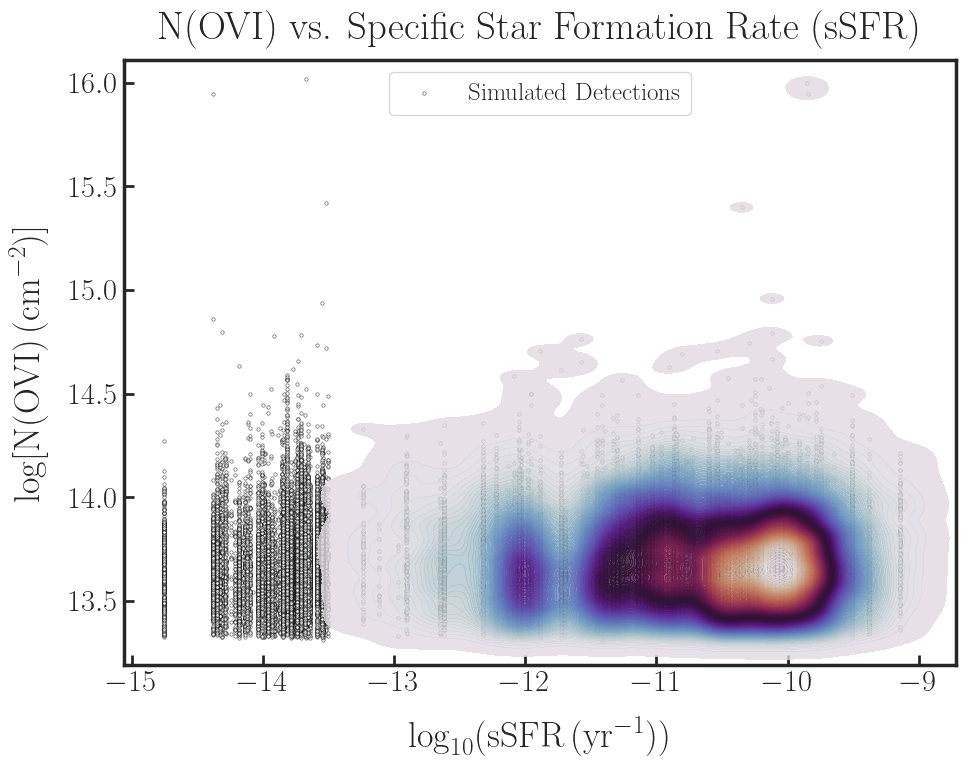

In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
from tqdm import tqdm

# Define base directories
base_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results_filtered'
ray_info_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Results'
grp_info_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Grp_info.txt'
galaxy_info_dir = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/Galaxy_cats'

# Load group information to get center coordinates
grp_info = Table.read(grp_info_path, format='ascii.fixed_width', delimiter='|')
grp_info_df = grp_info.to_pandas()
grp_info_df.columns = grp_info_df.columns.str.strip()

# Convert necessary columns to numeric
grp_info_df['Grp_ID'] = pd.to_numeric(grp_info_df['Grp_ID'], errors='coerce')
grp_info_df['Pos_x'] = pd.to_numeric(grp_info_df['Pos_x'], errors='coerce')
grp_info_df['Pos_y'] = pd.to_numeric(grp_info_df['Pos_y'], errors='coerce')
grp_info_df['Pos_z'] = pd.to_numeric(grp_info_df['Pos_z'], errors='coerce')

# Initialize lists to store specific SFR and column densities
log_ssfr_values = []
n_ovi_detections = []
log_ssfr_values_for_contour = []
n_ovi_for_contour = []

# Loop through each group
group_folders = [folder for folder in os.listdir(base_dir) if folder.startswith('Group_')]

for folder in tqdm(group_folders):
    group_id = int(folder.split('_')[-1])
    
    # Load the center coordinates for this group
    group_center = grp_info_df[grp_info_df['Grp_ID'] == group_id]
    if group_center.empty:
        continue  # Skip if group ID is not found in the center file
    
    center_x, center_y, center_z = group_center['Pos_x'].values[0], group_center['Pos_y'].values[0], group_center['Pos_z'].values[0]
    
    # Load the ray information to get sightline coordinates
    ray_info_path = os.path.join(ray_info_dir, f'Group_{group_id}', f'Grp_{group_id}_Ray_info.txt')
    ray_info = Table.read(ray_info_path, format='ascii.fixed_width', delimiter='|')
    ray_info_df = ray_info.to_pandas()
    ray_info_df.columns = ray_info_df.columns.str.strip()

    # Load the fitting results to get N(OVI) and dN values
    fitting_results_path = os.path.join(base_dir, folder, f'Grp_{group_id}_fitting_results.txt')
    fitting_results = Table.read(fitting_results_path, format='ascii.fixed_width', delimiter='|')
    fitting_results_df = fitting_results.to_pandas()
    fitting_results_df.columns = fitting_results_df.columns.str.strip()

    # Convert relevant columns to numeric, coercing errors to NaN
    numeric_columns = ['Sightline', 'N', 'dN']
    for col in numeric_columns:
        if col in fitting_results_df.columns:
            fitting_results_df[col] = pd.to_numeric(fitting_results_df[col], errors='coerce')

    # Filter for detections only (where dN is not NaN)
    detected_data = fitting_results_df[~fitting_results_df['dN'].isna()]

    # Load galaxy information to get SFR and stellar mass
    galaxy_info_path = os.path.join(galaxy_info_dir, f'Group_{group_id}', 'galaxy_info.txt')
    galaxy_info = Table.read(galaxy_info_path, format='ascii.fixed_width', delimiter='|')
    galaxy_info_df = galaxy_info.to_pandas()
    galaxy_info_df.columns = galaxy_info_df.columns.str.strip()

    # Convert necessary columns to numeric
    galaxy_info_df['Galaxy_Center_X'] = pd.to_numeric(galaxy_info_df['Galaxy_Center_X'], errors='coerce')
    galaxy_info_df['Galaxy_Center_Y'] = pd.to_numeric(galaxy_info_df['Galaxy_Center_Y'], errors='coerce')
    galaxy_info_df['Galaxy_Center_Z'] = pd.to_numeric(galaxy_info_df['Galaxy_Center_Z'], errors='coerce')
    galaxy_info_df['Galaxy_Mass_Stellar'] = pd.to_numeric(galaxy_info_df['Galaxy_Mass_Stellar'], errors='coerce')
    galaxy_info_df['Galaxy_SFR'] = pd.to_numeric(galaxy_info_df['Galaxy_SFR'], errors='coerce')

    # For each detected sightline, find the nearest galaxy and calculate sSFR
    for index, row in detected_data.iterrows():
        sightline_id = int(row['Sightline'])
        n_ovi = row['N']
        
        # Find the corresponding sightline in ray_info to get x, y, z coordinates
        sightline = ray_info_df[ray_info_df['Sightline'] == sightline_id]
        if sightline.empty:
            continue

        start_x, start_y, start_z = sightline['Start_x'].values[0], sightline['Start_y'].values[0], sightline['Start_z'].values[0]

        # Calculate the distance to each galaxy
        galaxy_info_df['Distance'] = np.sqrt((galaxy_info_df['Galaxy_Center_X'] - start_x)**2 + 
                                             (galaxy_info_df['Galaxy_Center_Y'] - start_y)**2 + 
                                             (galaxy_info_df['Galaxy_Center_Z'] - start_z)**2)
        
        # Find the nearest galaxy
        nearest_galaxy = galaxy_info_df.loc[galaxy_info_df['Distance'].idxmin()]
        
        # Calculate sSFR, setting SFR=10^-5 if zero
        sfr = nearest_galaxy['Galaxy_SFR'] if nearest_galaxy['Galaxy_SFR'] > 0 else 1e-3
        stellar_mass = 10 ** nearest_galaxy['Galaxy_Mass_Stellar']  # Convert stellar mass
        ssfr = sfr / stellar_mass
        log_ssfr = np.log10(ssfr)

        # Store results
        log_ssfr_values.append(log_ssfr)
        n_ovi_detections.append(n_ovi)

        # Exclude sightlines with SFR = 10^-5 from contour data
        if nearest_galaxy['Galaxy_SFR'] > 0:
            log_ssfr_values_for_contour.append(log_ssfr)
            n_ovi_for_contour.append(n_ovi)

# Convert lists to numpy arrays for plotting
log_ssfr_values = np.array(log_ssfr_values)
n_ovi_detections = np.array(n_ovi_detections)
log_ssfr_values_for_contour = np.array(log_ssfr_values_for_contour)
n_ovi_for_contour = np.array(n_ovi_for_contour)

# Plot N(OVI) vs specific Star Formation Rate (sSFR) for detections with contours
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for simulation data
ax.scatter(log_ssfr_values, n_ovi_detections, color='white', s=6, alpha=0.6, edgecolor='black', 
           linewidth=0.5, marker='o', zorder=0, label='Simulated Detections')

# Overlay density contours using seaborn's kdeplot, excluding 10^-5 sSFR points
sns.kdeplot(
    x=log_ssfr_values_for_contour, y=n_ovi_for_contour, fill=True,
    cmap="twilight", levels=170, thresh=0.0005, alpha=0.8, ax=ax, rasterized=True
)

# Axis labels and title
ax.set_xlabel(r'$\log_{10}(\mathrm{sSFR \, (yr^{-1})})$', fontsize=26, labelpad=15)
ax.set_ylabel(r'$\log[\mathrm{N(OVI)} \, (\mathrm{cm^{-2}})]$', fontsize=26, labelpad=15)
ax.set_title(r'N(OVI) vs. Specific Star Formation Rate (sSFR)', fontsize=28, pad=15)
ax.legend(loc='best', fontsize=18, frameon=True)

# Customize ticks and spines
ax.tick_params(axis='both', which='major', direction='in', width=2, length=7)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

plt.tight_layout()
plt.show()

/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/igrm/lib/python3.11/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'rasterized'
  cset = contour_func(
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_29050/3015413325.py:18: FutureWarning: The 'delim_whi

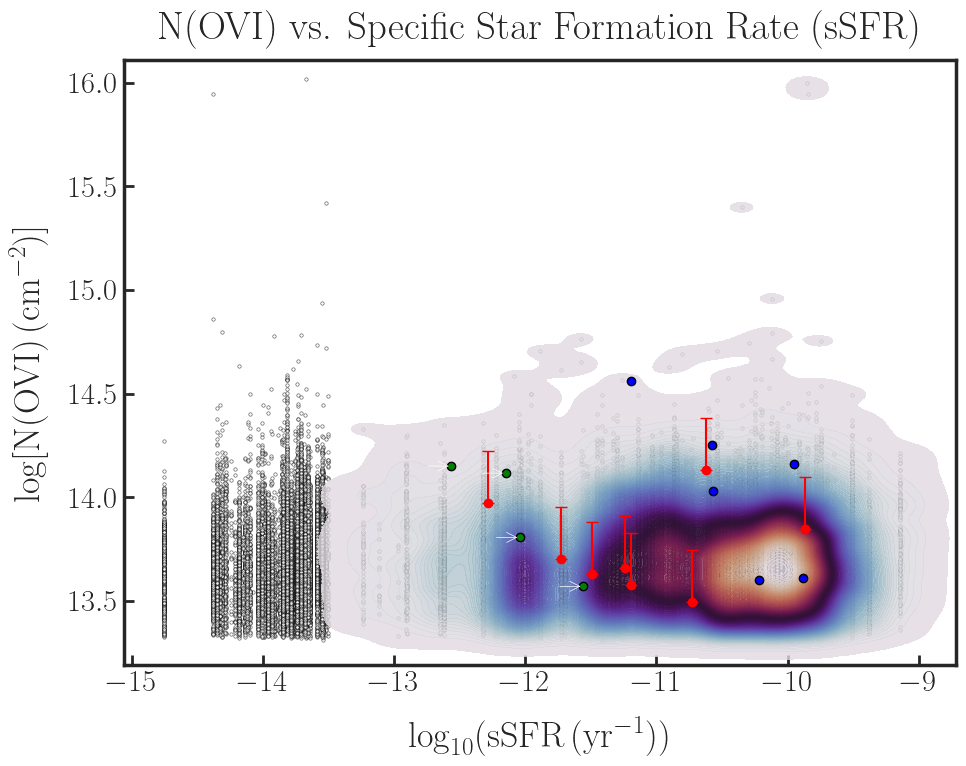

In [82]:
observed_ssfr_data_path = '/Users/wavefunction/ASU Dropbox/Tanmay Singh/Synthetic_IGrM_Sightlines/COS_IGrM_Data/COS_Igrm_sfr_data.txt'


# Plot N(OVI) vs specific Star Formation Rate (sSFR) for detections with contours
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for simulation data
ax.scatter(log_ssfr_values, n_ovi_detections, color='white', s=6, alpha=0.6, edgecolor='black', 
           linewidth=0.5, marker='o', zorder=0, label='Simulated Detections')

# Overlay density contours using seaborn's kdeplot, excluding 10^-5 sSFR points
sns.kdeplot(
    x=log_ssfr_values_for_contour, y=n_ovi_for_contour, fill=True,
    cmap="twilight", levels=170, thresh=0.0005, alpha=0.8, ax=ax, rasterized=True
)

# Load and overlay observational data
observed_ssfr_data = pd.read_csv(observed_ssfr_data_path, delim_whitespace=True, comment='#')
for _, row in observed_ssfr_data.iterrows():
    log_ssfr_obs = row['sSFR']
    n_ovi_obs = row['N_ovi']
    sSFR_limit = row['sSFR_lim']
    N_limit = row['N_lim']
    
    if sSFR_limit:  # Lower limit for sSFR
        ax.scatter(log_ssfr_obs, n_ovi_obs, marker='o', color='green', edgecolor='black', label='Observational sSFR limit')
        ax.annotate('', xy=(log_ssfr_obs, n_ovi_obs), xytext=(log_ssfr_obs - 0.2, n_ovi_obs),
                    arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.5))
    elif N_limit:  # Upper limit for N(OVI)
        ax.errorbar(log_ssfr_obs, n_ovi_obs, yerr=[[0], [0.25]], fmt='o', color='red', capsize=4, label='Observational N limit')
    else:
        ax.scatter(log_ssfr_obs, n_ovi_obs, marker='o', color='blue', edgecolor='black', label='Observed')

# Axis labels and title
ax.set_xlabel(r'$\log_{10}(\mathrm{sSFR \, (yr^{-1})})$', fontsize=26, labelpad=15)
ax.set_ylabel(r'$\log[\mathrm{N(OVI)} \, (\mathrm{cm^{-2}})]$', fontsize=26, labelpad=15)
ax.set_title(r'N(OVI) vs. Specific Star Formation Rate (sSFR)', fontsize=28, pad=15)
# ax.legend(loc='best', fontsize=18, frameon=True)

# Customize ticks and spines
ax.tick_params(axis='both', which='major', direction='in', width=2, length=7)
ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

plt.tight_layout()
plt.show()